# Idea

Basically, I'd like to do some simple tests on "how can we establish the efficacy of our period-finding method?". I think it would be effective to do two simple things for now:

1. Try lots of different amplitudes (at a given frequency) and see how low we have to go before the period isn't readily identifiable
2. Try lots of different periods (at a given amplitude) and see what frequencies are recoverable and what aren't.

Then, eventually, we'll want to do a grid to see if these two things depend on each other. We'll also want to investigate the effects of "survey" (WSERV5 vs 7 vs 8), spatial location (esp. which footprint), and source brightness / photometric noise.

In [1]:
# for a simple object, let's load its data, inject signals, and see what happens.

In [2]:
# imports

from datetime import datetime, timedelta

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from astropy.timeseries import LombScargle

plt.style.use('seaborn-whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [3]:
%run ../period_recovery.py

In [4]:
# WSERV7 is NGC 1333
wserv = 7

from wuvars.data import spreadsheet, photometry
from wuvars.analysis.variability_selection import sq0, sq1, sq2

dat = photometry.group_wserv_v2(photometry.load_wserv_v2(wserv))
spread = spreadsheet.load_wserv_v2(wserv)

# wserv_ids = [5, 7, 8, 11]
# n_min_list = [35, 80, 55, 65]
# n_max_list = [90, 160, 80, 100]

n_min = 80
n_max = 160

# min_Stetson_list = [3, 1.6, 1.6, 4]

# SFR_names = ["Orion Nebula Cluster", "NGC 1333", "IC 348", "Mon R2"]
# SFR_dict = {x: y for x, y in zip(wserv_ids, SFR_names)}

q0 = sq0(spread, n_min, n_max)
q1 = sq1(spread, n_min, n_max)
q2 = sq2(spread, n_min, n_max)

Loading WSERV7 photometry data... DONE (elapsed time: 0.25s)


In [5]:
q2_bright = (spread[q2]['mean']['KAPERMAG3'] < 15)
q2_bright_spread = spread[q2][q2_bright]

q2_bright_nonvariable  = (spread[q2]['mean']['KAPERMAG3'] < 15) & (spread[q2]['variability']['Stetson_JHK'] < 0.8) & (spread[q2]['variability']['Stetson_JHK'] > 0.0)
q2_bright_nonvariable_spread = spread[q2][q2_bright_nonvariable]


In [6]:
all_sids = np.unique(q2_bright_spread.index)

all_nonvariable_sids = np.unique(q2_bright_nonvariable_spread.index)

sids = np.random.choice(all_nonvariable_sids, 40)
print(sids)

[44508746127208 44508746105865 44508746091895 44508746111464
 44508746088982 44508746117494 44508746127830 44508746108218
 44508746093695 44508746110277 44508746105439 44508746092837
 44508746093117 44508746089934 44508746107272 44508746113635
 44508746092599 44508746121934 44508746131870 44508746121028
 44508746088539 44508746107951 44508746131545 44508746099581
 44508746096422 44508746124052 44508746133798 44508746105865
 44508746133698 44508746124186 44508746126977 44508746111664
 44508746111702 44508746114275 44508746099028 44508746117911
 44508746104870 44508746136624 44508746113229 44508746114215]


In [7]:
from datetime import datetime

periods6 = [1/23, 1/17, 1/11, 0.1, 1/7, 0.25, 0.307, 0.35, 0.407, 0.45, 0.507, 0.607, 0.707, 0.807, 0.907, 1.0, 1.107, 1.207, 1.3507, 1.5, 1.707, 2, 2.1, 2.207, 2.5, 3.07, 5.07]
amplitudes6 = [0.001, 0.003, 0.005, 0.0075, 0.01, 0.015, 0.02, 0.025, 0.03]

In [8]:
X, Y = np.meshgrid(periods6, amplitudes6)

[]

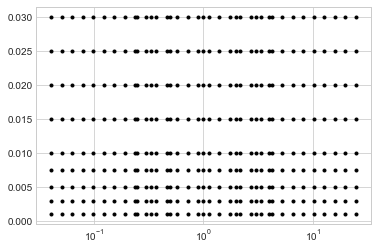

In [9]:
periods7 = np.logspace(np.log10(1/24.5), np.log10(24.5), 30)

extra_periods = (1/4, 1/3, 1/2, 1, 2, 3, 4)

periods7_append_sorted = np.sort(np.append(periods7, np.array(extra_periods)))

X7, Y7 = np.meshgrid(periods7_append_sorted, amplitudes6)

plt.plot(X7, Y7, 'k.')
plt.semilogx()

In [11]:
periods_denser_raw = np.logspace(np.log10(1/24.5), np.log10(24.5), 60)
extra_periods = (1/4, 1/3, 1/2, 1, 2, 3, 4)
periods_denser = np.sort(np.append(periods_denser_raw, np.array(extra_periods)))

amplitudes_denser = [0.001, 0.003, 0.005, 0.0075, 0.0085, 0.01, 0.0125, 0.015, 0.0175, 0.02, 0.025, 0.03]

In [12]:
print(periods_denser)

[ 0.04081633  0.04549088  0.05070078  0.05650736  0.06297895  0.07019171
  0.07823051  0.08718997  0.09717553  0.1083047   0.12070845  0.13453276
  0.14994032  0.16711245  0.18625124  0.20758193  0.23135555  0.25
  0.25785188  0.28738274  0.32029566  0.33333333  0.35697798  0.3978614
  0.44342705  0.49421117  0.5         0.55081142  0.61389389  0.68420097
  0.76256007  0.84989336  0.94722862  1.          1.05571134  1.1766182
  1.3113721   1.46155888  1.62894601  1.8155034   2.          2.02342654
  2.25516238  2.5134381   2.80129322  3.          3.12211536  3.47968011
  3.87819549  4.          4.32235141  4.81737493  5.36909173  5.98399469
  6.6693203   7.43313381  8.28442417  9.23320978 10.29065642 11.46920867
 12.7827363  14.24669759 15.87832114 17.69680874 19.72356124 21.98243049
 24.5       ]


In [16]:
startTime = datetime.now()
print(f"Starting at: {startTime}")
evals_per_sec = 02.14/4
expected_evals = len(sids) * len(periods_denser) * len(amplitudes_denser)
expected_runtime_secs = expected_evals*evals_per_sec
expected_runtime = timedelta(seconds=expected_runtime_secs)
expected_complete_time = startTime + expected_runtime

print(f"About to run {expected_evals} evals")
print(f"Estimated time: {expected_runtime}")
print(f"Estimated completion at: {expected_complete_time.strftime(format='%d/%m/%Y %H:%M:%S')}")

output_denser = recovery_score(dat, sids, periods_denser, amplitudes_denser)

print(f"elapsed time: ", datetime.now() - startTime)


Starting at: 2021-10-09 21:17:32.120244
About to run 32160 evals
Estimated time: 4:46:45.600000
Estimated completion at: 10/10/2021 02:04:17
A=0.00 mag. Incorrect period: 0.15 v. 0.04
A=0.00 mag. Incorrect period: 1.07 v. 0.04
A=0.00 mag. Incorrect period: 78.12 v. 0.04
A=0.00 mag. Incorrect period: 10.35 v. 0.04
A=0.00 mag. Incorrect period: 1.06 v. 0.04
A=0.00 mag. Incorrect period: 0.10 v. 0.04
A=0.00 mag. Incorrect period: 0.50 v. 0.04
A=0.00 mag. Incorrect period: 0.06 v. 0.04
A=0.00 mag. Incorrect period: 0.07 v. 0.04
A=0.00 mag. Incorrect period: 0.09 v. 0.04
A=0.00 mag. Incorrect period: 0.06 v. 0.04
A=0.00 mag. Incorrect period: 0.20 v. 0.04
A=0.00 mag. Incorrect period: 0.07 v. 0.04
A=0.00 mag. Incorrect period: 1.00 v. 0.04
A=0.00 mag. Incorrect period: 1.00 v. 0.04
A=0.00 mag. Incorrect period: 0.15 v. 0.04
A=0.00 mag. Incorrect period: 0.99 v. 0.04
A=0.00 mag. Incorrect period: 0.11 v. 0.04
A=0.00 mag. Incorrect period: 0.33 v. 0.04
A=0.00 mag. Incorrect period: 0.17 v. 0.

A=0.01 mag. Aliased period: 0.0426 v. 0.0408
A=0.01 mag. Aliased period: 0.0426 v. 0.0408
A=0.01 mag. Aliased period: 0.0426 v. 0.0408
A=0.01 mag. Incorrect period: 1.00 v. 0.04
A=0.01 mag. Aliased period: 0.0426 v. 0.0408
A=0.01 mag. Aliased period: 0.0426 v. 0.0408
A=0.01 mag. Incorrect period: 0.09 v. 0.04
A=0.01 mag. Incorrect period: 0.25 v. 0.04
A=0.01 mag. Aliased period: 0.0426 v. 0.0408
A=0.01 mag. Incorrect period: 0.05 v. 0.04
A=0.01 mag. Incorrect period: 1.00 v. 0.04
A=0.01 mag. Aliased period: 0.0426 v. 0.0408
A=0.01 mag. Incorrect period: 0.08 v. 0.04
A=0.01 mag. Incorrect period: 0.06 v. 0.04
A=0.01 mag. Aliased period: 0.0426 v. 0.0408
A=0.01 mag. Aliased period: 0.0426 v. 0.0408
A=0.01 mag. Aliased period: 0.0426 v. 0.0408
A=0.01 mag. Aliased period: 0.0426 v. 0.0408
A=0.01 mag. Aliased period: 0.0444 v. 0.0408
A=0.01 mag. Aliased period: 0.0426 v. 0.0408
A=0.01 mag. Aliased period: 0.0426 v. 0.0408
A=0.01 mag. Aliased period: 0.0426 v. 0.0408
A=0.01 mag. Aliased peri

A=0.02 mag. Aliased period: 0.0426 v. 0.0408
A=0.02 mag. Aliased period: 0.0426 v. 0.0408
A=0.02 mag. Aliased period: 0.0426 v. 0.0408
A=0.02 mag. Aliased period: 0.0426 v. 0.0408
A=0.02 mag. Aliased period: 0.0426 v. 0.0408
A=0.02 mag. Aliased period: 0.0426 v. 0.0408
A=0.02 mag. Aliased period: 0.0426 v. 0.0408
A=0.02 mag. Aliased period: 0.0426 v. 0.0408
A=0.02 mag. Aliased period: 0.0426 v. 0.0408
A=0.02 mag. Aliased period: 0.0426 v. 0.0408
A=0.02 mag. Aliased period: 0.0426 v. 0.0408
A=0.02 mag. Aliased period: 0.0426 v. 0.0408
A=0.02 mag. Aliased period: 0.0426 v. 0.0408
A=0.02 mag. Aliased period: 0.0426 v. 0.0408
A=0.02 mag. Aliased period: 0.0426 v. 0.0408
A=0.02 mag. Aliased period: 0.0426 v. 0.0408
A=0.02 mag. Aliased period: 0.0426 v. 0.0408
A=0.02 mag. Aliased period: 0.0426 v. 0.0408
A=0.02 mag. Aliased period: 0.0426 v. 0.0408
A=0.02 mag. Aliased period: 0.0426 v. 0.0408
A=0.02 mag. Aliased period: 0.0426 v. 0.0408
A=0.02 mag. Aliased period: 0.0426 v. 0.0408
A=0.02 mag

A=0.00 mag. Incorrect period: 1.00 v. 0.05
A=0.00 mag. Incorrect period: 0.06 v. 0.05
A=0.00 mag. Incorrect period: 1.00 v. 0.05
A=0.00 mag. Incorrect period: 0.06 v. 0.05
A=0.00 mag. Incorrect period: 0.05 v. 0.05
A=0.00 mag. Incorrect period: 1.00 v. 0.05
A=0.00 mag. Aliased period: 0.0435 v. 0.0455
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Aliased period: 0.0432 v. 0.0455
A=0.01 mag. Incorrect period: 79.36 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Incorrect period: 1.06 v. 0.05
A=0.01 mag. Incorrect period: 0.10 v. 0.05
A=0.01 mag. Aliased period: 0.0477 v. 0.0455
A=0.01 mag. Incorrect period: 0.06 v. 0.05
A=0.01 mag. Aliased period: 0.0435 v. 0.0455
A=0.01 mag. Incorrect period: 0.06 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Aliased period: 0.0477 v. 0.0455
A=0.01 mag. Aliased period: 0.0477 v. 0.0455
A=0.01 mag. Incorrect period: 0.05 v. 0.05
A=0.01 mag. Aliased period: 0.0477 v. 0.0455
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.

A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Aliased period: 0.0435 v. 0.0455
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Aliased period: 0.0477 v. 0.0455
A=0.01 mag. Aliased period: 0.0435 v. 0.0455
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.

A=0.03 mag. Correct period: 0.05 v. 0.05
A=0.03 mag. Correct period: 0.05 v. 0.05
A=0.03 mag. Correct period: 0.05 v. 0.05
A=0.03 mag. Correct period: 0.05 v. 0.05
A=0.03 mag. Correct period: 0.05 v. 0.05
A=0.03 mag. Correct period: 0.05 v. 0.05
A=0.03 mag. Correct period: 0.05 v. 0.05
A=0.03 mag. Correct period: 0.05 v. 0.05
A=0.03 mag. Correct period: 0.05 v. 0.05
A=0.03 mag. Correct period: 0.05 v. 0.05
A=0.03 mag. Correct period: 0.05 v. 0.05
A=0.03 mag. Correct period: 0.05 v. 0.05
A=0.03 mag. Correct period: 0.05 v. 0.05
A=0.00 mag. Incorrect period: 0.15 v. 0.05
A=0.00 mag. Incorrect period: 1.07 v. 0.05
A=0.00 mag. Incorrect period: 78.12 v. 0.05
A=0.00 mag. Incorrect period: 10.35 v. 0.05
A=0.00 mag. Incorrect period: 1.06 v. 0.05
A=0.00 mag. Incorrect period: 0.10 v. 0.05
A=0.00 mag. Incorrect period: 0.50 v. 0.05
A=0.00 mag. Incorrect period: 0.06 v. 0.05
A=0.00 mag. Incorrect period: 0.07 v. 0.05
A=0.00 mag. Incorrect period: 0.10 v. 0.05
A=0.00 mag. Aliased period: 0.0556 

A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Aliased period: 0.0534 v. 0.0507
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. 

A=0.02 mag. Correct period: 0.05 v. 0.05
A=0.02 mag. Correct period: 0.05 v. 0.05
A=0.02 mag. Correct period: 0.05 v. 0.05
A=0.02 mag. Correct period: 0.05 v. 0.05
A=0.02 mag. Correct period: 0.05 v. 0.05
A=0.02 mag. Correct period: 0.05 v. 0.05
A=0.02 mag. Correct period: 0.05 v. 0.05
A=0.02 mag. Correct period: 0.05 v. 0.05
A=0.02 mag. Correct period: 0.05 v. 0.05
A=0.02 mag. Correct period: 0.05 v. 0.05
A=0.02 mag. Correct period: 0.05 v. 0.05
A=0.02 mag. Correct period: 0.05 v. 0.05
A=0.02 mag. Correct period: 0.05 v. 0.05
A=0.02 mag. Correct period: 0.05 v. 0.05
A=0.02 mag. Correct period: 0.05 v. 0.05
A=0.02 mag. Correct period: 0.05 v. 0.05
A=0.02 mag. Correct period: 0.05 v. 0.05
A=0.02 mag. Correct period: 0.05 v. 0.05
A=0.02 mag. Correct period: 0.05 v. 0.05
A=0.03 mag. Correct period: 0.05 v. 0.05
A=0.03 mag. Correct period: 0.05 v. 0.05
A=0.03 mag. Correct period: 0.05 v. 0.05
A=0.03 mag. Correct period: 0.05 v. 0.05
A=0.03 mag. Correct period: 0.05 v. 0.05
A=0.03 mag. Corr

A=0.01 mag. Incorrect period: 1.01 v. 0.06
A=0.01 mag. Incorrect period: 0.10 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Incorrect period: 0.98 v. 0.06
A=0.01 mag. Aliased period: 0.0535 v. 0.0565
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Incorrect period: 0.99 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Incorrect period: 0.05 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Incorrect period: 1.00 v. 0.06
A=0.01 mag. Incorrect period: 0.50 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Aliased period: 0.0599 v. 0.0565
A=0.01 mag. Incorrect period: 1.00 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Aliased period: 0.0589 v. 0.0565
A=0.01 mag. Incorrect period: 0.50 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Incorrect period: 0.05 v. 0.06
A=0.01 mag. Incorrect period: 1.00 v. 0.06
A=0.01 mag. Correct per

A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Corr

A=0.00 mag. Incorrect period: 1.00 v. 0.06
A=0.00 mag. Incorrect period: 0.04 v. 0.06
A=0.00 mag. Incorrect period: 1.01 v. 0.06
A=0.00 mag. Incorrect period: 0.11 v. 0.06
A=0.00 mag. Incorrect period: 0.33 v. 0.06
A=0.00 mag. Incorrect period: 0.34 v. 0.06
A=0.00 mag. Incorrect period: 0.05 v. 0.06
A=0.00 mag. Incorrect period: 0.05 v. 0.06
A=0.00 mag. Incorrect period: 0.17 v. 0.06
A=0.00 mag. Incorrect period: 1.00 v. 0.06
A=0.00 mag. Incorrect period: 0.05 v. 0.06
A=0.00 mag. Incorrect period: 0.09 v. 0.06
A=0.00 mag. Aliased period: 0.0556 v. 0.0630
A=0.00 mag. Incorrect period: 0.17 v. 0.06
A=0.00 mag. Incorrect period: 1.00 v. 0.06
A=0.00 mag. Incorrect period: 0.05 v. 0.06
A=0.00 mag. Incorrect period: 0.99 v. 0.06
A=0.00 mag. Incorrect period: 82.64 v. 0.06
A=0.00 mag. Incorrect period: 0.25 v. 0.06
A=0.00 mag. Incorrect period: 1.00 v. 0.06
A=0.00 mag. Aliased period: 0.0589 v. 0.0630
A=0.00 mag. Incorrect period: 0.50 v. 0.06
A=0.00 mag. Incorrect period: 0.05 v. 0.06
A=0.00

A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Incorrect period: 0.11 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Co

A=0.03 mag. Correct period: 0.06 v. 0.06
A=0.03 mag. Correct period: 0.06 v. 0.06
A=0.03 mag. Correct period: 0.06 v. 0.06
A=0.03 mag. Correct period: 0.06 v. 0.06
A=0.03 mag. Correct period: 0.06 v. 0.06
A=0.03 mag. Correct period: 0.06 v. 0.06
A=0.03 mag. Correct period: 0.06 v. 0.06
A=0.03 mag. Correct period: 0.06 v. 0.06
A=0.03 mag. Correct period: 0.06 v. 0.06
A=0.03 mag. Correct period: 0.06 v. 0.06
A=0.03 mag. Correct period: 0.06 v. 0.06
A=0.03 mag. Correct period: 0.06 v. 0.06
A=0.03 mag. Correct period: 0.06 v. 0.06
A=0.03 mag. Correct period: 0.06 v. 0.06
A=0.03 mag. Correct period: 0.06 v. 0.06
A=0.03 mag. Correct period: 0.06 v. 0.06
A=0.03 mag. Correct period: 0.06 v. 0.06
A=0.03 mag. Correct period: 0.06 v. 0.06
A=0.03 mag. Correct period: 0.06 v. 0.06
A=0.03 mag. Correct period: 0.06 v. 0.06
A=0.03 mag. Correct period: 0.06 v. 0.06
A=0.03 mag. Correct period: 0.06 v. 0.06
A=0.03 mag. Correct period: 0.06 v. 0.06
A=0.03 mag. Correct period: 0.06 v. 0.06
A=0.03 mag. Corr

A=0.01 mag. Correct period: 0.07 v. 0.07
A=0.01 mag. Correct period: 0.07 v. 0.07
A=0.01 mag. Aliased period: 0.0755 v. 0.0702
A=0.01 mag. Aliased period: 0.0656 v. 0.0702
A=0.01 mag. Correct period: 0.07 v. 0.07
A=0.01 mag. Correct period: 0.07 v. 0.07
A=0.01 mag. Correct period: 0.07 v. 0.07
A=0.01 mag. Correct period: 0.07 v. 0.07
A=0.01 mag. Correct period: 0.07 v. 0.07
A=0.01 mag. Incorrect period: 0.20 v. 0.07
A=0.01 mag. Correct period: 0.07 v. 0.07
A=0.01 mag. Correct period: 0.07 v. 0.07
A=0.01 mag. Aliased period: 0.0755 v. 0.0702
A=0.01 mag. Correct period: 0.07 v. 0.07
A=0.01 mag. Correct period: 0.07 v. 0.07
A=0.01 mag. Correct period: 0.07 v. 0.07
A=0.01 mag. Correct period: 0.07 v. 0.07
A=0.01 mag. Correct period: 0.07 v. 0.07
A=0.01 mag. Correct period: 0.07 v. 0.07
A=0.01 mag. Aliased period: 0.0755 v. 0.0702
A=0.01 mag. Correct period: 0.07 v. 0.07
A=0.01 mag. Correct period: 0.07 v. 0.07
A=0.01 mag. Correct period: 0.07 v. 0.07
A=0.01 mag. Aliased period: 0.0755 v. 0

A=0.02 mag. Correct period: 0.07 v. 0.07
A=0.02 mag. Correct period: 0.07 v. 0.07
A=0.02 mag. Correct period: 0.07 v. 0.07
A=0.02 mag. Correct period: 0.07 v. 0.07
A=0.02 mag. Correct period: 0.07 v. 0.07
A=0.02 mag. Correct period: 0.07 v. 0.07
A=0.02 mag. Correct period: 0.07 v. 0.07
A=0.02 mag. Correct period: 0.07 v. 0.07
A=0.02 mag. Correct period: 0.07 v. 0.07
A=0.02 mag. Correct period: 0.07 v. 0.07
A=0.02 mag. Correct period: 0.07 v. 0.07
A=0.02 mag. Correct period: 0.07 v. 0.07
A=0.02 mag. Correct period: 0.07 v. 0.07
A=0.02 mag. Correct period: 0.07 v. 0.07
A=0.02 mag. Correct period: 0.07 v. 0.07
A=0.02 mag. Correct period: 0.07 v. 0.07
A=0.02 mag. Correct period: 0.07 v. 0.07
A=0.02 mag. Correct period: 0.07 v. 0.07
A=0.02 mag. Correct period: 0.07 v. 0.07
A=0.02 mag. Correct period: 0.07 v. 0.07
A=0.02 mag. Correct period: 0.07 v. 0.07
A=0.02 mag. Correct period: 0.07 v. 0.07
A=0.02 mag. Correct period: 0.07 v. 0.07
A=0.02 mag. Correct period: 0.07 v. 0.07
A=0.02 mag. Corr

A=0.00 mag. Incorrect period: 0.09 v. 0.08
A=0.00 mag. Incorrect period: 0.15 v. 0.08
A=0.00 mag. Incorrect period: 1.07 v. 0.08
A=0.00 mag. Incorrect period: 77.52 v. 0.08
A=0.00 mag. Incorrect period: 10.35 v. 0.08
A=0.00 mag. Incorrect period: 0.51 v. 0.08
A=0.00 mag. Incorrect period: 0.10 v. 0.08
A=0.00 mag. Aliased period: 0.0849 v. 0.0782
A=0.00 mag. Incorrect period: 0.09 v. 0.08
A=0.00 mag. Incorrect period: 0.39 v. 0.08
A=0.00 mag. Incorrect period: 0.09 v. 0.08
A=0.00 mag. Incorrect period: 0.06 v. 0.08
A=0.00 mag. Incorrect period: 0.20 v. 0.08
A=0.00 mag. Incorrect period: 0.57 v. 0.08
A=0.00 mag. Incorrect period: 1.00 v. 0.08
A=0.00 mag. Incorrect period: 0.98 v. 0.08
A=0.00 mag. Incorrect period: 0.07 v. 0.08
A=0.00 mag. Incorrect period: 0.99 v. 0.08
A=0.00 mag. Incorrect period: 0.11 v. 0.08
A=0.00 mag. Incorrect period: 0.33 v. 0.08
A=0.00 mag. Incorrect period: 0.34 v. 0.08
A=0.00 mag. Incorrect period: 0.05 v. 0.08
A=0.00 mag. Incorrect period: 0.14 v. 0.08
A=0.00 

A=0.01 mag. Correct period: 0.08 v. 0.08
A=0.01 mag. Correct period: 0.08 v. 0.08
A=0.01 mag. Correct period: 0.08 v. 0.08
A=0.01 mag. Correct period: 0.08 v. 0.08
A=0.01 mag. Correct period: 0.08 v. 0.08
A=0.01 mag. Correct period: 0.08 v. 0.08
A=0.01 mag. Correct period: 0.08 v. 0.08
A=0.01 mag. Correct period: 0.08 v. 0.08
A=0.01 mag. Correct period: 0.08 v. 0.08
A=0.01 mag. Correct period: 0.08 v. 0.08
A=0.01 mag. Correct period: 0.08 v. 0.08
A=0.01 mag. Correct period: 0.08 v. 0.08
A=0.01 mag. Correct period: 0.08 v. 0.08
A=0.01 mag. Correct period: 0.08 v. 0.08
A=0.01 mag. Correct period: 0.08 v. 0.08
A=0.01 mag. Correct period: 0.08 v. 0.08
A=0.01 mag. Correct period: 0.08 v. 0.08
A=0.01 mag. Correct period: 0.08 v. 0.08
A=0.01 mag. Correct period: 0.08 v. 0.08
A=0.01 mag. Correct period: 0.08 v. 0.08
A=0.01 mag. Correct period: 0.08 v. 0.08
A=0.01 mag. Correct period: 0.08 v. 0.08
A=0.01 mag. Correct period: 0.08 v. 0.08
A=0.01 mag. Correct period: 0.08 v. 0.08
A=0.01 mag. Corr

A=0.03 mag. Correct period: 0.08 v. 0.08
A=0.03 mag. Correct period: 0.08 v. 0.08
A=0.03 mag. Correct period: 0.08 v. 0.08
A=0.03 mag. Correct period: 0.08 v. 0.08
A=0.03 mag. Correct period: 0.08 v. 0.08
A=0.03 mag. Correct period: 0.08 v. 0.08
A=0.03 mag. Correct period: 0.08 v. 0.08
A=0.03 mag. Correct period: 0.08 v. 0.08
A=0.03 mag. Correct period: 0.08 v. 0.08
A=0.03 mag. Correct period: 0.08 v. 0.08
A=0.03 mag. Correct period: 0.08 v. 0.08
A=0.03 mag. Correct period: 0.08 v. 0.08
A=0.03 mag. Correct period: 0.08 v. 0.08
A=0.03 mag. Correct period: 0.08 v. 0.08
A=0.03 mag. Correct period: 0.08 v. 0.08
A=0.03 mag. Correct period: 0.08 v. 0.08
A=0.03 mag. Correct period: 0.08 v. 0.08
A=0.03 mag. Correct period: 0.08 v. 0.08
A=0.03 mag. Correct period: 0.08 v. 0.08
A=0.03 mag. Correct period: 0.08 v. 0.08
A=0.03 mag. Correct period: 0.08 v. 0.08
A=0.03 mag. Correct period: 0.08 v. 0.08
A=0.03 mag. Correct period: 0.08 v. 0.08
A=0.03 mag. Correct period: 0.08 v. 0.08
A=0.03 mag. Corr

A=0.01 mag. Incorrect period: 1.00 v. 0.09
A=0.01 mag. Correct period: 0.09 v. 0.09
A=0.01 mag. Correct period: 0.09 v. 0.09
A=0.01 mag. Correct period: 0.09 v. 0.09
A=0.01 mag. Aliased period: 0.0802 v. 0.0872
A=0.01 mag. Correct period: 0.09 v. 0.09
A=0.01 mag. Correct period: 0.09 v. 0.09
A=0.01 mag. Incorrect period: 0.05 v. 0.09
A=0.01 mag. Correct period: 0.09 v. 0.09
A=0.01 mag. Correct period: 0.09 v. 0.09
A=0.01 mag. Incorrect period: 1.00 v. 0.09
A=0.01 mag. Correct period: 0.09 v. 0.09
A=0.01 mag. Correct period: 0.09 v. 0.09
A=0.01 mag. Aliased period: 0.0955 v. 0.0872
A=0.01 mag. Correct period: 0.09 v. 0.09
A=0.01 mag. Correct period: 0.09 v. 0.09
A=0.01 mag. Correct period: 0.09 v. 0.09
A=0.01 mag. Correct period: 0.09 v. 0.09
A=0.01 mag. Correct period: 0.09 v. 0.09
A=0.01 mag. Correct period: 0.09 v. 0.09
A=0.01 mag. Correct period: 0.09 v. 0.09
A=0.01 mag. Correct period: 0.09 v. 0.09
A=0.01 mag. Aliased period: 0.0955 v. 0.0872
A=0.01 mag. Aliased period: 0.0802 v. 0

A=0.02 mag. Correct period: 0.09 v. 0.09
A=0.02 mag. Correct period: 0.09 v. 0.09
A=0.02 mag. Correct period: 0.09 v. 0.09
A=0.02 mag. Correct period: 0.09 v. 0.09
A=0.02 mag. Correct period: 0.09 v. 0.09
A=0.02 mag. Correct period: 0.09 v. 0.09
A=0.02 mag. Correct period: 0.09 v. 0.09
A=0.02 mag. Correct period: 0.09 v. 0.09
A=0.02 mag. Correct period: 0.09 v. 0.09
A=0.02 mag. Correct period: 0.09 v. 0.09
A=0.02 mag. Correct period: 0.09 v. 0.09
A=0.02 mag. Correct period: 0.09 v. 0.09
A=0.02 mag. Correct period: 0.09 v. 0.09
A=0.02 mag. Correct period: 0.09 v. 0.09
A=0.02 mag. Correct period: 0.09 v. 0.09
A=0.02 mag. Correct period: 0.09 v. 0.09
A=0.02 mag. Correct period: 0.09 v. 0.09
A=0.02 mag. Correct period: 0.09 v. 0.09
A=0.02 mag. Correct period: 0.09 v. 0.09
A=0.02 mag. Correct period: 0.09 v. 0.09
A=0.02 mag. Correct period: 0.09 v. 0.09
A=0.02 mag. Correct period: 0.09 v. 0.09
A=0.02 mag. Correct period: 0.09 v. 0.09
A=0.02 mag. Correct period: 0.09 v. 0.09
A=0.02 mag. Corr

A=0.00 mag. Incorrect period: 0.33 v. 0.10
A=0.00 mag. Incorrect period: 0.10 v. 0.10
A=0.00 mag. Incorrect period: 0.06 v. 0.10
A=0.00 mag. Incorrect period: 0.17 v. 0.10
A=0.00 mag. Incorrect period: 1.00 v. 0.10
A=0.00 mag. Incorrect period: 0.20 v. 0.10
A=0.00 mag. Correct period: 0.10 v. 0.10
A=0.00 mag. Incorrect period: 82.64 v. 0.10
A=0.00 mag. Incorrect period: 0.25 v. 0.10
A=0.00 mag. Incorrect period: 1.00 v. 0.10
A=0.00 mag. Incorrect period: 0.06 v. 0.10
A=0.00 mag. Incorrect period: 1.00 v. 0.10
A=0.00 mag. Aliased period: 0.0477 v. 0.0972
A=0.00 mag. Aliased period: 0.0494 v. 0.0972
A=0.00 mag. Incorrect period: 1.00 v. 0.10
A=0.00 mag. Correct period: 0.10 v. 0.10
A=0.01 mag. Incorrect period: 0.05 v. 0.10
A=0.01 mag. Incorrect period: 1.07 v. 0.10
A=0.01 mag. Incorrect period: 77.52 v. 0.10
A=0.01 mag. Aliased period: 0.1077 v. 0.0972
A=0.01 mag. Incorrect period: 1.06 v. 0.10
A=0.01 mag. Incorrect period: 0.06 v. 0.10
A=0.01 mag. Correct period: 0.10 v. 0.10
A=0.01 ma

A=0.01 mag. Correct period: 0.10 v. 0.10
A=0.01 mag. Correct period: 0.10 v. 0.10
A=0.01 mag. Correct period: 0.10 v. 0.10
A=0.01 mag. Correct period: 0.10 v. 0.10
A=0.01 mag. Correct period: 0.10 v. 0.10
A=0.01 mag. Correct period: 0.10 v. 0.10
A=0.01 mag. Correct period: 0.10 v. 0.10
A=0.01 mag. Correct period: 0.10 v. 0.10
A=0.01 mag. Correct period: 0.10 v. 0.10
A=0.01 mag. Correct period: 0.10 v. 0.10
A=0.01 mag. Correct period: 0.10 v. 0.10
A=0.01 mag. Correct period: 0.10 v. 0.10
A=0.01 mag. Correct period: 0.10 v. 0.10
A=0.01 mag. Correct period: 0.10 v. 0.10
A=0.01 mag. Correct period: 0.10 v. 0.10
A=0.01 mag. Correct period: 0.10 v. 0.10
A=0.01 mag. Correct period: 0.10 v. 0.10
A=0.01 mag. Correct period: 0.10 v. 0.10
A=0.01 mag. Correct period: 0.10 v. 0.10
A=0.01 mag. Correct period: 0.10 v. 0.10
A=0.01 mag. Correct period: 0.10 v. 0.10
A=0.01 mag. Correct period: 0.10 v. 0.10
A=0.01 mag. Correct period: 0.10 v. 0.10
A=0.01 mag. Correct period: 0.10 v. 0.10
A=0.01 mag. Corr

A=0.03 mag. Correct period: 0.10 v. 0.10
A=0.03 mag. Correct period: 0.10 v. 0.10
A=0.03 mag. Correct period: 0.10 v. 0.10
A=0.03 mag. Correct period: 0.10 v. 0.10
A=0.03 mag. Correct period: 0.10 v. 0.10
A=0.03 mag. Correct period: 0.10 v. 0.10
A=0.03 mag. Correct period: 0.10 v. 0.10
A=0.03 mag. Correct period: 0.10 v. 0.10
A=0.03 mag. Correct period: 0.10 v. 0.10
A=0.03 mag. Correct period: 0.10 v. 0.10
A=0.03 mag. Correct period: 0.10 v. 0.10
A=0.03 mag. Correct period: 0.10 v. 0.10
A=0.03 mag. Correct period: 0.10 v. 0.10
A=0.03 mag. Correct period: 0.10 v. 0.10
A=0.03 mag. Correct period: 0.10 v. 0.10
A=0.03 mag. Correct period: 0.10 v. 0.10
A=0.03 mag. Correct period: 0.10 v. 0.10
A=0.03 mag. Correct period: 0.10 v. 0.10
A=0.03 mag. Correct period: 0.10 v. 0.10
A=0.00 mag. Incorrect period: 0.15 v. 0.11
A=0.00 mag. Incorrect period: 1.07 v. 0.11
A=0.00 mag. Incorrect period: 77.52 v. 0.11
A=0.00 mag. Incorrect period: 10.35 v. 0.11
A=0.00 mag. Incorrect period: 0.51 v. 0.11
A=0.

A=0.01 mag. Correct period: 0.11 v. 0.11
A=0.01 mag. Correct period: 0.11 v. 0.11
A=0.01 mag. Incorrect period: 0.08 v. 0.11
A=0.01 mag. Correct period: 0.11 v. 0.11
A=0.01 mag. Correct period: 0.11 v. 0.11
A=0.01 mag. Correct period: 0.11 v. 0.11
A=0.01 mag. Correct period: 0.11 v. 0.11
A=0.01 mag. Correct period: 0.11 v. 0.11
A=0.01 mag. Correct period: 0.11 v. 0.11
A=0.01 mag. Correct period: 0.11 v. 0.11
A=0.01 mag. Correct period: 0.11 v. 0.11
A=0.01 mag. Aliased period: 0.0977 v. 0.1083
A=0.01 mag. Correct period: 0.11 v. 0.11
A=0.01 mag. Incorrect period: 0.99 v. 0.11
A=0.01 mag. Correct period: 0.11 v. 0.11
A=0.01 mag. Correct period: 0.11 v. 0.11
A=0.01 mag. Correct period: 0.11 v. 0.11
A=0.01 mag. Incorrect period: 0.17 v. 0.11
A=0.01 mag. Correct period: 0.11 v. 0.11
A=0.01 mag. Incorrect period: 0.05 v. 0.11
A=0.01 mag. Aliased period: 0.0977 v. 0.1083
A=0.01 mag. Correct period: 0.11 v. 0.11
A=0.01 mag. Correct period: 0.11 v. 0.11
A=0.01 mag. Correct period: 0.11 v. 0.11


A=0.02 mag. Correct period: 0.11 v. 0.11
A=0.02 mag. Correct period: 0.11 v. 0.11
A=0.02 mag. Correct period: 0.11 v. 0.11
A=0.02 mag. Correct period: 0.11 v. 0.11
A=0.02 mag. Correct period: 0.11 v. 0.11
A=0.02 mag. Correct period: 0.11 v. 0.11
A=0.02 mag. Correct period: 0.11 v. 0.11
A=0.02 mag. Correct period: 0.11 v. 0.11
A=0.02 mag. Correct period: 0.11 v. 0.11
A=0.02 mag. Correct period: 0.11 v. 0.11
A=0.02 mag. Correct period: 0.11 v. 0.11
A=0.02 mag. Correct period: 0.11 v. 0.11
A=0.02 mag. Correct period: 0.11 v. 0.11
A=0.02 mag. Correct period: 0.11 v. 0.11
A=0.02 mag. Correct period: 0.11 v. 0.11
A=0.02 mag. Correct period: 0.11 v. 0.11
A=0.02 mag. Correct period: 0.11 v. 0.11
A=0.02 mag. Correct period: 0.11 v. 0.11
A=0.02 mag. Correct period: 0.11 v. 0.11
A=0.02 mag. Correct period: 0.11 v. 0.11
A=0.02 mag. Correct period: 0.11 v. 0.11
A=0.02 mag. Aliased period: 0.0977 v. 0.1083
A=0.02 mag. Correct period: 0.11 v. 0.11
A=0.02 mag. Correct period: 0.11 v. 0.11
A=0.02 mag. 

A=0.01 mag. Correct period: 0.12 v. 0.12
A=0.01 mag. Incorrect period: 0.06 v. 0.12
A=0.01 mag. Incorrect period: 0.20 v. 0.12
A=0.01 mag. Aliased period: 0.1077 v. 0.1207
A=0.01 mag. Correct period: 0.12 v. 0.12
A=0.01 mag. Incorrect period: 1.00 v. 0.12
A=0.01 mag. Incorrect period: 0.07 v. 0.12
A=0.01 mag. Incorrect period: 0.99 v. 0.12
A=0.01 mag. Incorrect period: 0.11 v. 0.12
A=0.01 mag. Correct period: 0.12 v. 0.12
A=0.01 mag. Incorrect period: 0.34 v. 0.12
A=0.01 mag. Correct period: 0.12 v. 0.12
A=0.01 mag. Correct period: 0.12 v. 0.12
A=0.01 mag. Aliased period: 0.1077 v. 0.1207
A=0.01 mag. Incorrect period: 0.05 v. 0.12
A=0.01 mag. Incorrect period: 0.05 v. 0.12
A=0.01 mag. Correct period: 0.12 v. 0.12
A=0.01 mag. Correct period: 0.12 v. 0.12
A=0.01 mag. Correct period: 0.12 v. 0.12
A=0.01 mag. Incorrect period: 1.00 v. 0.12
A=0.01 mag. Correct period: 0.12 v. 0.12
A=0.01 mag. Incorrect period: 0.50 v. 0.12
A=0.01 mag. Incorrect period: 0.09 v. 0.12
A=0.01 mag. Incorrect per

A=0.01 mag. Correct period: 0.12 v. 0.12
A=0.01 mag. Correct period: 0.12 v. 0.12
A=0.01 mag. Correct period: 0.12 v. 0.12
A=0.01 mag. Correct period: 0.12 v. 0.12
A=0.01 mag. Correct period: 0.12 v. 0.12
A=0.01 mag. Correct period: 0.12 v. 0.12
A=0.01 mag. Correct period: 0.12 v. 0.12
A=0.01 mag. Correct period: 0.12 v. 0.12
A=0.01 mag. Correct period: 0.12 v. 0.12
A=0.01 mag. Correct period: 0.12 v. 0.12
A=0.01 mag. Correct period: 0.12 v. 0.12
A=0.01 mag. Correct period: 0.12 v. 0.12
A=0.01 mag. Correct period: 0.12 v. 0.12
A=0.01 mag. Correct period: 0.12 v. 0.12
A=0.01 mag. Correct period: 0.12 v. 0.12
A=0.01 mag. Correct period: 0.12 v. 0.12
A=0.01 mag. Correct period: 0.12 v. 0.12
A=0.01 mag. Correct period: 0.12 v. 0.12
A=0.01 mag. Correct period: 0.12 v. 0.12
A=0.01 mag. Correct period: 0.12 v. 0.12
A=0.01 mag. Correct period: 0.12 v. 0.12
A=0.01 mag. Correct period: 0.12 v. 0.12
A=0.01 mag. Correct period: 0.12 v. 0.12
A=0.01 mag. Correct period: 0.12 v. 0.12
A=0.01 mag. Corr

A=0.00 mag. Incorrect period: 0.06 v. 0.13
A=0.00 mag. Incorrect period: 0.05 v. 0.13
A=0.00 mag. Incorrect period: 0.09 v. 0.13
A=0.00 mag. Incorrect period: 0.06 v. 0.13
A=0.00 mag. Incorrect period: 0.20 v. 0.13
A=0.00 mag. Aliased period: 0.0677 v. 0.1345
A=0.00 mag. Incorrect period: 0.50 v. 0.13
A=0.00 mag. Incorrect period: 1.00 v. 0.13
A=0.00 mag. Incorrect period: 0.07 v. 0.13
A=0.00 mag. Incorrect period: 1.01 v. 0.13
A=0.00 mag. Incorrect period: 0.11 v. 0.13
A=0.00 mag. Incorrect period: 0.33 v. 0.13
A=0.00 mag. Incorrect period: 0.09 v. 0.13
A=0.00 mag. Incorrect period: 0.05 v. 0.13
A=0.00 mag. Incorrect period: 0.05 v. 0.13
A=0.00 mag. Incorrect period: 0.17 v. 0.13
A=0.00 mag. Incorrect period: 0.08 v. 0.13
A=0.00 mag. Aliased period: 0.0453 v. 0.1345
A=0.00 mag. Incorrect period: 0.07 v. 0.13
A=0.00 mag. Incorrect period: 0.06 v. 0.13
A=0.00 mag. Incorrect period: 0.17 v. 0.13
A=0.00 mag. Incorrect period: 1.00 v. 0.13
A=0.00 mag. Incorrect period: 0.14 v. 0.13
A=0.00 

A=0.01 mag. Correct period: 0.13 v. 0.13
A=0.01 mag. Correct period: 0.13 v. 0.13
A=0.01 mag. Correct period: 0.13 v. 0.13
A=0.01 mag. Correct period: 0.13 v. 0.13
A=0.01 mag. Correct period: 0.13 v. 0.13
A=0.01 mag. Correct period: 0.13 v. 0.13
A=0.01 mag. Correct period: 0.13 v. 0.13
A=0.01 mag. Correct period: 0.13 v. 0.13
A=0.01 mag. Correct period: 0.13 v. 0.13
A=0.01 mag. Correct period: 0.13 v. 0.13
A=0.01 mag. Correct period: 0.13 v. 0.13
A=0.01 mag. Correct period: 0.13 v. 0.13
A=0.01 mag. Correct period: 0.13 v. 0.13
A=0.01 mag. Correct period: 0.13 v. 0.13
A=0.01 mag. Correct period: 0.13 v. 0.13
A=0.01 mag. Correct period: 0.13 v. 0.13
A=0.01 mag. Correct period: 0.13 v. 0.13
A=0.01 mag. Correct period: 0.13 v. 0.13
A=0.01 mag. Correct period: 0.13 v. 0.13
A=0.01 mag. Correct period: 0.13 v. 0.13
A=0.01 mag. Correct period: 0.13 v. 0.13
A=0.01 mag. Correct period: 0.13 v. 0.13
A=0.01 mag. Correct period: 0.13 v. 0.13
A=0.01 mag. Correct period: 0.13 v. 0.13
A=0.01 mag. Corr

A=0.03 mag. Correct period: 0.13 v. 0.13
A=0.03 mag. Correct period: 0.13 v. 0.13
A=0.03 mag. Correct period: 0.13 v. 0.13
A=0.03 mag. Correct period: 0.13 v. 0.13
A=0.03 mag. Correct period: 0.13 v. 0.13
A=0.03 mag. Correct period: 0.13 v. 0.13
A=0.03 mag. Correct period: 0.13 v. 0.13
A=0.03 mag. Correct period: 0.13 v. 0.13
A=0.03 mag. Correct period: 0.13 v. 0.13
A=0.03 mag. Correct period: 0.13 v. 0.13
A=0.03 mag. Correct period: 0.13 v. 0.13
A=0.03 mag. Correct period: 0.13 v. 0.13
A=0.03 mag. Correct period: 0.13 v. 0.13
A=0.03 mag. Correct period: 0.13 v. 0.13
A=0.03 mag. Correct period: 0.13 v. 0.13
A=0.03 mag. Correct period: 0.13 v. 0.13
A=0.03 mag. Correct period: 0.13 v. 0.13
A=0.03 mag. Correct period: 0.13 v. 0.13
A=0.03 mag. Correct period: 0.13 v. 0.13
A=0.03 mag. Correct period: 0.13 v. 0.13
A=0.03 mag. Correct period: 0.13 v. 0.13
A=0.03 mag. Correct period: 0.13 v. 0.13
A=0.03 mag. Correct period: 0.13 v. 0.13
A=0.03 mag. Correct period: 0.13 v. 0.13
A=0.03 mag. Corr

A=0.01 mag. Incorrect period: 0.05 v. 0.15
A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01 mag. Incorrect period: 1.00 v. 0.15
A=0.01 mag. Incorrect period: 0.09 v. 0.15
A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01 mag. Incorrect period: 0.08 v. 0.15
A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01 mag. Incorrect period: 0.12 v. 0.15
A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01

A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.02 mag. Correct period: 0.15 v. 0.15
A=0.02 mag. Correct period: 0.15 v. 0.15
A=0.02 mag. Correct period: 0.15 v. 0.15
A=0.02 mag. Correct period: 0.15 v. 0.15
A=0.02 mag. Correct period: 0.15 v. 0.15
A=0.02 mag. Correct period: 0.15 v. 0.15
A=0.02 mag. Correct period: 0.15 v. 0.15
A=0.02 mag. Correct period: 0.15 v. 0.15
A=0.02 mag. Correct period: 0.15 v. 0.15
A=0.02 mag. Correct period: 0.15 v. 0.15
A=0.02 mag. Correct period: 0.15 v. 0.15
A=0.02 mag. Correct period: 0.15 v. 0.15
A=0.02 mag. Correct period: 0.15 v. 0.15
A=0.02 mag. Correct period: 0.15 v. 0.15
A=0.02 mag. Correct period: 0.15 v. 0.15
A=0.02 mag. Correct period: 0.15 v. 0.15
A=0.02 mag. Correct period: 0.15 v. 0.15
A=0.02 mag. Correct period: 0.15 v. 0.15
A=0.02 mag. Correct period: 0.15 v. 0.15
A=0.02 mag. Correct period: 0.15 v. 0.15
A=0.02 mag. Corr

A=0.00 mag. Incorrect period: 0.06 v. 0.17
A=0.00 mag. Incorrect period: 1.00 v. 0.17
A=0.00 mag. Incorrect period: 0.05 v. 0.17
A=0.00 mag. Aliased period: 0.0549 v. 0.1671
A=0.00 mag. Incorrect period: 1.00 v. 0.17
A=0.00 mag. Incorrect period: 0.06 v. 0.17
A=0.00 mag. Incorrect period: 0.89 v. 0.17
A=0.00 mag. Aliased period: 0.2028 v. 0.1671
A=0.00 mag. Incorrect period: 79.36 v. 0.17
A=0.00 mag. Incorrect period: 10.34 v. 0.17
A=0.00 mag. Incorrect period: 1.06 v. 0.17
A=0.00 mag. Aliased period: 0.1431 v. 0.1671
A=0.00 mag. Aliased period: 0.4973 v. 0.1671
A=0.00 mag. Incorrect period: 0.06 v. 0.17
A=0.00 mag. Incorrect period: 0.07 v. 0.17
A=0.00 mag. Incorrect period: 0.09 v. 0.17
A=0.00 mag. Aliased period: 0.0556 v. 0.1671
A=0.00 mag. Aliased period: 0.1995 v. 0.1671
A=0.00 mag. Incorrect period: 1.34 v. 0.17
A=0.00 mag. Correct period: 0.17 v. 0.17
A=0.00 mag. Incorrect period: 1.00 v. 0.17
A=0.00 mag. Correct period: 0.17 v. 0.17
A=0.00 mag. Aliased period: 0.3351 v. 0.1671

A=0.01 mag. Aliased period: 0.1432 v. 0.1671
A=0.01 mag. Correct period: 0.17 v. 0.17
A=0.01 mag. Correct period: 0.17 v. 0.17
A=0.01 mag. Correct period: 0.17 v. 0.17
A=0.01 mag. Aliased period: 0.1432 v. 0.1671
A=0.01 mag. Correct period: 0.17 v. 0.17
A=0.01 mag. Correct period: 0.17 v. 0.17
A=0.01 mag. Correct period: 0.17 v. 0.17
A=0.01 mag. Correct period: 0.17 v. 0.17
A=0.01 mag. Correct period: 0.17 v. 0.17
A=0.01 mag. Aliased period: 0.1431 v. 0.1671
A=0.01 mag. Correct period: 0.17 v. 0.17
A=0.01 mag. Correct period: 0.17 v. 0.17
A=0.01 mag. Correct period: 0.17 v. 0.17
A=0.01 mag. Correct period: 0.17 v. 0.17
A=0.01 mag. Aliased period: 0.1431 v. 0.1671
A=0.01 mag. Correct period: 0.17 v. 0.17
A=0.01 mag. Correct period: 0.17 v. 0.17
A=0.01 mag. Correct period: 0.17 v. 0.17
A=0.01 mag. Correct period: 0.17 v. 0.17
A=0.01 mag. Correct period: 0.17 v. 0.17
A=0.01 mag. Correct period: 0.17 v. 0.17
A=0.01 mag. Correct period: 0.17 v. 0.17
A=0.01 mag. Aliased period: 0.1431 v. 0.1

A=0.03 mag. Correct period: 0.17 v. 0.17
A=0.03 mag. Correct period: 0.17 v. 0.17
A=0.03 mag. Correct period: 0.17 v. 0.17
A=0.03 mag. Correct period: 0.17 v. 0.17
A=0.03 mag. Correct period: 0.17 v. 0.17
A=0.03 mag. Correct period: 0.17 v. 0.17
A=0.03 mag. Correct period: 0.17 v. 0.17
A=0.03 mag. Correct period: 0.17 v. 0.17
A=0.03 mag. Correct period: 0.17 v. 0.17
A=0.03 mag. Correct period: 0.17 v. 0.17
A=0.03 mag. Correct period: 0.17 v. 0.17
A=0.03 mag. Correct period: 0.17 v. 0.17
A=0.03 mag. Correct period: 0.17 v. 0.17
A=0.03 mag. Correct period: 0.17 v. 0.17
A=0.03 mag. Correct period: 0.17 v. 0.17
A=0.03 mag. Correct period: 0.17 v. 0.17
A=0.03 mag. Correct period: 0.17 v. 0.17
A=0.03 mag. Correct period: 0.17 v. 0.17
A=0.03 mag. Correct period: 0.17 v. 0.17
A=0.03 mag. Correct period: 0.17 v. 0.17
A=0.03 mag. Correct period: 0.17 v. 0.17
A=0.03 mag. Correct period: 0.17 v. 0.17
A=0.03 mag. Correct period: 0.17 v. 0.17
A=0.03 mag. Correct period: 0.17 v. 0.17
A=0.03 mag. Corr

A=0.01 mag. Correct period: 0.19 v. 0.19
A=0.01 mag. Correct period: 0.19 v. 0.19
A=0.01 mag. Correct period: 0.19 v. 0.19
A=0.01 mag. Correct period: 0.19 v. 0.19
A=0.01 mag. Correct period: 0.19 v. 0.19
A=0.01 mag. Correct period: 0.19 v. 0.19
A=0.01 mag. Correct period: 0.19 v. 0.19
A=0.01 mag. Incorrect period: 1.00 v. 0.19
A=0.01 mag. Correct period: 0.19 v. 0.19
A=0.01 mag. Correct period: 0.19 v. 0.19
A=0.01 mag. Correct period: 0.19 v. 0.19
A=0.01 mag. Incorrect period: 0.25 v. 0.19
A=0.01 mag. Correct period: 0.19 v. 0.19
A=0.01 mag. Incorrect period: 0.06 v. 0.19
A=0.01 mag. Aliased period: 0.1570 v. 0.1863
A=0.01 mag. Incorrect period: 0.06 v. 0.19
A=0.01 mag. Correct period: 0.19 v. 0.19
A=0.01 mag. Aliased period: 0.2290 v. 0.1863
A=0.01 mag. Correct period: 0.19 v. 0.19
A=0.01 mag. Correct period: 0.19 v. 0.19
A=0.01 mag. Incorrect period: 14.53 v. 0.19
A=0.01 mag. Correct period: 0.19 v. 0.19
A=0.01 mag. Correct period: 0.19 v. 0.19
A=0.01 mag. Correct period: 0.19 v. 0.

A=0.02 mag. Correct period: 0.19 v. 0.19
A=0.02 mag. Correct period: 0.19 v. 0.19
A=0.02 mag. Correct period: 0.19 v. 0.19
A=0.02 mag. Correct period: 0.19 v. 0.19
A=0.02 mag. Correct period: 0.19 v. 0.19
A=0.02 mag. Correct period: 0.19 v. 0.19
A=0.02 mag. Correct period: 0.19 v. 0.19
A=0.02 mag. Correct period: 0.19 v. 0.19
A=0.02 mag. Correct period: 0.19 v. 0.19
A=0.02 mag. Correct period: 0.19 v. 0.19
A=0.02 mag. Correct period: 0.19 v. 0.19
A=0.02 mag. Correct period: 0.19 v. 0.19
A=0.02 mag. Correct period: 0.19 v. 0.19
A=0.02 mag. Correct period: 0.19 v. 0.19
A=0.02 mag. Correct period: 0.19 v. 0.19
A=0.02 mag. Correct period: 0.19 v. 0.19
A=0.02 mag. Correct period: 0.19 v. 0.19
A=0.02 mag. Correct period: 0.19 v. 0.19
A=0.02 mag. Correct period: 0.19 v. 0.19
A=0.02 mag. Correct period: 0.19 v. 0.19
A=0.02 mag. Correct period: 0.19 v. 0.19
A=0.02 mag. Correct period: 0.19 v. 0.19
A=0.02 mag. Correct period: 0.19 v. 0.19
A=0.02 mag. Correct period: 0.19 v. 0.19
A=0.02 mag. Corr

A=0.00 mag. Incorrect period: 0.11 v. 0.21
A=0.00 mag. Incorrect period: 0.05 v. 0.21
A=0.00 mag. Incorrect period: 0.34 v. 0.21
A=0.00 mag. Incorrect period: 0.06 v. 0.21
A=0.00 mag. Incorrect period: 0.14 v. 0.21
A=0.00 mag. Aliased period: 0.1718 v. 0.2076
A=0.00 mag. Incorrect period: 0.99 v. 0.21
A=0.00 mag. Incorrect period: 0.33 v. 0.21
A=0.00 mag. Incorrect period: 0.05 v. 0.21
A=0.00 mag. Incorrect period: 0.06 v. 0.21
A=0.00 mag. Incorrect period: 0.17 v. 0.21
A=0.00 mag. Incorrect period: 1.00 v. 0.21
A=0.00 mag. Incorrect period: 0.05 v. 0.21
A=0.00 mag. Incorrect period: 0.50 v. 0.21
A=0.00 mag. Incorrect period: 0.09 v. 0.21
A=0.00 mag. Incorrect period: 0.25 v. 0.21
A=0.00 mag. Incorrect period: 1.00 v. 0.21
A=0.00 mag. Incorrect period: 0.06 v. 0.21
A=0.00 mag. Incorrect period: 1.00 v. 0.21
A=0.00 mag. Incorrect period: 0.05 v. 0.21
A=0.00 mag. Incorrect period: 0.05 v. 0.21
A=0.00 mag. Incorrect period: 1.00 v. 0.21
A=0.00 mag. Incorrect period: 0.09 v. 0.21
A=0.01 ma

A=0.01 mag. Correct period: 0.21 v. 0.21
A=0.01 mag. Correct period: 0.21 v. 0.21
A=0.01 mag. Correct period: 0.21 v. 0.21
A=0.01 mag. Correct period: 0.21 v. 0.21
A=0.01 mag. Correct period: 0.21 v. 0.21
A=0.01 mag. Correct period: 0.21 v. 0.21
A=0.01 mag. Correct period: 0.21 v. 0.21
A=0.01 mag. Correct period: 0.21 v. 0.21
A=0.01 mag. Correct period: 0.21 v. 0.21
A=0.01 mag. Correct period: 0.21 v. 0.21
A=0.01 mag. Correct period: 0.21 v. 0.21
A=0.01 mag. Correct period: 0.21 v. 0.21
A=0.01 mag. Correct period: 0.21 v. 0.21
A=0.01 mag. Correct period: 0.21 v. 0.21
A=0.01 mag. Correct period: 0.21 v. 0.21
A=0.01 mag. Correct period: 0.21 v. 0.21
A=0.01 mag. Correct period: 0.21 v. 0.21
A=0.01 mag. Correct period: 0.21 v. 0.21
A=0.01 mag. Correct period: 0.21 v. 0.21
A=0.01 mag. Correct period: 0.21 v. 0.21
A=0.01 mag. Correct period: 0.21 v. 0.21
A=0.01 mag. Correct period: 0.21 v. 0.21
A=0.01 mag. Correct period: 0.21 v. 0.21
A=0.01 mag. Correct period: 0.21 v. 0.21
A=0.01 mag. Corr

A=0.03 mag. Correct period: 0.21 v. 0.21
A=0.03 mag. Correct period: 0.21 v. 0.21
A=0.03 mag. Correct period: 0.21 v. 0.21
A=0.03 mag. Correct period: 0.21 v. 0.21
A=0.03 mag. Correct period: 0.21 v. 0.21
A=0.03 mag. Correct period: 0.21 v. 0.21
A=0.03 mag. Correct period: 0.21 v. 0.21
A=0.03 mag. Correct period: 0.21 v. 0.21
A=0.03 mag. Correct period: 0.21 v. 0.21
A=0.03 mag. Correct period: 0.21 v. 0.21
A=0.03 mag. Correct period: 0.21 v. 0.21
A=0.03 mag. Correct period: 0.21 v. 0.21
A=0.03 mag. Correct period: 0.21 v. 0.21
A=0.03 mag. Correct period: 0.21 v. 0.21
A=0.03 mag. Correct period: 0.21 v. 0.21
A=0.03 mag. Correct period: 0.21 v. 0.21
A=0.03 mag. Correct period: 0.21 v. 0.21
A=0.03 mag. Correct period: 0.21 v. 0.21
A=0.03 mag. Correct period: 0.21 v. 0.21
A=0.03 mag. Correct period: 0.21 v. 0.21
A=0.03 mag. Correct period: 0.21 v. 0.21
A=0.03 mag. Correct period: 0.21 v. 0.21
A=0.03 mag. Correct period: 0.21 v. 0.21
A=0.03 mag. Correct period: 0.21 v. 0.21
A=0.03 mag. Corr

A=0.01 mag. Correct period: 0.23 v. 0.23
A=0.01 mag. Correct period: 0.23 v. 0.23
A=0.01 mag. Correct period: 0.23 v. 0.23
A=0.01 mag. Correct period: 0.23 v. 0.23
A=0.01 mag. Correct period: 0.23 v. 0.23
A=0.01 mag. Correct period: 0.23 v. 0.23
A=0.01 mag. Correct period: 0.23 v. 0.23
A=0.01 mag. Correct period: 0.23 v. 0.23
A=0.01 mag. Correct period: 0.23 v. 0.23
A=0.01 mag. Correct period: 0.23 v. 0.23
A=0.01 mag. Correct period: 0.23 v. 0.23
A=0.01 mag. Correct period: 0.23 v. 0.23
A=0.01 mag. Correct period: 0.23 v. 0.23
A=0.01 mag. Correct period: 0.23 v. 0.23
A=0.01 mag. Aliased period: 0.3012 v. 0.2314
A=0.01 mag. Correct period: 0.23 v. 0.23
A=0.01 mag. Aliased period: 0.3011 v. 0.2314
A=0.01 mag. Correct period: 0.23 v. 0.23
A=0.01 mag. Correct period: 0.23 v. 0.23
A=0.01 mag. Correct period: 0.23 v. 0.23
A=0.01 mag. Correct period: 0.23 v. 0.23
A=0.01 mag. Correct period: 0.23 v. 0.23
A=0.01 mag. Correct period: 0.23 v. 0.23
A=0.01 mag. Correct period: 0.23 v. 0.23
A=0.01 m

A=0.02 mag. Correct period: 0.23 v. 0.23
A=0.02 mag. Correct period: 0.23 v. 0.23
A=0.02 mag. Correct period: 0.23 v. 0.23
A=0.02 mag. Correct period: 0.23 v. 0.23
A=0.02 mag. Correct period: 0.23 v. 0.23
A=0.02 mag. Correct period: 0.23 v. 0.23
A=0.02 mag. Correct period: 0.23 v. 0.23
A=0.02 mag. Correct period: 0.23 v. 0.23
A=0.02 mag. Correct period: 0.23 v. 0.23
A=0.02 mag. Correct period: 0.23 v. 0.23
A=0.02 mag. Correct period: 0.23 v. 0.23
A=0.02 mag. Correct period: 0.23 v. 0.23
A=0.02 mag. Correct period: 0.23 v. 0.23
A=0.02 mag. Correct period: 0.23 v. 0.23
A=0.02 mag. Correct period: 0.23 v. 0.23
A=0.02 mag. Correct period: 0.23 v. 0.23
A=0.02 mag. Correct period: 0.23 v. 0.23
A=0.02 mag. Correct period: 0.23 v. 0.23
A=0.02 mag. Correct period: 0.23 v. 0.23
A=0.02 mag. Correct period: 0.23 v. 0.23
A=0.02 mag. Correct period: 0.23 v. 0.23
A=0.02 mag. Correct period: 0.23 v. 0.23
A=0.02 mag. Correct period: 0.23 v. 0.23
A=0.02 mag. Correct period: 0.23 v. 0.23
A=0.02 mag. Corr

A=0.01 mag. Aliased period: 0.3339 v. 0.2500
A=0.01 mag. Incorrect period: 0.10 v. 0.25
A=0.01 mag. Incorrect period: 0.10 v. 0.25
A=0.01 mag. Incorrect period: 0.99 v. 0.25
A=0.01 mag. Aliased period: 0.3336 v. 0.2500
A=0.01 mag. Incorrect period: 0.20 v. 0.25
A=0.01 mag. Incorrect period: 0.08 v. 0.25
A=0.01 mag. Correct period: 0.25 v. 0.25
A=0.01 mag. Incorrect period: 0.06 v. 0.25
A=0.01 mag. Aliased period: 0.1999 v. 0.2500
A=0.01 mag. Aliased period: 0.5003 v. 0.2500
A=0.01 mag. Correct period: 0.25 v. 0.25
A=0.01 mag. Correct period: 0.25 v. 0.25
A=0.01 mag. Aliased period: 0.5011 v. 0.2500
A=0.01 mag. Incorrect period: 0.11 v. 0.25
A=0.01 mag. Aliased period: 0.3334 v. 0.2500
A=0.01 mag. Correct period: 0.25 v. 0.25
A=0.01 mag. Incorrect period: 0.05 v. 0.25
A=0.01 mag. Correct period: 0.25 v. 0.25
A=0.01 mag. Aliased period: 0.3336 v. 0.2500
A=0.01 mag. Incorrect period: 0.08 v. 0.25
A=0.01 mag. Incorrect period: 0.10 v. 0.25
A=0.01 mag. Correct period: 0.25 v. 0.25
A=0.01 ma

A=0.01 mag. Correct period: 0.25 v. 0.25
A=0.01 mag. Correct period: 0.25 v. 0.25
A=0.01 mag. Correct period: 0.25 v. 0.25
A=0.01 mag. Correct period: 0.25 v. 0.25
A=0.01 mag. Correct period: 0.25 v. 0.25
A=0.01 mag. Correct period: 0.25 v. 0.25
A=0.01 mag. Correct period: 0.25 v. 0.25
A=0.01 mag. Aliased period: 0.1999 v. 0.2500
A=0.01 mag. Correct period: 0.25 v. 0.25
A=0.01 mag. Correct period: 0.25 v. 0.25
A=0.01 mag. Correct period: 0.25 v. 0.25
A=0.01 mag. Correct period: 0.25 v. 0.25
A=0.01 mag. Correct period: 0.25 v. 0.25
A=0.01 mag. Correct period: 0.25 v. 0.25
A=0.01 mag. Correct period: 0.25 v. 0.25
A=0.01 mag. Correct period: 0.25 v. 0.25
A=0.01 mag. Correct period: 0.25 v. 0.25
A=0.01 mag. Correct period: 0.25 v. 0.25
A=0.01 mag. Aliased period: 0.3336 v. 0.2500
A=0.01 mag. Aliased period: 0.1999 v. 0.2500
A=0.01 mag. Correct period: 0.25 v. 0.25
A=0.01 mag. Correct period: 0.25 v. 0.25
A=0.01 mag. Correct period: 0.25 v. 0.25
A=0.01 mag. Correct period: 0.25 v. 0.25
A=0.

A=0.03 mag. Correct period: 0.25 v. 0.25
A=0.03 mag. Correct period: 0.25 v. 0.25
A=0.00 mag. Incorrect period: 0.15 v. 0.26
A=0.00 mag. Incorrect period: 1.07 v. 0.26
A=0.00 mag. Incorrect period: 78.12 v. 0.26
A=0.00 mag. Incorrect period: 10.35 v. 0.26
A=0.00 mag. Aliased period: 0.5137 v. 0.2579
A=0.00 mag. Incorrect period: 0.10 v. 0.26
A=0.00 mag. Incorrect period: 0.50 v. 0.26
A=0.00 mag. Incorrect period: 0.05 v. 0.26
A=0.00 mag. Incorrect period: 0.07 v. 0.26
A=0.00 mag. Incorrect period: 0.10 v. 0.26
A=0.00 mag. Incorrect period: 0.06 v. 0.26
A=0.00 mag. Incorrect period: 0.20 v. 0.26
A=0.00 mag. Incorrect period: 0.07 v. 0.26
A=0.00 mag. Incorrect period: 0.50 v. 0.26
A=0.00 mag. Incorrect period: 0.98 v. 0.26
A=0.00 mag. Incorrect period: 0.04 v. 0.26
A=0.00 mag. Incorrect period: 1.01 v. 0.26
A=0.00 mag. Incorrect period: 0.11 v. 0.26
A=0.00 mag. Incorrect period: 0.33 v. 0.26
A=0.00 mag. Incorrect period: 0.34 v. 0.26
A=0.00 mag. Incorrect period: 0.05 v. 0.26
A=0.00 mag.

A=0.01 mag. Aliased period: 0.3477 v. 0.2579
A=0.01 mag. Correct period: 0.26 v. 0.26
A=0.01 mag. Correct period: 0.26 v. 0.26
A=0.01 mag. Incorrect period: 1.00 v. 0.26
A=0.01 mag. Correct period: 0.26 v. 0.26
A=0.01 mag. Correct period: 0.26 v. 0.26
A=0.01 mag. Aliased period: 0.3478 v. 0.2579
A=0.01 mag. Correct period: 0.26 v. 0.26
A=0.01 mag. Correct period: 0.26 v. 0.26
A=0.01 mag. Correct period: 0.26 v. 0.26
A=0.01 mag. Correct period: 0.26 v. 0.26
A=0.01 mag. Correct period: 0.26 v. 0.26
A=0.01 mag. Correct period: 0.26 v. 0.26
A=0.01 mag. Correct period: 0.26 v. 0.26
A=0.01 mag. Correct period: 0.26 v. 0.26
A=0.01 mag. Correct period: 0.26 v. 0.26
A=0.01 mag. Correct period: 0.26 v. 0.26
A=0.01 mag. Correct period: 0.26 v. 0.26
A=0.01 mag. Correct period: 0.26 v. 0.26
A=0.01 mag. Correct period: 0.26 v. 0.26
A=0.01 mag. Correct period: 0.26 v. 0.26
A=0.01 mag. Correct period: 0.26 v. 0.26
A=0.01 mag. Correct period: 0.26 v. 0.26
A=0.01 mag. Correct period: 0.26 v. 0.26
A=0.01

A=0.02 mag. Correct period: 0.26 v. 0.26
A=0.02 mag. Correct period: 0.26 v. 0.26
A=0.02 mag. Correct period: 0.26 v. 0.26
A=0.02 mag. Correct period: 0.26 v. 0.26
A=0.02 mag. Correct period: 0.26 v. 0.26
A=0.02 mag. Correct period: 0.26 v. 0.26
A=0.02 mag. Correct period: 0.26 v. 0.26
A=0.02 mag. Correct period: 0.26 v. 0.26
A=0.03 mag. Correct period: 0.26 v. 0.26
A=0.03 mag. Correct period: 0.26 v. 0.26
A=0.03 mag. Correct period: 0.26 v. 0.26
A=0.03 mag. Correct period: 0.26 v. 0.26
A=0.03 mag. Correct period: 0.26 v. 0.26
A=0.03 mag. Correct period: 0.26 v. 0.26
A=0.03 mag. Correct period: 0.26 v. 0.26
A=0.03 mag. Correct period: 0.26 v. 0.26
A=0.03 mag. Correct period: 0.26 v. 0.26
A=0.03 mag. Correct period: 0.26 v. 0.26
A=0.03 mag. Correct period: 0.26 v. 0.26
A=0.03 mag. Correct period: 0.26 v. 0.26
A=0.03 mag. Correct period: 0.26 v. 0.26
A=0.03 mag. Correct period: 0.26 v. 0.26
A=0.03 mag. Correct period: 0.26 v. 0.26
A=0.03 mag. Correct period: 0.26 v. 0.26
A=0.03 mag. Corr

A=0.01 mag. Correct period: 0.29 v. 0.29
A=0.01 mag. Incorrect period: 1.00 v. 0.29
A=0.01 mag. Incorrect period: 0.05 v. 0.29
A=0.01 mag. Correct period: 0.29 v. 0.29
A=0.01 mag. Incorrect period: 81.30 v. 0.29
A=0.01 mag. Incorrect period: 0.25 v. 0.29
A=0.01 mag. Incorrect period: 1.00 v. 0.29
A=0.01 mag. Incorrect period: 0.06 v. 0.29
A=0.01 mag. Aliased period: 0.1420 v. 0.2874
A=0.01 mag. Incorrect period: 0.05 v. 0.29
A=0.01 mag. Incorrect period: 0.12 v. 0.29
A=0.01 mag. Incorrect period: 1.00 v. 0.29
A=0.01 mag. Correct period: 0.29 v. 0.29
A=0.01 mag. Correct period: 0.29 v. 0.29
A=0.01 mag. Correct period: 0.29 v. 0.29
A=0.01 mag. Incorrect period: 78.12 v. 0.29
A=0.01 mag. Correct period: 0.29 v. 0.29
A=0.01 mag. Correct period: 0.29 v. 0.29
A=0.01 mag. Correct period: 0.29 v. 0.29
A=0.01 mag. Correct period: 0.29 v. 0.29
A=0.01 mag. Correct period: 0.29 v. 0.29
A=0.01 mag. Correct period: 0.29 v. 0.29
A=0.01 mag. Correct period: 0.29 v. 0.29
A=0.01 mag. Correct period: 0.2

A=0.01 mag. Correct period: 0.29 v. 0.29
A=0.01 mag. Correct period: 0.29 v. 0.29
A=0.01 mag. Correct period: 0.29 v. 0.29
A=0.01 mag. Correct period: 0.29 v. 0.29
A=0.01 mag. Correct period: 0.29 v. 0.29
A=0.01 mag. Correct period: 0.29 v. 0.29
A=0.01 mag. Correct period: 0.29 v. 0.29
A=0.01 mag. Correct period: 0.29 v. 0.29
A=0.01 mag. Correct period: 0.29 v. 0.29
A=0.01 mag. Aliased period: 0.2232 v. 0.2874
A=0.01 mag. Correct period: 0.29 v. 0.29
A=0.01 mag. Correct period: 0.29 v. 0.29
A=0.01 mag. Correct period: 0.29 v. 0.29
A=0.01 mag. Correct period: 0.29 v. 0.29
A=0.02 mag. Correct period: 0.29 v. 0.29
A=0.02 mag. Correct period: 0.29 v. 0.29
A=0.02 mag. Correct period: 0.29 v. 0.29
A=0.02 mag. Correct period: 0.29 v. 0.29
A=0.02 mag. Correct period: 0.29 v. 0.29
A=0.02 mag. Correct period: 0.29 v. 0.29
A=0.02 mag. Correct period: 0.29 v. 0.29
A=0.02 mag. Correct period: 0.29 v. 0.29
A=0.02 mag. Correct period: 0.29 v. 0.29
A=0.02 mag. Correct period: 0.29 v. 0.29
A=0.02 mag. 

A=0.00 mag. Incorrect period: 0.09 v. 0.32
A=0.00 mag. Incorrect period: 0.06 v. 0.32
A=0.00 mag. Incorrect period: 0.17 v. 0.32
A=0.00 mag. Incorrect period: 1.00 v. 0.32
A=0.00 mag. Incorrect period: 0.14 v. 0.32
A=0.00 mag. Incorrect period: 0.99 v. 0.32
A=0.00 mag. Incorrect period: 81.97 v. 0.32
A=0.00 mag. Incorrect period: 0.25 v. 0.32
A=0.00 mag. Incorrect period: 1.00 v. 0.32
A=0.00 mag. Incorrect period: 0.06 v. 0.32
A=0.00 mag. Incorrect period: 0.50 v. 0.32
A=0.00 mag. Incorrect period: 0.05 v. 0.32
A=0.00 mag. Incorrect period: 0.05 v. 0.32
A=0.00 mag. Incorrect period: 1.00 v. 0.32
A=0.00 mag. Incorrect period: 0.09 v. 0.32
A=0.00 mag. Incorrect period: 0.15 v. 0.32
A=0.00 mag. Incorrect period: 1.07 v. 0.32
A=0.00 mag. Incorrect period: 77.52 v. 0.32
A=0.00 mag. Incorrect period: 10.35 v. 0.32
A=0.00 mag. Incorrect period: 1.06 v. 0.32
A=0.00 mag. Incorrect period: 15.70 v. 0.32
A=0.00 mag. Incorrect period: 0.50 v. 0.32
A=0.00 mag. Incorrect period: 0.05 v. 0.32
A=0.00 

A=0.01 mag. Correct period: 0.32 v. 0.32
A=0.01 mag. Correct period: 0.32 v. 0.32
A=0.01 mag. Correct period: 0.32 v. 0.32
A=0.01 mag. Correct period: 0.32 v. 0.32
A=0.01 mag. Correct period: 0.32 v. 0.32
A=0.01 mag. Correct period: 0.32 v. 0.32
A=0.01 mag. Correct period: 0.32 v. 0.32
A=0.01 mag. Correct period: 0.32 v. 0.32
A=0.01 mag. Correct period: 0.32 v. 0.32
A=0.01 mag. Correct period: 0.32 v. 0.32
A=0.01 mag. Correct period: 0.32 v. 0.32
A=0.01 mag. Correct period: 0.32 v. 0.32
A=0.01 mag. Correct period: 0.32 v. 0.32
A=0.01 mag. Correct period: 0.32 v. 0.32
A=0.01 mag. Correct period: 0.32 v. 0.32
A=0.01 mag. Correct period: 0.32 v. 0.32
A=0.01 mag. Aliased period: 0.4719 v. 0.3203
A=0.01 mag. Correct period: 0.32 v. 0.32
A=0.01 mag. Incorrect period: 0.14 v. 0.32
A=0.01 mag. Correct period: 0.32 v. 0.32
A=0.01 mag. Correct period: 0.32 v. 0.32
A=0.01 mag. Correct period: 0.32 v. 0.32
A=0.01 mag. Correct period: 0.32 v. 0.32
A=0.01 mag. Correct period: 0.32 v. 0.32
A=0.01 mag

A=0.03 mag. Correct period: 0.32 v. 0.32
A=0.03 mag. Correct period: 0.32 v. 0.32
A=0.03 mag. Correct period: 0.32 v. 0.32
A=0.03 mag. Correct period: 0.32 v. 0.32
A=0.03 mag. Correct period: 0.32 v. 0.32
A=0.03 mag. Correct period: 0.32 v. 0.32
A=0.03 mag. Correct period: 0.32 v. 0.32
A=0.03 mag. Correct period: 0.32 v. 0.32
A=0.03 mag. Correct period: 0.32 v. 0.32
A=0.03 mag. Correct period: 0.32 v. 0.32
A=0.03 mag. Correct period: 0.32 v. 0.32
A=0.03 mag. Correct period: 0.32 v. 0.32
A=0.03 mag. Correct period: 0.32 v. 0.32
A=0.03 mag. Correct period: 0.32 v. 0.32
A=0.03 mag. Correct period: 0.32 v. 0.32
A=0.03 mag. Correct period: 0.32 v. 0.32
A=0.03 mag. Correct period: 0.32 v. 0.32
A=0.03 mag. Correct period: 0.32 v. 0.32
A=0.03 mag. Correct period: 0.32 v. 0.32
A=0.03 mag. Correct period: 0.32 v. 0.32
A=0.03 mag. Correct period: 0.32 v. 0.32
A=0.03 mag. Correct period: 0.32 v. 0.32
A=0.03 mag. Correct period: 0.32 v. 0.32
A=0.03 mag. Correct period: 0.32 v. 0.32
A=0.03 mag. Corr

A=0.01 mag. Incorrect period: 0.05 v. 0.33
A=0.01 mag. Correct period: 0.33 v. 0.33
A=0.01 mag. Correct period: 0.33 v. 0.33
A=0.01 mag. Aliased period: 0.9951 v. 0.3333
A=0.01 mag. Correct period: 0.33 v. 0.33
A=0.01 mag. Aliased period: 0.9884 v. 0.3333
A=0.01 mag. Correct period: 0.33 v. 0.33
A=0.01 mag. Aliased period: 0.9887 v. 0.3333
A=0.01 mag. Incorrect period: 0.14 v. 0.33
A=0.01 mag. Correct period: 0.33 v. 0.33
A=0.01 mag. Correct period: 0.33 v. 0.33
A=0.01 mag. Correct period: 0.33 v. 0.33
A=0.01 mag. Incorrect period: 0.08 v. 0.33
A=0.01 mag. Correct period: 0.33 v. 0.33
A=0.01 mag. Aliased period: 0.5006 v. 0.3333
A=0.01 mag. Correct period: 0.33 v. 0.33
A=0.01 mag. Correct period: 0.33 v. 0.33
A=0.01 mag. Aliased period: 0.9958 v. 0.3333
A=0.01 mag. Correct period: 0.33 v. 0.33
A=0.01 mag. Aliased period: 1.0033 v. 0.3333
A=0.01 mag. Aliased period: 0.5007 v. 0.3333
A=0.01 mag. Aliased period: 0.9995 v. 0.3333
A=0.01 mag. Aliased period: 1.0042 v. 0.3333
A=0.01 mag. Inc

A=0.02 mag. Correct period: 0.33 v. 0.33
A=0.02 mag. Correct period: 0.33 v. 0.33
A=0.02 mag. Correct period: 0.33 v. 0.33
A=0.02 mag. Correct period: 0.33 v. 0.33
A=0.02 mag. Correct period: 0.33 v. 0.33
A=0.02 mag. Correct period: 0.33 v. 0.33
A=0.02 mag. Correct period: 0.33 v. 0.33
A=0.02 mag. Correct period: 0.33 v. 0.33
A=0.02 mag. Correct period: 0.33 v. 0.33
A=0.02 mag. Correct period: 0.33 v. 0.33
A=0.02 mag. Correct period: 0.33 v. 0.33
A=0.02 mag. Correct period: 0.33 v. 0.33
A=0.02 mag. Correct period: 0.33 v. 0.33
A=0.02 mag. Aliased period: 0.5006 v. 0.3333
A=0.02 mag. Correct period: 0.33 v. 0.33
A=0.02 mag. Correct period: 0.33 v. 0.33
A=0.02 mag. Correct period: 0.33 v. 0.33
A=0.02 mag. Correct period: 0.33 v. 0.33
A=0.02 mag. Correct period: 0.33 v. 0.33
A=0.02 mag. Correct period: 0.33 v. 0.33
A=0.02 mag. Correct period: 0.33 v. 0.33
A=0.02 mag. Correct period: 0.33 v. 0.33
A=0.02 mag. Correct period: 0.33 v. 0.33
A=0.02 mag. Correct period: 0.33 v. 0.33
A=0.02 mag. 

A=0.00 mag. Aliased period: 1.0585 v. 0.3570
A=0.00 mag. Incorrect period: 0.06 v. 0.36
A=0.00 mag. Incorrect period: 0.50 v. 0.36
A=0.00 mag. Incorrect period: 0.06 v. 0.36
A=0.00 mag. Incorrect period: 0.05 v. 0.36
A=0.00 mag. Correct period: 0.36 v. 0.36
A=0.00 mag. Incorrect period: 0.06 v. 0.36
A=0.00 mag. Incorrect period: 0.20 v. 0.36
A=0.00 mag. Incorrect period: 0.06 v. 0.36
A=0.00 mag. Incorrect period: 0.09 v. 0.36
A=0.00 mag. Incorrect period: 0.98 v. 0.36
A=0.00 mag. Correct period: 0.36 v. 0.36
A=0.00 mag. Incorrect period: 0.99 v. 0.36
A=0.00 mag. Incorrect period: 0.11 v. 0.36
A=0.00 mag. Incorrect period: 0.33 v. 0.36
A=0.00 mag. Incorrect period: 0.34 v. 0.36
A=0.00 mag. Incorrect period: 0.05 v. 0.36
A=0.00 mag. Incorrect period: 2.37 v. 0.36
A=0.00 mag. Incorrect period: 0.17 v. 0.36
A=0.00 mag. Incorrect period: 0.99 v. 0.36
A=0.00 mag. Incorrect period: 0.12 v. 0.36
A=0.00 mag. Incorrect period: 0.07 v. 0.36
A=0.00 mag. Incorrect period: 0.06 v. 0.36
A=0.00 mag. I

A=0.01 mag. Correct period: 0.36 v. 0.36
A=0.01 mag. Correct period: 0.36 v. 0.36
A=0.01 mag. Correct period: 0.36 v. 0.36
A=0.01 mag. Correct period: 0.36 v. 0.36
A=0.01 mag. Correct period: 0.36 v. 0.36
A=0.01 mag. Correct period: 0.36 v. 0.36
A=0.01 mag. Correct period: 0.36 v. 0.36
A=0.01 mag. Correct period: 0.36 v. 0.36
A=0.01 mag. Correct period: 0.36 v. 0.36
A=0.01 mag. Correct period: 0.36 v. 0.36
A=0.01 mag. Correct period: 0.36 v. 0.36
A=0.01 mag. Correct period: 0.36 v. 0.36
A=0.01 mag. Correct period: 0.36 v. 0.36
A=0.01 mag. Correct period: 0.36 v. 0.36
A=0.01 mag. Correct period: 0.36 v. 0.36
A=0.01 mag. Correct period: 0.36 v. 0.36
A=0.01 mag. Correct period: 0.36 v. 0.36
A=0.01 mag. Correct period: 0.36 v. 0.36
A=0.01 mag. Correct period: 0.36 v. 0.36
A=0.01 mag. Correct period: 0.36 v. 0.36
A=0.01 mag. Correct period: 0.36 v. 0.36
A=0.01 mag. Correct period: 0.36 v. 0.36
A=0.01 mag. Correct period: 0.36 v. 0.36
A=0.01 mag. Correct period: 0.36 v. 0.36
A=0.01 mag. Corr

A=0.03 mag. Correct period: 0.36 v. 0.36
A=0.03 mag. Correct period: 0.36 v. 0.36
A=0.03 mag. Correct period: 0.36 v. 0.36
A=0.03 mag. Correct period: 0.36 v. 0.36
A=0.03 mag. Correct period: 0.36 v. 0.36
A=0.03 mag. Correct period: 0.36 v. 0.36
A=0.03 mag. Correct period: 0.36 v. 0.36
A=0.03 mag. Correct period: 0.36 v. 0.36
A=0.03 mag. Correct period: 0.36 v. 0.36
A=0.03 mag. Correct period: 0.36 v. 0.36
A=0.03 mag. Correct period: 0.36 v. 0.36
A=0.03 mag. Correct period: 0.36 v. 0.36
A=0.03 mag. Correct period: 0.36 v. 0.36
A=0.03 mag. Correct period: 0.36 v. 0.36
A=0.03 mag. Correct period: 0.36 v. 0.36
A=0.03 mag. Correct period: 0.36 v. 0.36
A=0.03 mag. Correct period: 0.36 v. 0.36
A=0.03 mag. Correct period: 0.36 v. 0.36
A=0.03 mag. Correct period: 0.36 v. 0.36
A=0.03 mag. Correct period: 0.36 v. 0.36
A=0.03 mag. Correct period: 0.36 v. 0.36
A=0.03 mag. Correct period: 0.36 v. 0.36
A=0.03 mag. Correct period: 0.36 v. 0.36
A=0.03 mag. Correct period: 0.36 v. 0.36
A=0.03 mag. Corr

A=0.01 mag. Correct period: 0.40 v. 0.40
A=0.01 mag. Incorrect period: 0.06 v. 0.40
A=0.01 mag. Correct period: 0.40 v. 0.40
A=0.01 mag. Incorrect period: 0.06 v. 0.40
A=0.01 mag. Correct period: 0.40 v. 0.40
A=0.01 mag. Incorrect period: 1.00 v. 0.40
A=0.01 mag. Correct period: 0.40 v. 0.40
A=0.01 mag. Correct period: 0.40 v. 0.40
A=0.01 mag. Correct period: 0.40 v. 0.40
A=0.01 mag. Incorrect period: 0.33 v. 0.40
A=0.01 mag. Correct period: 0.40 v. 0.40
A=0.01 mag. Correct period: 0.40 v. 0.40
A=0.01 mag. Aliased period: 0.2844 v. 0.3979
A=0.01 mag. Aliased period: 0.2844 v. 0.3979
A=0.01 mag. Correct period: 0.40 v. 0.40
A=0.01 mag. Correct period: 0.40 v. 0.40
A=0.01 mag. Correct period: 0.40 v. 0.40
A=0.01 mag. Correct period: 0.40 v. 0.40
A=0.01 mag. Correct period: 0.40 v. 0.40
A=0.01 mag. Correct period: 0.40 v. 0.40
A=0.01 mag. Correct period: 0.40 v. 0.40
A=0.01 mag. Correct period: 0.40 v. 0.40
A=0.01 mag. Aliased period: 0.2845 v. 0.3979
A=0.01 mag. Correct period: 0.40 v. 0

A=0.02 mag. Correct period: 0.40 v. 0.40
A=0.02 mag. Correct period: 0.40 v. 0.40
A=0.02 mag. Correct period: 0.40 v. 0.40
A=0.02 mag. Correct period: 0.40 v. 0.40
A=0.02 mag. Correct period: 0.40 v. 0.40
A=0.02 mag. Correct period: 0.40 v. 0.40
A=0.02 mag. Correct period: 0.40 v. 0.40
A=0.02 mag. Correct period: 0.40 v. 0.40
A=0.02 mag. Correct period: 0.40 v. 0.40
A=0.02 mag. Correct period: 0.40 v. 0.40
A=0.02 mag. Correct period: 0.40 v. 0.40
A=0.02 mag. Correct period: 0.40 v. 0.40
A=0.02 mag. Correct period: 0.40 v. 0.40
A=0.02 mag. Correct period: 0.40 v. 0.40
A=0.02 mag. Correct period: 0.40 v. 0.40
A=0.02 mag. Correct period: 0.40 v. 0.40
A=0.02 mag. Correct period: 0.40 v. 0.40
A=0.02 mag. Correct period: 0.40 v. 0.40
A=0.02 mag. Correct period: 0.40 v. 0.40
A=0.02 mag. Correct period: 0.40 v. 0.40
A=0.02 mag. Correct period: 0.40 v. 0.40
A=0.02 mag. Correct period: 0.40 v. 0.40
A=0.02 mag. Correct period: 0.40 v. 0.40
A=0.02 mag. Correct period: 0.40 v. 0.40
A=0.02 mag. Corr

A=0.00 mag. Incorrect period: 0.05 v. 0.44
A=0.00 mag. Aliased period: 0.3070 v. 0.4434
A=0.00 mag. Incorrect period: 82.64 v. 0.44
A=0.00 mag. Incorrect period: 0.25 v. 0.44
A=0.00 mag. Incorrect period: 1.00 v. 0.44
A=0.00 mag. Incorrect period: 0.06 v. 0.44
A=0.00 mag. Incorrect period: 1.00 v. 0.44
A=0.00 mag. Incorrect period: 0.05 v. 0.44
A=0.00 mag. Incorrect period: 0.08 v. 0.44
A=0.00 mag. Incorrect period: 1.00 v. 0.44
A=0.00 mag. Aliased period: 0.3070 v. 0.4434
A=0.01 mag. Aliased period: 0.7983 v. 0.4434
A=0.01 mag. Incorrect period: 1.07 v. 0.44
A=0.01 mag. Correct period: 0.44 v. 0.44
A=0.01 mag. Incorrect period: 0.91 v. 0.44
A=0.01 mag. Incorrect period: 0.11 v. 0.44
A=0.01 mag. Incorrect period: 0.05 v. 0.44
A=0.01 mag. Incorrect period: 0.50 v. 0.44
A=0.01 mag. Correct period: 0.44 v. 0.44
A=0.01 mag. Correct period: 0.44 v. 0.44
A=0.01 mag. Aliased period: 0.3071 v. 0.4434
A=0.01 mag. Aliased period: 0.7984 v. 0.4434
A=0.01 mag. Incorrect period: 0.05 v. 0.44
A=0.01

A=0.01 mag. Correct period: 0.44 v. 0.44
A=0.01 mag. Correct period: 0.44 v. 0.44
A=0.01 mag. Correct period: 0.44 v. 0.44
A=0.01 mag. Correct period: 0.44 v. 0.44
A=0.01 mag. Correct period: 0.44 v. 0.44
A=0.01 mag. Correct period: 0.44 v. 0.44
A=0.01 mag. Correct period: 0.44 v. 0.44
A=0.01 mag. Correct period: 0.44 v. 0.44
A=0.01 mag. Correct period: 0.44 v. 0.44
A=0.01 mag. Correct period: 0.44 v. 0.44
A=0.01 mag. Correct period: 0.44 v. 0.44
A=0.01 mag. Correct period: 0.44 v. 0.44
A=0.01 mag. Correct period: 0.44 v. 0.44
A=0.01 mag. Correct period: 0.44 v. 0.44
A=0.01 mag. Correct period: 0.44 v. 0.44
A=0.01 mag. Correct period: 0.44 v. 0.44
A=0.01 mag. Correct period: 0.44 v. 0.44
A=0.01 mag. Correct period: 0.44 v. 0.44
A=0.01 mag. Correct period: 0.44 v. 0.44
A=0.01 mag. Correct period: 0.44 v. 0.44
A=0.01 mag. Correct period: 0.44 v. 0.44
A=0.01 mag. Correct period: 0.44 v. 0.44
A=0.01 mag. Correct period: 0.44 v. 0.44
A=0.01 mag. Correct period: 0.44 v. 0.44
A=0.01 mag. Corr

A=0.03 mag. Correct period: 0.44 v. 0.44
A=0.03 mag. Correct period: 0.44 v. 0.44
A=0.03 mag. Correct period: 0.44 v. 0.44
A=0.03 mag. Correct period: 0.44 v. 0.44
A=0.03 mag. Correct period: 0.44 v. 0.44
A=0.03 mag. Correct period: 0.44 v. 0.44
A=0.03 mag. Correct period: 0.44 v. 0.44
A=0.03 mag. Correct period: 0.44 v. 0.44
A=0.03 mag. Correct period: 0.44 v. 0.44
A=0.03 mag. Correct period: 0.44 v. 0.44
A=0.03 mag. Correct period: 0.44 v. 0.44
A=0.03 mag. Correct period: 0.44 v. 0.44
A=0.03 mag. Correct period: 0.44 v. 0.44
A=0.03 mag. Correct period: 0.44 v. 0.44
A=0.03 mag. Correct period: 0.44 v. 0.44
A=0.00 mag. Incorrect period: 0.15 v. 0.49
A=0.00 mag. Incorrect period: 1.07 v. 0.49
A=0.00 mag. Incorrect period: 77.52 v. 0.49
A=0.00 mag. Incorrect period: 10.35 v. 0.49
A=0.00 mag. Incorrect period: 1.06 v. 0.49
A=0.00 mag. Incorrect period: 0.10 v. 0.49
A=0.00 mag. Aliased period: 0.9914 v. 0.4942
A=0.00 mag. Incorrect period: 0.06 v. 0.49
A=0.00 mag. Incorrect period: 0.05 v.

A=0.01 mag. Correct period: 0.49 v. 0.49
A=0.01 mag. Correct period: 0.49 v. 0.49
A=0.01 mag. Aliased period: 0.9800 v. 0.4942
A=0.01 mag. Correct period: 0.49 v. 0.49
A=0.01 mag. Correct period: 0.49 v. 0.49
A=0.01 mag. Correct period: 0.49 v. 0.49
A=0.01 mag. Aliased period: 0.9790 v. 0.4942
A=0.01 mag. Correct period: 0.49 v. 0.49
A=0.01 mag. Correct period: 0.49 v. 0.49
A=0.01 mag. Correct period: 0.49 v. 0.49
A=0.01 mag. Correct period: 0.49 v. 0.49
A=0.01 mag. Incorrect period: 0.50 v. 0.49
A=0.01 mag. Correct period: 0.49 v. 0.49
A=0.01 mag. Correct period: 0.49 v. 0.49
A=0.01 mag. Correct period: 0.49 v. 0.49
A=0.01 mag. Incorrect period: 0.05 v. 0.49
A=0.01 mag. Correct period: 0.49 v. 0.49
A=0.01 mag. Incorrect period: 0.06 v. 0.49
A=0.01 mag. Incorrect period: 40.16 v. 0.49
A=0.01 mag. Correct period: 0.49 v. 0.49
A=0.01 mag. Correct period: 0.49 v. 0.49
A=0.01 mag. Aliased period: 1.0021 v. 0.4942
A=0.01 mag. Correct period: 0.49 v. 0.49
A=0.01 mag. Correct period: 0.49 v. 

A=0.02 mag. Correct period: 0.49 v. 0.49
A=0.02 mag. Correct period: 0.49 v. 0.49
A=0.02 mag. Correct period: 0.49 v. 0.49
A=0.02 mag. Correct period: 0.49 v. 0.49
A=0.02 mag. Correct period: 0.49 v. 0.49
A=0.02 mag. Correct period: 0.49 v. 0.49
A=0.02 mag. Correct period: 0.49 v. 0.49
A=0.02 mag. Correct period: 0.49 v. 0.49
A=0.02 mag. Correct period: 0.49 v. 0.49
A=0.02 mag. Correct period: 0.49 v. 0.49
A=0.02 mag. Correct period: 0.49 v. 0.49
A=0.02 mag. Correct period: 0.49 v. 0.49
A=0.02 mag. Correct period: 0.49 v. 0.49
A=0.02 mag. Correct period: 0.49 v. 0.49
A=0.02 mag. Correct period: 0.49 v. 0.49
A=0.02 mag. Correct period: 0.49 v. 0.49
A=0.02 mag. Correct period: 0.49 v. 0.49
A=0.02 mag. Correct period: 0.49 v. 0.49
A=0.02 mag. Correct period: 0.49 v. 0.49
A=0.02 mag. Correct period: 0.49 v. 0.49
A=0.02 mag. Correct period: 0.49 v. 0.49
A=0.02 mag. Correct period: 0.49 v. 0.49
A=0.02 mag. Correct period: 0.49 v. 0.49
A=0.02 mag. Correct period: 0.49 v. 0.49
A=0.03 mag. Corr

A=0.01 mag. Incorrect period: 0.20 v. 0.50
A=0.01 mag. Aliased period: 1.0026 v. 0.5000
A=0.01 mag. Incorrect period: 0.06 v. 0.50
A=0.01 mag. Correct period: 0.50 v. 0.50
A=0.01 mag. Aliased period: 0.3332 v. 0.5000
A=0.01 mag. Correct period: 0.50 v. 0.50
A=0.01 mag. Correct period: 0.50 v. 0.50
A=0.01 mag. Aliased period: 1.0001 v. 0.5000
A=0.01 mag. Incorrect period: 0.08 v. 0.50
A=0.01 mag. Correct period: 0.50 v. 0.50
A=0.01 mag. Correct period: 0.50 v. 0.50
A=0.01 mag. Aliased period: 0.3331 v. 0.5000
A=0.01 mag. Aliased period: 1.0035 v. 0.5000
A=0.01 mag. Incorrect period: 0.15 v. 0.50
A=0.01 mag. Aliased period: 1.0009 v. 0.5000
A=0.01 mag. Aliased period: 1.0007 v. 0.5000
A=0.01 mag. Aliased period: 1.0004 v. 0.5000
A=0.01 mag. Aliased period: 0.9950 v. 0.5000
A=0.01 mag. Aliased period: 1.0114 v. 0.5000
A=0.01 mag. Aliased period: 0.3331 v. 0.5000
A=0.01 mag. Incorrect period: 80.00 v. 0.50
A=0.01 mag. Aliased period: 1.0015 v. 0.5000
A=0.01 mag. Aliased period: 1.0052 v. 0

A=0.01 mag. Correct period: 0.50 v. 0.50
A=0.01 mag. Aliased period: 1.0002 v. 0.5000
A=0.01 mag. Correct period: 0.50 v. 0.50
A=0.01 mag. Correct period: 0.50 v. 0.50
A=0.01 mag. Correct period: 0.50 v. 0.50
A=0.01 mag. Correct period: 0.50 v. 0.50
A=0.01 mag. Correct period: 0.50 v. 0.50
A=0.01 mag. Aliased period: 1.0004 v. 0.5000
A=0.01 mag. Correct period: 0.50 v. 0.50
A=0.01 mag. Correct period: 0.50 v. 0.50
A=0.01 mag. Correct period: 0.50 v. 0.50
A=0.01 mag. Correct period: 0.50 v. 0.50
A=0.01 mag. Correct period: 0.50 v. 0.50
A=0.01 mag. Correct period: 0.50 v. 0.50
A=0.01 mag. Aliased period: 1.0011 v. 0.5000
A=0.01 mag. Correct period: 0.50 v. 0.50
A=0.01 mag. Correct period: 0.50 v. 0.50
A=0.01 mag. Correct period: 0.50 v. 0.50
A=0.01 mag. Correct period: 0.50 v. 0.50
A=0.01 mag. Correct period: 0.50 v. 0.50
A=0.01 mag. Correct period: 0.50 v. 0.50
A=0.01 mag. Correct period: 0.50 v. 0.50
A=0.01 mag. Correct period: 0.50 v. 0.50
A=0.01 mag. Correct period: 0.50 v. 0.50
A=0.

A=0.00 mag. Incorrect period: 77.52 v. 0.55
A=0.00 mag. Incorrect period: 10.35 v. 0.55
A=0.00 mag. Incorrect period: 1.06 v. 0.55
A=0.00 mag. Incorrect period: 0.10 v. 0.55
A=0.00 mag. Incorrect period: 0.50 v. 0.55
A=0.00 mag. Incorrect period: 0.06 v. 0.55
A=0.00 mag. Incorrect period: 0.07 v. 0.55
A=0.00 mag. Incorrect period: 0.09 v. 0.55
A=0.00 mag. Incorrect period: 0.06 v. 0.55
A=0.00 mag. Incorrect period: 0.20 v. 0.55
A=0.00 mag. Incorrect period: 0.07 v. 0.55
A=0.00 mag. Incorrect period: 1.00 v. 0.55
A=0.00 mag. Incorrect period: 1.00 v. 0.55
A=0.00 mag. Incorrect period: 0.07 v. 0.55
A=0.00 mag. Incorrect period: 1.01 v. 0.55
A=0.00 mag. Incorrect period: 0.11 v. 0.55
A=0.00 mag. Incorrect period: 1.00 v. 0.55
A=0.00 mag. Incorrect period: 0.34 v. 0.55
A=0.00 mag. Incorrect period: 0.05 v. 0.55
A=0.00 mag. Incorrect period: 0.05 v. 0.55
A=0.00 mag. Incorrect period: 0.10 v. 0.55
A=0.00 mag. Incorrect period: 0.08 v. 0.55
A=0.00 mag. Incorrect period: 0.05 v. 0.55
A=0.00 ma

A=0.01 mag. Correct period: 0.55 v. 0.55
A=0.01 mag. Correct period: 0.55 v. 0.55
A=0.01 mag. Incorrect period: 1.00 v. 0.55
A=0.01 mag. Correct period: 0.55 v. 0.55
A=0.01 mag. Correct period: 0.55 v. 0.55
A=0.01 mag. Correct period: 0.55 v. 0.55
A=0.01 mag. Correct period: 0.55 v. 0.55
A=0.01 mag. Correct period: 0.55 v. 0.55
A=0.01 mag. Correct period: 0.55 v. 0.55
A=0.01 mag. Aliased period: 1.2302 v. 0.5508
A=0.01 mag. Correct period: 0.55 v. 0.55
A=0.01 mag. Correct period: 0.55 v. 0.55
A=0.01 mag. Correct period: 0.55 v. 0.55
A=0.01 mag. Correct period: 0.55 v. 0.55
A=0.01 mag. Correct period: 0.55 v. 0.55
A=0.01 mag. Correct period: 0.55 v. 0.55
A=0.01 mag. Correct period: 0.55 v. 0.55
A=0.01 mag. Correct period: 0.55 v. 0.55
A=0.01 mag. Correct period: 0.55 v. 0.55
A=0.01 mag. Correct period: 0.55 v. 0.55
A=0.01 mag. Correct period: 0.55 v. 0.55
A=0.01 mag. Correct period: 0.55 v. 0.55
A=0.01 mag. Correct period: 0.55 v. 0.55
A=0.01 mag. Correct period: 0.55 v. 0.55
A=0.01 mag

A=0.02 mag. Correct period: 0.55 v. 0.55
A=0.02 mag. Correct period: 0.55 v. 0.55
A=0.02 mag. Correct period: 0.55 v. 0.55
A=0.02 mag. Correct period: 0.55 v. 0.55
A=0.03 mag. Correct period: 0.55 v. 0.55
A=0.03 mag. Correct period: 0.55 v. 0.55
A=0.03 mag. Correct period: 0.55 v. 0.55
A=0.03 mag. Correct period: 0.55 v. 0.55
A=0.03 mag. Correct period: 0.55 v. 0.55
A=0.03 mag. Correct period: 0.55 v. 0.55
A=0.03 mag. Correct period: 0.55 v. 0.55
A=0.03 mag. Correct period: 0.55 v. 0.55
A=0.03 mag. Correct period: 0.55 v. 0.55
A=0.03 mag. Correct period: 0.55 v. 0.55
A=0.03 mag. Correct period: 0.55 v. 0.55
A=0.03 mag. Correct period: 0.55 v. 0.55
A=0.03 mag. Correct period: 0.55 v. 0.55
A=0.03 mag. Correct period: 0.55 v. 0.55
A=0.03 mag. Correct period: 0.55 v. 0.55
A=0.03 mag. Correct period: 0.55 v. 0.55
A=0.03 mag. Correct period: 0.55 v. 0.55
A=0.03 mag. Correct period: 0.55 v. 0.55
A=0.03 mag. Correct period: 0.55 v. 0.55
A=0.03 mag. Correct period: 0.55 v. 0.55
A=0.03 mag. Corr

A=0.01 mag. Incorrect period: 0.09 v. 0.61
A=0.01 mag. Incorrect period: 0.25 v. 0.61
A=0.01 mag. Incorrect period: 1.00 v. 0.61
A=0.01 mag. Incorrect period: 0.06 v. 0.61
A=0.01 mag. Incorrect period: 0.22 v. 0.61
A=0.01 mag. Incorrect period: 0.05 v. 0.61
A=0.01 mag. Incorrect period: 0.05 v. 0.61
A=0.01 mag. Incorrect period: 1.00 v. 0.61
A=0.01 mag. Correct period: 0.61 v. 0.61
A=0.01 mag. Correct period: 0.61 v. 0.61
A=0.01 mag. Correct period: 0.61 v. 0.61
A=0.01 mag. Incorrect period: 78.74 v. 0.61
A=0.01 mag. Correct period: 0.61 v. 0.61
A=0.01 mag. Correct period: 0.61 v. 0.61
A=0.01 mag. Correct period: 0.61 v. 0.61
A=0.01 mag. Correct period: 0.61 v. 0.61
A=0.01 mag. Correct period: 0.61 v. 0.61
A=0.01 mag. Correct period: 0.61 v. 0.61
A=0.01 mag. Correct period: 0.61 v. 0.61
A=0.01 mag. Correct period: 0.61 v. 0.61
A=0.01 mag. Correct period: 0.61 v. 0.61
A=0.01 mag. Correct period: 0.61 v. 0.61
A=0.01 mag. Correct period: 0.61 v. 0.61
A=0.01 mag. Correct period: 0.61 v. 0.

A=0.01 mag. Correct period: 0.61 v. 0.61
A=0.01 mag. Correct period: 0.61 v. 0.61
A=0.01 mag. Correct period: 0.61 v. 0.61
A=0.01 mag. Correct period: 0.61 v. 0.61
A=0.01 mag. Correct period: 0.61 v. 0.61
A=0.01 mag. Correct period: 0.61 v. 0.61
A=0.01 mag. Correct period: 0.61 v. 0.61
A=0.01 mag. Correct period: 0.61 v. 0.61
A=0.01 mag. Correct period: 0.61 v. 0.61
A=0.01 mag. Correct period: 0.61 v. 0.61
A=0.02 mag. Correct period: 0.61 v. 0.61
A=0.02 mag. Correct period: 0.61 v. 0.61
A=0.02 mag. Correct period: 0.61 v. 0.61
A=0.02 mag. Correct period: 0.61 v. 0.61
A=0.02 mag. Correct period: 0.61 v. 0.61
A=0.02 mag. Correct period: 0.61 v. 0.61
A=0.02 mag. Correct period: 0.61 v. 0.61
A=0.02 mag. Correct period: 0.61 v. 0.61
A=0.02 mag. Correct period: 0.61 v. 0.61
A=0.02 mag. Correct period: 0.61 v. 0.61
A=0.02 mag. Correct period: 0.61 v. 0.61
A=0.02 mag. Correct period: 0.61 v. 0.61
A=0.02 mag. Correct period: 0.61 v. 0.61
A=0.02 mag. Correct period: 0.61 v. 0.61
A=0.02 mag. Corr

A=0.00 mag. Incorrect period: 0.20 v. 0.68
A=0.00 mag. Incorrect period: 0.99 v. 0.68
A=0.00 mag. Incorrect period: 0.09 v. 0.68
A=0.00 mag. Incorrect period: 0.25 v. 0.68
A=0.00 mag. Incorrect period: 1.00 v. 0.68
A=0.00 mag. Incorrect period: 0.06 v. 0.68
A=0.00 mag. Incorrect period: 1.00 v. 0.68
A=0.00 mag. Incorrect period: 0.05 v. 0.68
A=0.00 mag. Incorrect period: 0.10 v. 0.68
A=0.00 mag. Incorrect period: 1.00 v. 0.68
A=0.00 mag. Incorrect period: 0.10 v. 0.68
A=0.00 mag. Incorrect period: 0.33 v. 0.68
A=0.00 mag. Incorrect period: 1.07 v. 0.68
A=0.00 mag. Incorrect period: 78.12 v. 0.68
A=0.00 mag. Incorrect period: 10.35 v. 0.68
A=0.00 mag. Incorrect period: 1.06 v. 0.68
A=0.00 mag. Incorrect period: 0.10 v. 0.68
A=0.00 mag. Incorrect period: 0.50 v. 0.68
A=0.00 mag. Incorrect period: 0.06 v. 0.68
A=0.00 mag. Incorrect period: 0.39 v. 0.68
A=0.00 mag. Incorrect period: 0.09 v. 0.68
A=0.00 mag. Incorrect period: 0.06 v. 0.68
A=0.00 mag. Incorrect period: 0.12 v. 0.68
A=0.00 ma

A=0.01 mag. Correct period: 0.68 v. 0.68
A=0.01 mag. Correct period: 0.68 v. 0.68
A=0.01 mag. Correct period: 0.68 v. 0.68
A=0.01 mag. Correct period: 0.68 v. 0.68
A=0.01 mag. Correct period: 0.68 v. 0.68
A=0.01 mag. Correct period: 0.68 v. 0.68
A=0.01 mag. Correct period: 0.68 v. 0.68
A=0.01 mag. Correct period: 0.68 v. 0.68
A=0.01 mag. Aliased period: 2.1758 v. 0.6842
A=0.01 mag. Correct period: 0.68 v. 0.68
A=0.01 mag. Aliased period: 0.4060 v. 0.6842
A=0.01 mag. Correct period: 0.68 v. 0.68
A=0.01 mag. Correct period: 0.68 v. 0.68
A=0.01 mag. Correct period: 0.68 v. 0.68
A=0.01 mag. Correct period: 0.68 v. 0.68
A=0.01 mag. Correct period: 0.68 v. 0.68
A=0.01 mag. Correct period: 0.68 v. 0.68
A=0.01 mag. Correct period: 0.68 v. 0.68
A=0.01 mag. Correct period: 0.68 v. 0.68
A=0.01 mag. Correct period: 0.68 v. 0.68
A=0.01 mag. Correct period: 0.68 v. 0.68
A=0.01 mag. Correct period: 0.68 v. 0.68
A=0.01 mag. Correct period: 0.68 v. 0.68
A=0.01 mag. Correct period: 0.68 v. 0.68
A=0.01 m

A=0.03 mag. Correct period: 0.68 v. 0.68
A=0.03 mag. Correct period: 0.68 v. 0.68
A=0.03 mag. Correct period: 0.68 v. 0.68
A=0.03 mag. Correct period: 0.68 v. 0.68
A=0.03 mag. Correct period: 0.68 v. 0.68
A=0.03 mag. Correct period: 0.68 v. 0.68
A=0.03 mag. Correct period: 0.68 v. 0.68
A=0.03 mag. Correct period: 0.68 v. 0.68
A=0.03 mag. Correct period: 0.68 v. 0.68
A=0.03 mag. Correct period: 0.68 v. 0.68
A=0.03 mag. Correct period: 0.68 v. 0.68
A=0.03 mag. Correct period: 0.68 v. 0.68
A=0.03 mag. Correct period: 0.68 v. 0.68
A=0.03 mag. Correct period: 0.68 v. 0.68
A=0.03 mag. Correct period: 0.68 v. 0.68
A=0.03 mag. Correct period: 0.68 v. 0.68
A=0.03 mag. Correct period: 0.68 v. 0.68
A=0.03 mag. Correct period: 0.68 v. 0.68
A=0.03 mag. Correct period: 0.68 v. 0.68
A=0.03 mag. Correct period: 0.68 v. 0.68
A=0.03 mag. Correct period: 0.68 v. 0.68
A=0.03 mag. Correct period: 0.68 v. 0.68
A=0.03 mag. Correct period: 0.68 v. 0.68
A=0.03 mag. Correct period: 0.68 v. 0.68
A=0.03 mag. Corr

A=0.01 mag. Correct period: 0.76 v. 0.76
A=0.01 mag. Correct period: 0.76 v. 0.76
A=0.01 mag. Correct period: 0.76 v. 0.76
A=0.01 mag. Correct period: 0.76 v. 0.76
A=0.01 mag. Correct period: 0.76 v. 0.76
A=0.01 mag. Correct period: 0.76 v. 0.76
A=0.01 mag. Correct period: 0.76 v. 0.76
A=0.01 mag. Correct period: 0.76 v. 0.76
A=0.01 mag. Correct period: 0.76 v. 0.76
A=0.01 mag. Correct period: 0.76 v. 0.76
A=0.01 mag. Correct period: 0.76 v. 0.76
A=0.01 mag. Correct period: 0.76 v. 0.76
A=0.01 mag. Correct period: 0.76 v. 0.76
A=0.01 mag. Aliased period: 0.4322 v. 0.7626
A=0.01 mag. Correct period: 0.76 v. 0.76
A=0.01 mag. Correct period: 0.76 v. 0.76
A=0.01 mag. Correct period: 0.76 v. 0.76
A=0.01 mag. Incorrect period: 0.33 v. 0.76
A=0.01 mag. Correct period: 0.76 v. 0.76
A=0.01 mag. Incorrect period: 0.12 v. 0.76
A=0.01 mag. Incorrect period: 1.00 v. 0.76
A=0.01 mag. Correct period: 0.76 v. 0.76
A=0.01 mag. Correct period: 0.76 v. 0.76
A=0.01 mag. Correct period: 0.76 v. 0.76
A=0.01

A=0.02 mag. Correct period: 0.76 v. 0.76
A=0.02 mag. Correct period: 0.76 v. 0.76
A=0.02 mag. Correct period: 0.76 v. 0.76
A=0.02 mag. Correct period: 0.76 v. 0.76
A=0.02 mag. Correct period: 0.76 v. 0.76
A=0.02 mag. Correct period: 0.76 v. 0.76
A=0.02 mag. Correct period: 0.76 v. 0.76
A=0.02 mag. Correct period: 0.76 v. 0.76
A=0.02 mag. Correct period: 0.76 v. 0.76
A=0.02 mag. Correct period: 0.76 v. 0.76
A=0.02 mag. Correct period: 0.76 v. 0.76
A=0.02 mag. Correct period: 0.76 v. 0.76
A=0.02 mag. Correct period: 0.76 v. 0.76
A=0.02 mag. Correct period: 0.76 v. 0.76
A=0.02 mag. Correct period: 0.76 v. 0.76
A=0.02 mag. Correct period: 0.76 v. 0.76
A=0.02 mag. Correct period: 0.76 v. 0.76
A=0.02 mag. Correct period: 0.76 v. 0.76
A=0.02 mag. Correct period: 0.76 v. 0.76
A=0.02 mag. Correct period: 0.76 v. 0.76
A=0.02 mag. Correct period: 0.76 v. 0.76
A=0.02 mag. Correct period: 0.76 v. 0.76
A=0.02 mag. Correct period: 0.76 v. 0.76
A=0.02 mag. Correct period: 0.76 v. 0.76
A=0.02 mag. Corr

A=0.00 mag. Incorrect period: 0.08 v. 0.85
A=0.00 mag. Incorrect period: 1.01 v. 0.85
A=0.00 mag. Incorrect period: 0.11 v. 0.85
A=0.00 mag. Incorrect period: 0.04 v. 0.85
A=0.00 mag. Incorrect period: 0.14 v. 0.85
A=0.00 mag. Incorrect period: 0.05 v. 0.85
A=0.00 mag. Incorrect period: 0.05 v. 0.85
A=0.00 mag. Incorrect period: 0.22 v. 0.85
A=0.00 mag. Incorrect period: 0.08 v. 0.85
A=0.00 mag. Incorrect period: 0.05 v. 0.85
A=0.00 mag. Incorrect period: 0.09 v. 0.85
A=0.00 mag. Incorrect period: 0.05 v. 0.85
A=0.00 mag. Incorrect period: 0.17 v. 0.85
A=0.00 mag. Incorrect period: 1.00 v. 0.85
A=0.00 mag. Incorrect period: 0.32 v. 0.85
A=0.00 mag. Incorrect period: 0.99 v. 0.85
A=0.00 mag. Incorrect period: 0.09 v. 0.85
A=0.00 mag. Incorrect period: 0.25 v. 0.85
A=0.00 mag. Incorrect period: 1.00 v. 0.85
A=0.00 mag. Incorrect period: 0.06 v. 0.85
A=0.00 mag. Incorrect period: 1.00 v. 0.85
A=0.00 mag. Incorrect period: 0.05 v. 0.85
A=0.00 mag. Incorrect period: 0.08 v. 0.85
A=0.00 mag.

A=0.01 mag. Correct period: 0.85 v. 0.85
A=0.01 mag. Correct period: 0.85 v. 0.85
A=0.01 mag. Correct period: 0.85 v. 0.85
A=0.01 mag. Correct period: 0.85 v. 0.85
A=0.01 mag. Correct period: 0.85 v. 0.85
A=0.01 mag. Correct period: 0.85 v. 0.85
A=0.01 mag. Correct period: 0.85 v. 0.85
A=0.01 mag. Correct period: 0.85 v. 0.85
A=0.01 mag. Correct period: 0.85 v. 0.85
A=0.01 mag. Correct period: 0.85 v. 0.85
A=0.01 mag. Correct period: 0.85 v. 0.85
A=0.01 mag. Correct period: 0.85 v. 0.85
A=0.01 mag. Correct period: 0.85 v. 0.85
A=0.01 mag. Correct period: 0.85 v. 0.85
A=0.01 mag. Correct period: 0.85 v. 0.85
A=0.01 mag. Correct period: 0.85 v. 0.85
A=0.01 mag. Correct period: 0.85 v. 0.85
A=0.01 mag. Correct period: 0.85 v. 0.85
A=0.01 mag. Correct period: 0.85 v. 0.85
A=0.01 mag. Correct period: 0.85 v. 0.85
A=0.01 mag. Correct period: 0.85 v. 0.85
A=0.01 mag. Correct period: 0.85 v. 0.85
A=0.01 mag. Correct period: 0.85 v. 0.85
A=0.01 mag. Correct period: 0.85 v. 0.85
A=0.01 mag. Corr

A=0.03 mag. Correct period: 0.85 v. 0.85
A=0.03 mag. Correct period: 0.85 v. 0.85
A=0.03 mag. Correct period: 0.85 v. 0.85
A=0.03 mag. Correct period: 0.85 v. 0.85
A=0.03 mag. Correct period: 0.85 v. 0.85
A=0.03 mag. Correct period: 0.85 v. 0.85
A=0.03 mag. Correct period: 0.85 v. 0.85
A=0.03 mag. Correct period: 0.85 v. 0.85
A=0.03 mag. Correct period: 0.85 v. 0.85
A=0.03 mag. Correct period: 0.85 v. 0.85
A=0.03 mag. Correct period: 0.85 v. 0.85
A=0.03 mag. Correct period: 0.85 v. 0.85
A=0.03 mag. Correct period: 0.85 v. 0.85
A=0.03 mag. Correct period: 0.85 v. 0.85
A=0.03 mag. Correct period: 0.85 v. 0.85
A=0.03 mag. Correct period: 0.85 v. 0.85
A=0.03 mag. Correct period: 0.85 v. 0.85
A=0.03 mag. Correct period: 0.85 v. 0.85
A=0.03 mag. Correct period: 0.85 v. 0.85
A=0.03 mag. Correct period: 0.85 v. 0.85
A=0.03 mag. Correct period: 0.85 v. 0.85
A=0.03 mag. Correct period: 0.85 v. 0.85
A=0.03 mag. Correct period: 0.85 v. 0.85
A=0.03 mag. Correct period: 0.85 v. 0.85
A=0.03 mag. Corr

A=0.01 mag. Incorrect period: 0.05 v. 0.95
A=0.01 mag. Correct period: 0.95 v. 0.95
A=0.01 mag. Correct period: 0.95 v. 0.95
A=0.01 mag. Correct period: 0.95 v. 0.95
A=0.01 mag. Correct period: 0.95 v. 0.95
A=0.01 mag. Correct period: 0.95 v. 0.95
A=0.01 mag. Correct period: 0.95 v. 0.95
A=0.01 mag. Correct period: 0.95 v. 0.95
A=0.01 mag. Correct period: 0.95 v. 0.95
A=0.01 mag. Incorrect period: 18.80 v. 0.95
A=0.01 mag. Correct period: 0.95 v. 0.95
A=0.01 mag. Correct period: 0.95 v. 0.95
A=0.01 mag. Aliased period: 0.4858 v. 0.9472
A=0.01 mag. Correct period: 0.95 v. 0.95
A=0.01 mag. Incorrect period: 18.59 v. 0.95
A=0.01 mag. Correct period: 0.95 v. 0.95
A=0.01 mag. Correct period: 0.95 v. 0.95
A=0.01 mag. Correct period: 0.95 v. 0.95
A=0.01 mag. Incorrect period: 18.90 v. 0.95
A=0.01 mag. Correct period: 0.95 v. 0.95
A=0.01 mag. Correct period: 0.95 v. 0.95
A=0.01 mag. Correct period: 0.95 v. 0.95
A=0.01 mag. Correct period: 0.95 v. 0.95
A=0.01 mag. Correct period: 0.95 v. 0.95
A

A=0.02 mag. Correct period: 0.95 v. 0.95
A=0.02 mag. Correct period: 0.95 v. 0.95
A=0.02 mag. Correct period: 0.95 v. 0.95
A=0.02 mag. Correct period: 0.95 v. 0.95
A=0.02 mag. Correct period: 0.95 v. 0.95
A=0.02 mag. Correct period: 0.95 v. 0.95
A=0.02 mag. Correct period: 0.95 v. 0.95
A=0.02 mag. Correct period: 0.95 v. 0.95
A=0.02 mag. Correct period: 0.95 v. 0.95
A=0.02 mag. Correct period: 0.95 v. 0.95
A=0.02 mag. Correct period: 0.95 v. 0.95
A=0.02 mag. Correct period: 0.95 v. 0.95
A=0.02 mag. Correct period: 0.95 v. 0.95
A=0.02 mag. Correct period: 0.95 v. 0.95
A=0.02 mag. Correct period: 0.95 v. 0.95
A=0.02 mag. Correct period: 0.95 v. 0.95
A=0.02 mag. Correct period: 0.95 v. 0.95
A=0.02 mag. Correct period: 0.95 v. 0.95
A=0.02 mag. Correct period: 0.95 v. 0.95
A=0.02 mag. Correct period: 0.95 v. 0.95
A=0.02 mag. Correct period: 0.95 v. 0.95
A=0.02 mag. Correct period: 0.95 v. 0.95
A=0.02 mag. Correct period: 0.95 v. 0.95
A=0.02 mag. Correct period: 0.95 v. 0.95
A=0.02 mag. Corr

A=0.01 mag. Incorrect period: 0.04 v. 1.00
A=0.01 mag. Aliased period: 0.5015 v. 1.0000
A=0.01 mag. Incorrect period: 0.25 v. 1.00
A=0.01 mag. Aliased period: 0.4994 v. 1.0000
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Incorrect period: 0.05 v. 1.00
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Incorrect period: 0.04 v. 1.00
A=0.01 mag. Aliased period: 0.3328 v. 1.0000
A=0.01 mag. Aliased period: 0.4996 v. 1.0000
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Incorrect period: 0.98 v. 1.00
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Correct period: 0.99 v. 1.00
A=0.01 mag. Incorrect period: 0.05 v. 1.00
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Incorrect period: 0.17 v. 1.00
A=0.01 mag. Aliased period:

A=0.01 mag. Aliased period: 0.4997 v. 1.0000
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Aliased period: 0.4995 v. 1.0000
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Aliased period: 0.4996 v. 1.0000
A=0.01 mag. Aliased period: 0.4995 v. 1.0000
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Aliased period: 0.4993 v. 1.0000
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Correct period: 1.00 v. 1

A=0.03 mag. Correct period: 1.00 v. 1.00
A=0.03 mag. Correct period: 1.00 v. 1.00
A=0.03 mag. Correct period: 1.00 v. 1.00
A=0.03 mag. Correct period: 1.00 v. 1.00
A=0.03 mag. Correct period: 1.00 v. 1.00
A=0.03 mag. Correct period: 1.00 v. 1.00
A=0.00 mag. Incorrect period: 0.15 v. 1.06
A=0.00 mag. Correct period: 1.07 v. 1.06
A=0.00 mag. Incorrect period: 77.52 v. 1.06
A=0.00 mag. Incorrect period: 10.35 v. 1.06
A=0.00 mag. Correct period: 1.06 v. 1.06
A=0.00 mag. Incorrect period: 0.10 v. 1.06
A=0.00 mag. Incorrect period: 0.50 v. 1.06
A=0.00 mag. Incorrect period: 0.06 v. 1.06
A=0.00 mag. Incorrect period: 0.05 v. 1.06
A=0.00 mag. Incorrect period: 0.09 v. 1.06
A=0.00 mag. Incorrect period: 0.06 v. 1.06
A=0.00 mag. Incorrect period: 0.20 v. 1.06
A=0.00 mag. Incorrect period: 0.07 v. 1.06
A=0.00 mag. Incorrect period: 0.50 v. 1.06
A=0.00 mag. Incorrect period: 0.98 v. 1.06
A=0.00 mag. Incorrect period: 0.07 v. 1.06
A=0.00 mag. Incorrect period: 1.01 v. 1.06
A=0.00 mag. Incorrect per

A=0.01 mag. Correct period: 1.06 v. 1.06
A=0.01 mag. Correct period: 1.06 v. 1.06
A=0.01 mag. Correct period: 1.06 v. 1.06
A=0.01 mag. Correct period: 1.06 v. 1.06
A=0.01 mag. Incorrect period: 0.25 v. 1.06
A=0.01 mag. Correct period: 1.06 v. 1.06
A=0.01 mag. Correct period: 1.06 v. 1.06
A=0.01 mag. Incorrect period: 1.00 v. 1.06
A=0.01 mag. Incorrect period: 18.12 v. 1.06
A=0.01 mag. Correct period: 1.06 v. 1.06
A=0.01 mag. Incorrect period: 0.05 v. 1.06
A=0.01 mag. Correct period: 1.06 v. 1.06
A=0.01 mag. Correct period: 1.06 v. 1.06
A=0.01 mag. Correct period: 1.06 v. 1.06
A=0.01 mag. Correct period: 1.06 v. 1.06
A=0.01 mag. Correct period: 1.06 v. 1.06
A=0.01 mag. Correct period: 1.06 v. 1.06
A=0.01 mag. Incorrect period: 17.92 v. 1.06
A=0.01 mag. Correct period: 1.06 v. 1.06
A=0.01 mag. Correct period: 1.06 v. 1.06
A=0.01 mag. Correct period: 1.06 v. 1.06
A=0.01 mag. Correct period: 1.06 v. 1.06
A=0.01 mag. Correct period: 1.06 v. 1.06
A=0.01 mag. Correct period: 1.06 v. 1.06
A=0.

A=0.02 mag. Correct period: 1.06 v. 1.06
A=0.02 mag. Correct period: 1.06 v. 1.06
A=0.02 mag. Correct period: 1.06 v. 1.06
A=0.02 mag. Correct period: 1.06 v. 1.06
A=0.02 mag. Correct period: 1.06 v. 1.06
A=0.02 mag. Correct period: 1.06 v. 1.06
A=0.02 mag. Correct period: 1.06 v. 1.06
A=0.02 mag. Correct period: 1.06 v. 1.06
A=0.02 mag. Correct period: 1.06 v. 1.06
A=0.02 mag. Correct period: 1.06 v. 1.06
A=0.02 mag. Correct period: 1.06 v. 1.06
A=0.02 mag. Correct period: 1.06 v. 1.06
A=0.03 mag. Correct period: 1.06 v. 1.06
A=0.03 mag. Correct period: 1.06 v. 1.06
A=0.03 mag. Correct period: 1.06 v. 1.06
A=0.03 mag. Correct period: 1.06 v. 1.06
A=0.03 mag. Correct period: 1.06 v. 1.06
A=0.03 mag. Correct period: 1.06 v. 1.06
A=0.03 mag. Correct period: 1.06 v. 1.06
A=0.03 mag. Correct period: 1.06 v. 1.06
A=0.03 mag. Correct period: 1.06 v. 1.06
A=0.03 mag. Correct period: 1.06 v. 1.06
A=0.03 mag. Correct period: 1.06 v. 1.06
A=0.03 mag. Correct period: 1.06 v. 1.06
A=0.03 mag. Corr

A=0.01 mag. Incorrect period: 0.05 v. 1.18
A=0.01 mag. Aliased period: 0.5400 v. 1.1766
A=0.01 mag. Correct period: 1.18 v. 1.18
A=0.01 mag. Incorrect period: 0.06 v. 1.18
A=0.01 mag. Correct period: 1.18 v. 1.18
A=0.01 mag. Incorrect period: 1.00 v. 1.18
A=0.01 mag. Aliased period: 0.5400 v. 1.1766
A=0.01 mag. Correct period: 1.18 v. 1.18
A=0.01 mag. Incorrect period: 81.97 v. 1.18
A=0.01 mag. Incorrect period: 0.25 v. 1.18
A=0.01 mag. Aliased period: 0.5400 v. 1.1766
A=0.01 mag. Incorrect period: 0.06 v. 1.18
A=0.01 mag. Incorrect period: 0.50 v. 1.18
A=0.01 mag. Incorrect period: 0.06 v. 1.18
A=0.01 mag. Correct period: 1.18 v. 1.18
A=0.01 mag. Incorrect period: 1.00 v. 1.18
A=0.01 mag. Correct period: 1.18 v. 1.18
A=0.01 mag. Correct period: 1.18 v. 1.18
A=0.01 mag. Aliased period: 6.5789 v. 1.1766
A=0.01 mag. Correct period: 1.18 v. 1.18
A=0.01 mag. Correct period: 1.18 v. 1.18
A=0.01 mag. Correct period: 1.18 v. 1.18
A=0.01 mag. Correct period: 1.18 v. 1.18
A=0.01 mag. Correct pe

A=0.01 mag. Correct period: 1.18 v. 1.18
A=0.01 mag. Correct period: 1.18 v. 1.18
A=0.01 mag. Correct period: 1.18 v. 1.18
A=0.01 mag. Aliased period: 6.5703 v. 1.1766
A=0.01 mag. Correct period: 1.18 v. 1.18
A=0.01 mag. Correct period: 1.18 v. 1.18
A=0.01 mag. Correct period: 1.18 v. 1.18
A=0.01 mag. Correct period: 1.18 v. 1.18
A=0.01 mag. Correct period: 1.18 v. 1.18
A=0.01 mag. Correct period: 1.18 v. 1.18
A=0.01 mag. Correct period: 1.18 v. 1.18
A=0.01 mag. Correct period: 1.18 v. 1.18
A=0.01 mag. Correct period: 1.18 v. 1.18
A=0.01 mag. Correct period: 1.18 v. 1.18
A=0.01 mag. Correct period: 1.18 v. 1.18
A=0.01 mag. Aliased period: 0.5400 v. 1.1766
A=0.01 mag. Correct period: 1.18 v. 1.18
A=0.01 mag. Correct period: 1.18 v. 1.18
A=0.01 mag. Correct period: 1.18 v. 1.18
A=0.01 mag. Correct period: 1.18 v. 1.18
A=0.02 mag. Correct period: 1.18 v. 1.18
A=0.02 mag. Correct period: 1.18 v. 1.18
A=0.02 mag. Correct period: 1.18 v. 1.18
A=0.02 mag. Correct period: 1.18 v. 1.18
A=0.02 m

A=0.00 mag. Incorrect period: 0.14 v. 1.31
A=0.00 mag. Incorrect period: 0.05 v. 1.31
A=0.00 mag. Incorrect period: 0.05 v. 1.31
A=0.00 mag. Incorrect period: 0.10 v. 1.31
A=0.00 mag. Incorrect period: 0.08 v. 1.31
A=0.00 mag. Incorrect period: 0.05 v. 1.31
A=0.00 mag. Incorrect period: 0.08 v. 1.31
A=0.00 mag. Incorrect period: 0.06 v. 1.31
A=0.00 mag. Incorrect period: 0.17 v. 1.31
A=0.00 mag. Incorrect period: 1.00 v. 1.31
A=0.00 mag. Incorrect period: 0.05 v. 1.31
A=0.00 mag. Incorrect period: 0.99 v. 1.31
A=0.00 mag. Incorrect period: 0.09 v. 1.31
A=0.00 mag. Incorrect period: 0.25 v. 1.31
A=0.00 mag. Incorrect period: 1.00 v. 1.31
A=0.00 mag. Incorrect period: 0.06 v. 1.31
A=0.00 mag. Incorrect period: 1.00 v. 1.31
A=0.00 mag. Incorrect period: 0.05 v. 1.31
A=0.00 mag. Incorrect period: 0.05 v. 1.31
A=0.00 mag. Incorrect period: 1.00 v. 1.31
A=0.00 mag. Incorrect period: 0.09 v. 1.31
A=0.00 mag. Incorrect period: 0.15 v. 1.31
A=0.00 mag. Incorrect period: 1.07 v. 1.31
A=0.00 mag.

A=0.01 mag. Correct period: 1.31 v. 1.31
A=0.01 mag. Correct period: 1.31 v. 1.31
A=0.01 mag. Correct period: 1.31 v. 1.31
A=0.01 mag. Aliased period: 4.1719 v. 1.3114
A=0.01 mag. Correct period: 1.31 v. 1.31
A=0.01 mag. Correct period: 1.31 v. 1.31
A=0.01 mag. Correct period: 1.31 v. 1.31
A=0.01 mag. Correct period: 1.31 v. 1.31
A=0.01 mag. Correct period: 1.31 v. 1.31
A=0.01 mag. Correct period: 1.31 v. 1.31
A=0.01 mag. Correct period: 1.31 v. 1.31
A=0.01 mag. Correct period: 1.31 v. 1.31
A=0.01 mag. Correct period: 1.31 v. 1.31
A=0.01 mag. Correct period: 1.31 v. 1.31
A=0.01 mag. Correct period: 1.31 v. 1.31
A=0.01 mag. Correct period: 1.31 v. 1.31
A=0.01 mag. Correct period: 1.31 v. 1.31
A=0.01 mag. Correct period: 1.31 v. 1.31
A=0.01 mag. Correct period: 1.31 v. 1.31
A=0.01 mag. Correct period: 1.31 v. 1.31
A=0.01 mag. Correct period: 1.31 v. 1.31
A=0.01 mag. Correct period: 1.31 v. 1.31
A=0.01 mag. Aliased period: 4.1841 v. 1.3114
A=0.01 mag. Aliased period: 0.5670 v. 1.3114
A=0.

A=0.03 mag. Correct period: 1.31 v. 1.31
A=0.03 mag. Correct period: 1.31 v. 1.31
A=0.03 mag. Correct period: 1.31 v. 1.31
A=0.03 mag. Correct period: 1.31 v. 1.31
A=0.03 mag. Correct period: 1.31 v. 1.31
A=0.03 mag. Correct period: 1.31 v. 1.31
A=0.03 mag. Correct period: 1.31 v. 1.31
A=0.03 mag. Correct period: 1.31 v. 1.31
A=0.03 mag. Correct period: 1.31 v. 1.31
A=0.03 mag. Correct period: 1.31 v. 1.31
A=0.03 mag. Correct period: 1.31 v. 1.31
A=0.03 mag. Correct period: 1.31 v. 1.31
A=0.03 mag. Correct period: 1.31 v. 1.31
A=0.03 mag. Correct period: 1.31 v. 1.31
A=0.03 mag. Correct period: 1.31 v. 1.31
A=0.03 mag. Correct period: 1.31 v. 1.31
A=0.03 mag. Correct period: 1.31 v. 1.31
A=0.03 mag. Correct period: 1.31 v. 1.31
A=0.03 mag. Correct period: 1.31 v. 1.31
A=0.03 mag. Correct period: 1.31 v. 1.31
A=0.03 mag. Correct period: 1.31 v. 1.31
A=0.03 mag. Correct period: 1.31 v. 1.31
A=0.03 mag. Correct period: 1.31 v. 1.31
A=0.03 mag. Correct period: 1.31 v. 1.31
A=0.03 mag. Corr

A=0.01 mag. Correct period: 1.46 v. 1.46
A=0.01 mag. Correct period: 1.46 v. 1.46
A=0.01 mag. Correct period: 1.46 v. 1.46
A=0.01 mag. Correct period: 1.46 v. 1.46
A=0.01 mag. Correct period: 1.46 v. 1.46
A=0.01 mag. Incorrect period: 1.00 v. 1.46
A=0.01 mag. Correct period: 1.46 v. 1.46
A=0.01 mag. Correct period: 1.46 v. 1.46
A=0.01 mag. Incorrect period: 0.11 v. 1.46
A=0.01 mag. Correct period: 1.46 v. 1.46
A=0.01 mag. Correct period: 1.46 v. 1.46
A=0.01 mag. Correct period: 1.46 v. 1.46
A=0.01 mag. Correct period: 1.46 v. 1.46
A=0.01 mag. Correct period: 1.46 v. 1.46
A=0.01 mag. Correct period: 1.46 v. 1.46
A=0.01 mag. Correct period: 1.46 v. 1.46
A=0.01 mag. Correct period: 1.46 v. 1.46
A=0.01 mag. Correct period: 1.46 v. 1.46
A=0.01 mag. Correct period: 1.46 v. 1.46
A=0.01 mag. Incorrect period: 1.00 v. 1.46
A=0.01 mag. Correct period: 1.46 v. 1.46
A=0.01 mag. Correct period: 1.46 v. 1.46
A=0.01 mag. Correct period: 1.46 v. 1.46
A=0.01 mag. Incorrect period: 0.33 v. 1.46
A=0.01 m

A=0.02 mag. Correct period: 1.46 v. 1.46
A=0.02 mag. Correct period: 1.46 v. 1.46
A=0.02 mag. Correct period: 1.46 v. 1.46
A=0.02 mag. Correct period: 1.46 v. 1.46
A=0.02 mag. Correct period: 1.46 v. 1.46
A=0.02 mag. Correct period: 1.46 v. 1.46
A=0.02 mag. Correct period: 1.46 v. 1.46
A=0.02 mag. Correct period: 1.46 v. 1.46
A=0.02 mag. Correct period: 1.46 v. 1.46
A=0.02 mag. Correct period: 1.46 v. 1.46
A=0.02 mag. Correct period: 1.46 v. 1.46
A=0.02 mag. Correct period: 1.46 v. 1.46
A=0.02 mag. Correct period: 1.46 v. 1.46
A=0.02 mag. Correct period: 1.46 v. 1.46
A=0.02 mag. Correct period: 1.46 v. 1.46
A=0.02 mag. Correct period: 1.46 v. 1.46
A=0.02 mag. Correct period: 1.46 v. 1.46
A=0.02 mag. Correct period: 1.46 v. 1.46
A=0.02 mag. Correct period: 1.46 v. 1.46
A=0.02 mag. Correct period: 1.46 v. 1.46
A=0.02 mag. Correct period: 1.46 v. 1.46
A=0.02 mag. Correct period: 1.46 v. 1.46
A=0.02 mag. Correct period: 1.46 v. 1.46
A=0.02 mag. Correct period: 1.46 v. 1.46
A=0.02 mag. Corr

A=0.00 mag. Incorrect period: 0.09 v. 1.63
A=0.00 mag. Correct period: 1.63 v. 1.63
A=0.00 mag. Incorrect period: 0.09 v. 1.63
A=0.00 mag. Incorrect period: 0.06 v. 1.63
A=0.00 mag. Incorrect period: 0.05 v. 1.63
A=0.00 mag. Correct period: 1.63 v. 1.63
A=0.00 mag. Correct period: 1.63 v. 1.63
A=0.00 mag. Incorrect period: 1.00 v. 1.63
A=0.00 mag. Incorrect period: 0.07 v. 1.63
A=0.00 mag. Incorrect period: 1.01 v. 1.63
A=0.00 mag. Incorrect period: 0.11 v. 1.63
A=0.00 mag. Incorrect period: 0.33 v. 1.63
A=0.00 mag. Incorrect period: 0.09 v. 1.63
A=0.00 mag. Incorrect period: 0.05 v. 1.63
A=0.00 mag. Incorrect period: 2.37 v. 1.63
A=0.00 mag. Incorrect period: 0.07 v. 1.63
A=0.00 mag. Incorrect period: 0.05 v. 1.63
A=0.00 mag. Incorrect period: 0.05 v. 1.63
A=0.00 mag. Correct period: 1.63 v. 1.63
A=0.00 mag. Incorrect period: 0.06 v. 1.63
A=0.00 mag. Incorrect period: 0.17 v. 1.63
A=0.00 mag. Incorrect period: 1.00 v. 1.63
A=0.00 mag. Incorrect period: 0.14 v. 1.63
A=0.00 mag. Incorre

A=0.01 mag. Correct period: 1.63 v. 1.63
A=0.01 mag. Correct period: 1.63 v. 1.63
A=0.01 mag. Correct period: 1.63 v. 1.63
A=0.01 mag. Correct period: 1.63 v. 1.63
A=0.01 mag. Correct period: 1.63 v. 1.63
A=0.01 mag. Correct period: 1.63 v. 1.63
A=0.01 mag. Correct period: 1.63 v. 1.63
A=0.01 mag. Correct period: 1.63 v. 1.63
A=0.01 mag. Correct period: 1.63 v. 1.63
A=0.01 mag. Correct period: 1.63 v. 1.63
A=0.01 mag. Correct period: 1.63 v. 1.63
A=0.01 mag. Correct period: 1.63 v. 1.63
A=0.01 mag. Correct period: 1.63 v. 1.63
A=0.01 mag. Correct period: 1.63 v. 1.63
A=0.01 mag. Correct period: 1.63 v. 1.63
A=0.01 mag. Correct period: 1.63 v. 1.63
A=0.01 mag. Correct period: 1.63 v. 1.63
A=0.01 mag. Correct period: 1.63 v. 1.63
A=0.01 mag. Correct period: 1.63 v. 1.63
A=0.01 mag. Correct period: 1.63 v. 1.63
A=0.01 mag. Correct period: 1.63 v. 1.63
A=0.01 mag. Correct period: 1.63 v. 1.63
A=0.01 mag. Correct period: 1.63 v. 1.63
A=0.01 mag. Correct period: 1.63 v. 1.63
A=0.01 mag. Corr

A=0.03 mag. Correct period: 1.63 v. 1.63
A=0.03 mag. Correct period: 1.63 v. 1.63
A=0.03 mag. Correct period: 1.63 v. 1.63
A=0.03 mag. Correct period: 1.63 v. 1.63
A=0.03 mag. Correct period: 1.63 v. 1.63
A=0.03 mag. Correct period: 1.63 v. 1.63
A=0.03 mag. Correct period: 1.63 v. 1.63
A=0.03 mag. Correct period: 1.63 v. 1.63
A=0.03 mag. Correct period: 1.63 v. 1.63
A=0.03 mag. Correct period: 1.63 v. 1.63
A=0.03 mag. Correct period: 1.63 v. 1.63
A=0.03 mag. Correct period: 1.63 v. 1.63
A=0.03 mag. Correct period: 1.63 v. 1.63
A=0.03 mag. Correct period: 1.63 v. 1.63
A=0.03 mag. Correct period: 1.63 v. 1.63
A=0.03 mag. Correct period: 1.63 v. 1.63
A=0.03 mag. Correct period: 1.63 v. 1.63
A=0.03 mag. Correct period: 1.63 v. 1.63
A=0.03 mag. Correct period: 1.63 v. 1.63
A=0.03 mag. Correct period: 1.63 v. 1.63
A=0.03 mag. Correct period: 1.63 v. 1.63
A=0.03 mag. Correct period: 1.63 v. 1.63
A=0.03 mag. Correct period: 1.63 v. 1.63
A=0.03 mag. Correct period: 1.63 v. 1.63
A=0.03 mag. Corr

A=0.01 mag. Correct period: 1.81 v. 1.82
A=0.01 mag. Correct period: 1.81 v. 1.82
A=0.01 mag. Correct period: 1.82 v. 1.82
A=0.01 mag. Correct period: 1.82 v. 1.82
A=0.01 mag. Correct period: 1.82 v. 1.82
A=0.01 mag. Correct period: 1.82 v. 1.82
A=0.01 mag. Correct period: 1.82 v. 1.82
A=0.01 mag. Correct period: 1.81 v. 1.82
A=0.01 mag. Correct period: 1.82 v. 1.82
A=0.01 mag. Correct period: 1.81 v. 1.82
A=0.01 mag. Correct period: 1.81 v. 1.82
A=0.01 mag. Correct period: 1.82 v. 1.82
A=0.01 mag. Correct period: 1.81 v. 1.82
A=0.01 mag. Correct period: 1.81 v. 1.82
A=0.01 mag. Correct period: 1.81 v. 1.82
A=0.01 mag. Correct period: 1.81 v. 1.82
A=0.01 mag. Correct period: 1.81 v. 1.82
A=0.01 mag. Correct period: 1.82 v. 1.82
A=0.01 mag. Correct period: 1.82 v. 1.82
A=0.01 mag. Correct period: 1.81 v. 1.82
A=0.01 mag. Correct period: 1.82 v. 1.82
A=0.01 mag. Correct period: 1.81 v. 1.82
A=0.01 mag. Correct period: 1.82 v. 1.82
A=0.01 mag. Correct period: 1.82 v. 1.82
A=0.01 mag. Corr

A=0.02 mag. Correct period: 1.82 v. 1.82
A=0.02 mag. Correct period: 1.81 v. 1.82
A=0.02 mag. Correct period: 1.82 v. 1.82
A=0.02 mag. Correct period: 1.82 v. 1.82
A=0.02 mag. Correct period: 1.82 v. 1.82
A=0.02 mag. Correct period: 1.82 v. 1.82
A=0.02 mag. Correct period: 1.82 v. 1.82
A=0.02 mag. Correct period: 1.81 v. 1.82
A=0.02 mag. Correct period: 1.82 v. 1.82
A=0.02 mag. Correct period: 1.82 v. 1.82
A=0.02 mag. Correct period: 1.82 v. 1.82
A=0.02 mag. Correct period: 1.82 v. 1.82
A=0.02 mag. Correct period: 1.81 v. 1.82
A=0.02 mag. Correct period: 1.82 v. 1.82
A=0.02 mag. Correct period: 1.81 v. 1.82
A=0.02 mag. Correct period: 1.81 v. 1.82
A=0.02 mag. Correct period: 1.81 v. 1.82
A=0.02 mag. Correct period: 1.82 v. 1.82
A=0.02 mag. Correct period: 1.82 v. 1.82
A=0.02 mag. Correct period: 1.82 v. 1.82
A=0.02 mag. Correct period: 1.82 v. 1.82
A=0.02 mag. Correct period: 1.81 v. 1.82
A=0.02 mag. Correct period: 1.82 v. 1.82
A=0.02 mag. Correct period: 1.82 v. 1.82
A=0.02 mag. Corr

A=0.00 mag. Incorrect period: 0.06 v. 2.00
A=0.00 mag. Aliased period: 0.9976 v. 2.0000
A=0.00 mag. Incorrect period: 0.05 v. 2.00
A=0.00 mag. Incorrect period: 0.05 v. 2.00
A=0.00 mag. Aliased period: 1.0020 v. 2.0000
A=0.00 mag. Correct period: 1.99 v. 2.00
A=0.01 mag. Correct period: 2.00 v. 2.00
A=0.01 mag. Correct period: 2.00 v. 2.00
A=0.01 mag. Incorrect period: 77.52 v. 2.00
A=0.01 mag. Incorrect period: 10.35 v. 2.00
A=0.01 mag. Correct period: 1.99 v. 2.00
A=0.01 mag. Incorrect period: 0.05 v. 2.00
A=0.01 mag. Incorrect period: 0.50 v. 2.00
A=0.01 mag. Correct period: 2.01 v. 2.00
A=0.01 mag. Correct period: 1.99 v. 2.00
A=0.01 mag. Incorrect period: 0.09 v. 2.00
A=0.01 mag. Correct period: 1.99 v. 2.00
A=0.01 mag. Incorrect period: 0.05 v. 2.00
A=0.01 mag. Correct period: 2.00 v. 2.00
A=0.01 mag. Correct period: 2.00 v. 2.00
A=0.01 mag. Aliased period: 0.9952 v. 2.0000
A=0.01 mag. Aliased period: 0.6660 v. 2.0000
A=0.01 mag. Aliased period: 0.6656 v. 2.0000
A=0.01 mag. Alias

A=0.01 mag. Correct period: 2.00 v. 2.00
A=0.01 mag. Correct period: 2.00 v. 2.00
A=0.01 mag. Correct period: 2.00 v. 2.00
A=0.01 mag. Correct period: 2.00 v. 2.00
A=0.01 mag. Correct period: 2.00 v. 2.00
A=0.01 mag. Correct period: 2.00 v. 2.00
A=0.01 mag. Correct period: 2.00 v. 2.00
A=0.01 mag. Correct period: 2.00 v. 2.00
A=0.01 mag. Correct period: 2.00 v. 2.00
A=0.01 mag. Correct period: 2.00 v. 2.00
A=0.01 mag. Correct period: 1.99 v. 2.00
A=0.01 mag. Correct period: 2.00 v. 2.00
A=0.01 mag. Correct period: 2.00 v. 2.00
A=0.01 mag. Correct period: 2.00 v. 2.00
A=0.01 mag. Correct period: 2.00 v. 2.00
A=0.01 mag. Correct period: 2.00 v. 2.00
A=0.01 mag. Correct period: 2.00 v. 2.00
A=0.01 mag. Correct period: 2.00 v. 2.00
A=0.01 mag. Correct period: 2.00 v. 2.00
A=0.01 mag. Correct period: 2.00 v. 2.00
A=0.01 mag. Correct period: 2.00 v. 2.00
A=0.01 mag. Correct period: 2.00 v. 2.00
A=0.01 mag. Correct period: 2.00 v. 2.00
A=0.01 mag. Correct period: 2.00 v. 2.00
A=0.01 mag. Corr

A=0.03 mag. Correct period: 2.00 v. 2.00
A=0.03 mag. Correct period: 2.00 v. 2.00
A=0.03 mag. Correct period: 2.00 v. 2.00
A=0.03 mag. Correct period: 2.00 v. 2.00
A=0.03 mag. Correct period: 2.00 v. 2.00
A=0.03 mag. Correct period: 2.00 v. 2.00
A=0.03 mag. Correct period: 2.00 v. 2.00
A=0.03 mag. Correct period: 2.00 v. 2.00
A=0.00 mag. Incorrect period: 0.15 v. 2.02
A=0.00 mag. Incorrect period: 1.07 v. 2.02
A=0.00 mag. Incorrect period: 77.52 v. 2.02
A=0.00 mag. Incorrect period: 10.35 v. 2.02
A=0.00 mag. Incorrect period: 1.06 v. 2.02
A=0.00 mag. Incorrect period: 0.10 v. 2.02
A=0.00 mag. Incorrect period: 0.50 v. 2.02
A=0.00 mag. Incorrect period: 0.06 v. 2.02
A=0.00 mag. Incorrect period: 0.07 v. 2.02
A=0.00 mag. Incorrect period: 0.09 v. 2.02
A=0.00 mag. Incorrect period: 0.06 v. 2.02
A=0.00 mag. Incorrect period: 0.20 v. 2.02
A=0.00 mag. Incorrect period: 0.07 v. 2.02
A=0.00 mag. Aliased period: 1.0030 v. 2.0234
A=0.00 mag. Aliased period: 0.9951 v. 2.0234
A=0.00 mag. Incorrect

A=0.01 mag. Correct period: 2.02 v. 2.02
A=0.01 mag. Correct period: 2.02 v. 2.02
A=0.01 mag. Correct period: 2.02 v. 2.02
A=0.01 mag. Correct period: 2.02 v. 2.02
A=0.01 mag. Correct period: 2.02 v. 2.02
A=0.01 mag. Correct period: 2.02 v. 2.02
A=0.01 mag. Correct period: 2.02 v. 2.02
A=0.01 mag. Aliased period: 1.9685 v. 2.0234
A=0.01 mag. Correct period: 2.02 v. 2.02
A=0.01 mag. Correct period: 2.02 v. 2.02
A=0.01 mag. Aliased period: 1.9704 v. 2.0234
A=0.01 mag. Correct period: 2.02 v. 2.02
A=0.01 mag. Incorrect period: 0.08 v. 2.02
A=0.01 mag. Aliased period: 1.0023 v. 2.0234
A=0.01 mag. Correct period: 2.02 v. 2.02
A=0.01 mag. Correct period: 2.02 v. 2.02
A=0.01 mag. Correct period: 2.02 v. 2.02
A=0.01 mag. Correct period: 2.02 v. 2.02
A=0.01 mag. Correct period: 2.02 v. 2.02
A=0.01 mag. Correct period: 2.02 v. 2.02
A=0.01 mag. Aliased period: 0.6682 v. 2.0234
A=0.01 mag. Correct period: 2.02 v. 2.02
A=0.01 mag. Correct period: 2.03 v. 2.02
A=0.01 mag. Correct period: 2.02 v. 2.0

A=0.02 mag. Correct period: 2.02 v. 2.02
A=0.02 mag. Correct period: 2.02 v. 2.02
A=0.02 mag. Correct period: 2.02 v. 2.02
A=0.02 mag. Correct period: 2.02 v. 2.02
A=0.02 mag. Correct period: 2.02 v. 2.02
A=0.02 mag. Correct period: 2.02 v. 2.02
A=0.02 mag. Correct period: 2.02 v. 2.02
A=0.02 mag. Correct period: 2.02 v. 2.02
A=0.02 mag. Correct period: 2.02 v. 2.02
A=0.02 mag. Correct period: 2.02 v. 2.02
A=0.02 mag. Correct period: 2.02 v. 2.02
A=0.02 mag. Correct period: 2.02 v. 2.02
A=0.02 mag. Correct period: 2.02 v. 2.02
A=0.02 mag. Correct period: 2.02 v. 2.02
A=0.02 mag. Correct period: 2.02 v. 2.02
A=0.03 mag. Correct period: 2.02 v. 2.02
A=0.03 mag. Correct period: 2.02 v. 2.02
A=0.03 mag. Correct period: 2.02 v. 2.02
A=0.03 mag. Correct period: 2.02 v. 2.02
A=0.03 mag. Correct period: 2.02 v. 2.02
A=0.03 mag. Correct period: 2.02 v. 2.02
A=0.03 mag. Correct period: 2.02 v. 2.02
A=0.03 mag. Correct period: 2.02 v. 2.02
A=0.03 mag. Correct period: 2.02 v. 2.02
A=0.03 mag. Corr

A=0.01 mag. Incorrect period: 0.05 v. 2.26
A=0.01 mag. Correct period: 2.25 v. 2.26
A=0.01 mag. Incorrect period: 1.00 v. 2.26
A=0.01 mag. Correct period: 2.26 v. 2.26
A=0.01 mag. Correct period: 2.26 v. 2.26
A=0.01 mag. Incorrect period: 0.06 v. 2.26
A=0.01 mag. Correct period: 2.25 v. 2.26
A=0.01 mag. Incorrect period: 1.00 v. 2.26
A=0.01 mag. Correct period: 2.26 v. 2.26
A=0.01 mag. Correct period: 2.26 v. 2.26
A=0.01 mag. Incorrect period: 0.09 v. 2.26
A=0.01 mag. Incorrect period: 0.25 v. 2.26
A=0.01 mag. Incorrect period: 1.00 v. 2.26
A=0.01 mag. Incorrect period: 0.06 v. 2.26
A=0.01 mag. Incorrect period: 1.00 v. 2.26
A=0.01 mag. Correct period: 2.26 v. 2.26
A=0.01 mag. Incorrect period: 0.05 v. 2.26
A=0.01 mag. Incorrect period: 1.00 v. 2.26
A=0.01 mag. Correct period: 2.25 v. 2.26
A=0.01 mag. Correct period: 2.25 v. 2.26
A=0.01 mag. Correct period: 2.25 v. 2.26
A=0.01 mag. Correct period: 2.26 v. 2.26
A=0.01 mag. Incorrect period: 0.91 v. 2.26
A=0.01 mag. Correct period: 2.26 

A=0.01 mag. Correct period: 2.26 v. 2.26
A=0.01 mag. Correct period: 2.26 v. 2.26
A=0.01 mag. Correct period: 2.26 v. 2.26
A=0.01 mag. Correct period: 2.25 v. 2.26
A=0.01 mag. Correct period: 2.26 v. 2.26
A=0.01 mag. Correct period: 2.26 v. 2.26
A=0.01 mag. Correct period: 2.26 v. 2.26
A=0.01 mag. Correct period: 2.26 v. 2.26
A=0.01 mag. Correct period: 2.25 v. 2.26
A=0.01 mag. Correct period: 2.26 v. 2.26
A=0.01 mag. Correct period: 2.26 v. 2.26
A=0.01 mag. Correct period: 2.26 v. 2.26
A=0.01 mag. Correct period: 2.26 v. 2.26
A=0.01 mag. Correct period: 2.25 v. 2.26
A=0.01 mag. Correct period: 2.25 v. 2.26
A=0.01 mag. Correct period: 2.25 v. 2.26
A=0.01 mag. Correct period: 2.25 v. 2.26
A=0.01 mag. Correct period: 2.26 v. 2.26
A=0.01 mag. Correct period: 2.26 v. 2.26
A=0.01 mag. Correct period: 2.26 v. 2.26
A=0.01 mag. Correct period: 2.25 v. 2.26
A=0.02 mag. Correct period: 2.25 v. 2.26
A=0.02 mag. Correct period: 2.25 v. 2.26
A=0.02 mag. Correct period: 2.26 v. 2.26
A=0.02 mag. Corr

A=0.00 mag. Incorrect period: 0.33 v. 2.51
A=0.00 mag. Incorrect period: 0.34 v. 2.51
A=0.00 mag. Incorrect period: 0.05 v. 2.51
A=0.00 mag. Incorrect period: 0.05 v. 2.51
A=0.00 mag. Incorrect period: 0.17 v. 2.51
A=0.00 mag. Incorrect period: 0.08 v. 2.51
A=0.00 mag. Incorrect period: 0.05 v. 2.51
A=0.00 mag. Incorrect period: 0.09 v. 2.51
A=0.00 mag. Incorrect period: 0.06 v. 2.51
A=0.00 mag. Incorrect period: 0.17 v. 2.51
A=0.00 mag. Incorrect period: 1.00 v. 2.51
A=0.00 mag. Incorrect period: 0.05 v. 2.51
A=0.00 mag. Incorrect period: 0.99 v. 2.51
A=0.00 mag. Incorrect period: 81.97 v. 2.51
A=0.00 mag. Incorrect period: 0.25 v. 2.51
A=0.00 mag. Incorrect period: 1.00 v. 2.51
A=0.00 mag. Incorrect period: 0.06 v. 2.51
A=0.00 mag. Incorrect period: 1.00 v. 2.51
A=0.00 mag. Incorrect period: 0.05 v. 2.51
A=0.00 mag. Incorrect period: 0.05 v. 2.51
A=0.00 mag. Incorrect period: 1.00 v. 2.51
A=0.00 mag. Incorrect period: 0.09 v. 2.51
A=0.00 mag. Incorrect period: 0.15 v. 2.51
A=0.00 mag

A=0.01 mag. Correct period: 2.51 v. 2.51
A=0.01 mag. Correct period: 2.52 v. 2.51
A=0.01 mag. Correct period: 2.51 v. 2.51
A=0.01 mag. Correct period: 2.51 v. 2.51
A=0.01 mag. Correct period: 2.51 v. 2.51
A=0.01 mag. Aliased period: 1.6534 v. 2.5134
A=0.01 mag. Correct period: 2.52 v. 2.51
A=0.01 mag. Correct period: 2.52 v. 2.51
A=0.01 mag. Correct period: 2.51 v. 2.51
A=0.01 mag. Correct period: 2.51 v. 2.51
A=0.01 mag. Correct period: 2.52 v. 2.51
A=0.01 mag. Correct period: 2.51 v. 2.51
A=0.01 mag. Correct period: 2.51 v. 2.51
A=0.01 mag. Correct period: 2.51 v. 2.51
A=0.01 mag. Correct period: 2.51 v. 2.51
A=0.01 mag. Correct period: 2.51 v. 2.51
A=0.01 mag. Correct period: 2.51 v. 2.51
A=0.01 mag. Correct period: 2.51 v. 2.51
A=0.01 mag. Correct period: 2.52 v. 2.51
A=0.01 mag. Aliased period: 0.7145 v. 2.5134
A=0.01 mag. Correct period: 2.51 v. 2.51
A=0.01 mag. Correct period: 2.51 v. 2.51
A=0.01 mag. Correct period: 2.51 v. 2.51
A=0.01 mag. Correct period: 2.51 v. 2.51
A=0.01 m

A=0.03 mag. Correct period: 2.51 v. 2.51
A=0.03 mag. Correct period: 2.51 v. 2.51
A=0.03 mag. Correct period: 2.51 v. 2.51
A=0.03 mag. Correct period: 2.51 v. 2.51
A=0.03 mag. Correct period: 2.51 v. 2.51
A=0.03 mag. Correct period: 2.51 v. 2.51
A=0.03 mag. Correct period: 2.51 v. 2.51
A=0.03 mag. Correct period: 2.51 v. 2.51
A=0.03 mag. Correct period: 2.51 v. 2.51
A=0.03 mag. Correct period: 2.51 v. 2.51
A=0.03 mag. Correct period: 2.51 v. 2.51
A=0.03 mag. Correct period: 2.51 v. 2.51
A=0.03 mag. Correct period: 2.51 v. 2.51
A=0.03 mag. Correct period: 2.51 v. 2.51
A=0.03 mag. Correct period: 2.51 v. 2.51
A=0.03 mag. Correct period: 2.51 v. 2.51
A=0.03 mag. Correct period: 2.51 v. 2.51
A=0.03 mag. Correct period: 2.51 v. 2.51
A=0.03 mag. Correct period: 2.51 v. 2.51
A=0.03 mag. Correct period: 2.51 v. 2.51
A=0.03 mag. Correct period: 2.51 v. 2.51
A=0.03 mag. Correct period: 2.51 v. 2.51
A=0.03 mag. Correct period: 2.51 v. 2.51
A=0.03 mag. Correct period: 2.51 v. 2.51
A=0.03 mag. Corr

A=0.01 mag. Correct period: 2.80 v. 2.80
A=0.01 mag. Correct period: 2.79 v. 2.80
A=0.01 mag. Correct period: 2.80 v. 2.80
A=0.01 mag. Correct period: 2.80 v. 2.80
A=0.01 mag. Correct period: 2.80 v. 2.80
A=0.01 mag. Correct period: 2.80 v. 2.80
A=0.01 mag. Incorrect period: 0.98 v. 2.80
A=0.01 mag. Correct period: 2.80 v. 2.80
A=0.01 mag. Aliased period: 0.7355 v. 2.8013
A=0.01 mag. Incorrect period: 0.10 v. 2.80
A=0.01 mag. Correct period: 2.80 v. 2.80
A=0.01 mag. Correct period: 2.80 v. 2.80
A=0.01 mag. Correct period: 2.80 v. 2.80
A=0.01 mag. Correct period: 2.80 v. 2.80
A=0.01 mag. Correct period: 2.80 v. 2.80
A=0.01 mag. Correct period: 2.80 v. 2.80
A=0.01 mag. Correct period: 2.80 v. 2.80
A=0.01 mag. Correct period: 2.80 v. 2.80
A=0.01 mag. Correct period: 2.80 v. 2.80
A=0.01 mag. Correct period: 2.80 v. 2.80
A=0.01 mag. Incorrect period: 1.00 v. 2.80
A=0.01 mag. Correct period: 2.80 v. 2.80
A=0.01 mag. Correct period: 2.80 v. 2.80
A=0.01 mag. Correct period: 2.80 v. 2.80
A=0.01

A=0.02 mag. Correct period: 2.80 v. 2.80
A=0.02 mag. Correct period: 2.80 v. 2.80
A=0.02 mag. Correct period: 2.80 v. 2.80
A=0.02 mag. Correct period: 2.80 v. 2.80
A=0.02 mag. Correct period: 2.80 v. 2.80
A=0.02 mag. Correct period: 2.80 v. 2.80
A=0.02 mag. Correct period: 2.80 v. 2.80
A=0.02 mag. Correct period: 2.80 v. 2.80
A=0.02 mag. Correct period: 2.80 v. 2.80
A=0.02 mag. Correct period: 2.80 v. 2.80
A=0.02 mag. Correct period: 2.80 v. 2.80
A=0.02 mag. Correct period: 2.80 v. 2.80
A=0.02 mag. Correct period: 2.80 v. 2.80
A=0.02 mag. Correct period: 2.80 v. 2.80
A=0.02 mag. Correct period: 2.80 v. 2.80
A=0.02 mag. Correct period: 2.80 v. 2.80
A=0.02 mag. Correct period: 2.80 v. 2.80
A=0.02 mag. Correct period: 2.80 v. 2.80
A=0.02 mag. Correct period: 2.80 v. 2.80
A=0.02 mag. Correct period: 2.80 v. 2.80
A=0.02 mag. Correct period: 2.80 v. 2.80
A=0.02 mag. Correct period: 2.80 v. 2.80
A=0.02 mag. Correct period: 2.80 v. 2.80
A=0.02 mag. Correct period: 2.80 v. 2.80
A=0.02 mag. Corr

A=0.00 mag. Incorrect period: 0.10 v. 3.00
A=0.00 mag. Aliased period: 0.9912 v. 3.0000
A=0.00 mag. Incorrect period: 0.09 v. 3.00
A=0.00 mag. Correct period: 3.00 v. 3.00
A=0.00 mag. Incorrect period: 0.10 v. 3.00
A=0.00 mag. Incorrect period: 0.06 v. 3.00
A=0.00 mag. Incorrect period: 0.20 v. 3.00
A=0.00 mag. Incorrect period: 0.07 v. 3.00
A=0.00 mag. Incorrect period: 0.50 v. 3.00
A=0.00 mag. Aliased period: 0.9950 v. 3.0000
A=0.00 mag. Incorrect period: 0.05 v. 3.00
A=0.00 mag. Aliased period: 1.0068 v. 3.0000
A=0.00 mag. Incorrect period: 0.11 v. 3.00
A=0.00 mag. Incorrect period: 0.05 v. 3.00
A=0.00 mag. Incorrect period: 0.34 v. 3.00
A=0.00 mag. Aliased period: 1.4952 v. 3.0000
A=0.00 mag. Incorrect period: 0.05 v. 3.00
A=0.00 mag. Incorrect period: 0.05 v. 3.00
A=0.00 mag. Incorrect period: 0.08 v. 3.00
A=0.00 mag. Incorrect period: 0.05 v. 3.00
A=0.00 mag. Aliased period: 0.7486 v. 3.0000
A=0.00 mag. Incorrect period: 0.06 v. 3.00
A=0.00 mag. Incorrect period: 0.17 v. 3.00
A=0

A=0.01 mag. Correct period: 3.00 v. 3.00
A=0.01 mag. Correct period: 3.00 v. 3.00
A=0.01 mag. Correct period: 3.00 v. 3.00
A=0.01 mag. Correct period: 3.00 v. 3.00
A=0.01 mag. Correct period: 3.00 v. 3.00
A=0.01 mag. Correct period: 3.00 v. 3.00
A=0.01 mag. Correct period: 3.00 v. 3.00
A=0.01 mag. Correct period: 3.00 v. 3.00
A=0.01 mag. Correct period: 3.00 v. 3.00
A=0.01 mag. Correct period: 3.00 v. 3.00
A=0.01 mag. Correct period: 3.00 v. 3.00
A=0.01 mag. Correct period: 3.00 v. 3.00
A=0.01 mag. Correct period: 3.00 v. 3.00
A=0.01 mag. Correct period: 3.00 v. 3.00
A=0.01 mag. Correct period: 3.00 v. 3.00
A=0.01 mag. Correct period: 3.00 v. 3.00
A=0.01 mag. Correct period: 3.00 v. 3.00
A=0.01 mag. Correct period: 3.00 v. 3.00
A=0.01 mag. Correct period: 3.00 v. 3.00
A=0.01 mag. Correct period: 3.00 v. 3.00
A=0.01 mag. Correct period: 3.00 v. 3.00
A=0.01 mag. Correct period: 3.00 v. 3.00
A=0.01 mag. Correct period: 3.00 v. 3.00
A=0.01 mag. Correct period: 3.00 v. 3.00
A=0.01 mag. Corr

A=0.03 mag. Correct period: 3.00 v. 3.00
A=0.03 mag. Correct period: 3.00 v. 3.00
A=0.03 mag. Correct period: 3.00 v. 3.00
A=0.03 mag. Correct period: 3.00 v. 3.00
A=0.03 mag. Correct period: 3.00 v. 3.00
A=0.03 mag. Correct period: 3.00 v. 3.00
A=0.03 mag. Correct period: 3.00 v. 3.00
A=0.03 mag. Correct period: 3.00 v. 3.00
A=0.03 mag. Correct period: 3.00 v. 3.00
A=0.03 mag. Correct period: 3.00 v. 3.00
A=0.03 mag. Correct period: 3.00 v. 3.00
A=0.03 mag. Correct period: 3.00 v. 3.00
A=0.03 mag. Correct period: 3.00 v. 3.00
A=0.03 mag. Correct period: 3.00 v. 3.00
A=0.03 mag. Correct period: 3.00 v. 3.00
A=0.03 mag. Correct period: 3.00 v. 3.00
A=0.03 mag. Correct period: 3.00 v. 3.00
A=0.03 mag. Correct period: 3.00 v. 3.00
A=0.03 mag. Correct period: 3.00 v. 3.00
A=0.03 mag. Correct period: 3.00 v. 3.00
A=0.03 mag. Correct period: 3.00 v. 3.00
A=0.03 mag. Correct period: 3.00 v. 3.00
A=0.03 mag. Correct period: 3.00 v. 3.00
A=0.03 mag. Correct period: 3.00 v. 3.00
A=0.03 mag. Corr

A=0.01 mag. Aliased period: 0.7562 v. 3.1221
A=0.01 mag. Aliased period: 0.7560 v. 3.1221
A=0.01 mag. Correct period: 3.12 v. 3.12
A=0.01 mag. Aliased period: 1.4669 v. 3.1221
A=0.01 mag. Correct period: 3.12 v. 3.12
A=0.01 mag. Correct period: 3.12 v. 3.12
A=0.01 mag. Correct period: 3.12 v. 3.12
A=0.01 mag. Correct period: 3.12 v. 3.12
A=0.01 mag. Correct period: 3.12 v. 3.12
A=0.01 mag. Correct period: 3.12 v. 3.12
A=0.01 mag. Correct period: 3.12 v. 3.12
A=0.01 mag. Correct period: 3.13 v. 3.12
A=0.01 mag. Correct period: 3.12 v. 3.12
A=0.01 mag. Aliased period: 0.7560 v. 3.1221
A=0.01 mag. Correct period: 3.12 v. 3.12
A=0.01 mag. Correct period: 3.12 v. 3.12
A=0.01 mag. Correct period: 3.12 v. 3.12
A=0.01 mag. Correct period: 3.12 v. 3.12
A=0.01 mag. Correct period: 3.12 v. 3.12
A=0.01 mag. Correct period: 3.12 v. 3.12
A=0.01 mag. Correct period: 3.12 v. 3.12
A=0.01 mag. Correct period: 3.12 v. 3.12
A=0.01 mag. Correct period: 3.12 v. 3.12
A=0.01 mag. Aliased period: 0.7562 v. 3.1

A=0.02 mag. Correct period: 3.12 v. 3.12
A=0.02 mag. Correct period: 3.12 v. 3.12
A=0.02 mag. Correct period: 3.12 v. 3.12
A=0.02 mag. Correct period: 3.12 v. 3.12
A=0.02 mag. Correct period: 3.12 v. 3.12
A=0.02 mag. Correct period: 3.12 v. 3.12
A=0.02 mag. Correct period: 3.12 v. 3.12
A=0.02 mag. Correct period: 3.12 v. 3.12
A=0.02 mag. Correct period: 3.12 v. 3.12
A=0.02 mag. Correct period: 3.12 v. 3.12
A=0.02 mag. Correct period: 3.12 v. 3.12
A=0.02 mag. Correct period: 3.12 v. 3.12
A=0.02 mag. Correct period: 3.12 v. 3.12
A=0.02 mag. Correct period: 3.12 v. 3.12
A=0.02 mag. Correct period: 3.12 v. 3.12
A=0.02 mag. Correct period: 3.12 v. 3.12
A=0.02 mag. Correct period: 3.12 v. 3.12
A=0.02 mag. Correct period: 3.12 v. 3.12
A=0.02 mag. Correct period: 3.12 v. 3.12
A=0.02 mag. Correct period: 3.12 v. 3.12
A=0.02 mag. Correct period: 3.12 v. 3.12
A=0.02 mag. Correct period: 3.12 v. 3.12
A=0.02 mag. Correct period: 3.12 v. 3.12
A=0.02 mag. Correct period: 3.12 v. 3.12
A=0.02 mag. Corr

A=0.00 mag. Incorrect period: 0.50 v. 3.48
A=0.00 mag. Incorrect period: 0.09 v. 3.48
A=0.00 mag. Incorrect period: 0.25 v. 3.48
A=0.00 mag. Incorrect period: 1.00 v. 3.48
A=0.00 mag. Incorrect period: 0.06 v. 3.48
A=0.00 mag. Incorrect period: 1.00 v. 3.48
A=0.00 mag. Incorrect period: 0.06 v. 3.48
A=0.00 mag. Incorrect period: 0.06 v. 3.48
A=0.00 mag. Incorrect period: 1.00 v. 3.48
A=0.00 mag. Incorrect period: 0.10 v. 3.48
A=0.01 mag. Incorrect period: 0.05 v. 3.48
A=0.01 mag. Incorrect period: 0.20 v. 3.48
A=0.01 mag. Incorrect period: 77.52 v. 3.48
A=0.01 mag. Correct period: 3.48 v. 3.48
A=0.01 mag. Incorrect period: 0.17 v. 3.48
A=0.01 mag. Incorrect period: 1.07 v. 3.48
A=0.01 mag. Aliased period: 1.3978 v. 3.4797
A=0.01 mag. Correct period: 3.47 v. 3.48
A=0.01 mag. Correct period: 3.47 v. 3.48
A=0.01 mag. Incorrect period: 0.09 v. 3.48
A=0.01 mag. Correct period: 3.48 v. 3.48
A=0.01 mag. Incorrect period: 0.05 v. 3.48
A=0.01 mag. Correct period: 3.47 v. 3.48
A=0.01 mag. Correc

A=0.01 mag. Correct period: 3.48 v. 3.48
A=0.01 mag. Correct period: 3.48 v. 3.48
A=0.01 mag. Correct period: 3.48 v. 3.48
A=0.01 mag. Correct period: 3.48 v. 3.48
A=0.01 mag. Correct period: 3.48 v. 3.48
A=0.01 mag. Correct period: 3.48 v. 3.48
A=0.01 mag. Correct period: 3.48 v. 3.48
A=0.01 mag. Correct period: 3.48 v. 3.48
A=0.01 mag. Correct period: 3.48 v. 3.48
A=0.01 mag. Correct period: 3.49 v. 3.48
A=0.01 mag. Correct period: 3.48 v. 3.48
A=0.01 mag. Correct period: 3.48 v. 3.48
A=0.01 mag. Correct period: 3.48 v. 3.48
A=0.01 mag. Correct period: 3.48 v. 3.48
A=0.01 mag. Correct period: 3.48 v. 3.48
A=0.01 mag. Correct period: 3.48 v. 3.48
A=0.01 mag. Correct period: 3.48 v. 3.48
A=0.01 mag. Correct period: 3.48 v. 3.48
A=0.01 mag. Correct period: 3.48 v. 3.48
A=0.01 mag. Correct period: 3.48 v. 3.48
A=0.01 mag. Correct period: 3.48 v. 3.48
A=0.01 mag. Correct period: 3.48 v. 3.48
A=0.01 mag. Correct period: 3.48 v. 3.48
A=0.01 mag. Correct period: 3.48 v. 3.48
A=0.01 mag. Corr

A=0.03 mag. Correct period: 3.48 v. 3.48
A=0.03 mag. Correct period: 3.48 v. 3.48
A=0.03 mag. Correct period: 3.48 v. 3.48
A=0.03 mag. Correct period: 3.48 v. 3.48
A=0.03 mag. Correct period: 3.48 v. 3.48
A=0.03 mag. Correct period: 3.48 v. 3.48
A=0.03 mag. Correct period: 3.48 v. 3.48
A=0.03 mag. Correct period: 3.48 v. 3.48
A=0.03 mag. Correct period: 3.48 v. 3.48
A=0.03 mag. Correct period: 3.48 v. 3.48
A=0.03 mag. Correct period: 3.48 v. 3.48
A=0.03 mag. Correct period: 3.48 v. 3.48
A=0.03 mag. Correct period: 3.48 v. 3.48
A=0.00 mag. Incorrect period: 0.15 v. 3.88
A=0.00 mag. Incorrect period: 1.07 v. 3.88
A=0.00 mag. Incorrect period: 78.12 v. 3.88
A=0.00 mag. Incorrect period: 10.35 v. 3.88
A=0.00 mag. Incorrect period: 1.06 v. 3.88
A=0.00 mag. Incorrect period: 0.10 v. 3.88
A=0.00 mag. Incorrect period: 0.50 v. 3.88
A=0.00 mag. Incorrect period: 0.06 v. 3.88
A=0.00 mag. Incorrect period: 0.07 v. 3.88
A=0.00 mag. Incorrect period: 0.10 v. 3.88
A=0.00 mag. Incorrect period: 0.06 

A=0.01 mag. Correct period: 3.88 v. 3.88
A=0.01 mag. Correct period: 3.88 v. 3.88
A=0.01 mag. Correct period: 3.87 v. 3.88
A=0.01 mag. Correct period: 3.88 v. 3.88
A=0.01 mag. Correct period: 3.87 v. 3.88
A=0.01 mag. Correct period: 3.88 v. 3.88
A=0.01 mag. Correct period: 3.87 v. 3.88
A=0.01 mag. Correct period: 3.88 v. 3.88
A=0.01 mag. Correct period: 3.88 v. 3.88
A=0.01 mag. Correct period: 3.88 v. 3.88
A=0.01 mag. Correct period: 3.87 v. 3.88
A=0.01 mag. Correct period: 3.88 v. 3.88
A=0.01 mag. Correct period: 3.88 v. 3.88
A=0.01 mag. Correct period: 3.87 v. 3.88
A=0.01 mag. Correct period: 3.87 v. 3.88
A=0.01 mag. Aliased period: 0.7935 v. 3.8782
A=0.01 mag. Incorrect period: 0.11 v. 3.88
A=0.01 mag. Aliased period: 1.3430 v. 3.8782
A=0.01 mag. Correct period: 3.88 v. 3.88
A=0.01 mag. Correct period: 3.89 v. 3.88
A=0.01 mag. Correct period: 3.87 v. 3.88
A=0.01 mag. Correct period: 3.88 v. 3.88
A=0.01 mag. Correct period: 3.88 v. 3.88
A=0.01 mag. Correct period: 3.87 v. 3.88
A=0.01

A=0.02 mag. Correct period: 3.88 v. 3.88
A=0.02 mag. Correct period: 3.88 v. 3.88
A=0.02 mag. Correct period: 3.88 v. 3.88
A=0.02 mag. Correct period: 3.88 v. 3.88
A=0.02 mag. Correct period: 3.88 v. 3.88
A=0.02 mag. Correct period: 3.88 v. 3.88
A=0.02 mag. Correct period: 3.88 v. 3.88
A=0.02 mag. Correct period: 3.88 v. 3.88
A=0.02 mag. Correct period: 3.88 v. 3.88
A=0.02 mag. Correct period: 3.88 v. 3.88
A=0.02 mag. Correct period: 3.88 v. 3.88
A=0.02 mag. Correct period: 3.88 v. 3.88
A=0.02 mag. Correct period: 3.88 v. 3.88
A=0.02 mag. Correct period: 3.88 v. 3.88
A=0.02 mag. Correct period: 3.87 v. 3.88
A=0.02 mag. Correct period: 3.88 v. 3.88
A=0.02 mag. Correct period: 3.88 v. 3.88
A=0.02 mag. Correct period: 3.88 v. 3.88
A=0.02 mag. Correct period: 3.88 v. 3.88
A=0.03 mag. Correct period: 3.88 v. 3.88
A=0.03 mag. Correct period: 3.88 v. 3.88
A=0.03 mag. Correct period: 3.88 v. 3.88
A=0.03 mag. Correct period: 3.88 v. 3.88
A=0.03 mag. Correct period: 3.88 v. 3.88
A=0.03 mag. Corr

A=0.01 mag. Incorrect period: 0.10 v. 4.00
A=0.01 mag. Correct period: 4.01 v. 4.00
A=0.01 mag. Incorrect period: 0.17 v. 4.00
A=0.01 mag. Correct period: 4.01 v. 4.00
A=0.01 mag. Correct period: 3.99 v. 4.00
A=0.01 mag. Correct period: 3.99 v. 4.00
A=0.01 mag. Correct period: 4.01 v. 4.00
A=0.01 mag. Correct period: 4.01 v. 4.00
A=0.01 mag. Correct period: 4.00 v. 4.00
A=0.01 mag. Correct period: 3.99 v. 4.00
A=0.01 mag. Correct period: 4.01 v. 4.00
A=0.01 mag. Incorrect period: 1.00 v. 4.00
A=0.01 mag. Correct period: 4.02 v. 4.00
A=0.01 mag. Correct period: 4.00 v. 4.00
A=0.01 mag. Incorrect period: 0.09 v. 4.00
A=0.01 mag. Incorrect period: 0.25 v. 4.00
A=0.01 mag. Incorrect period: 1.00 v. 4.00
A=0.01 mag. Correct period: 4.00 v. 4.00
A=0.01 mag. Incorrect period: 0.50 v. 4.00
A=0.01 mag. Incorrect period: 0.06 v. 4.00
A=0.01 mag. Incorrect period: 0.10 v. 4.00
A=0.01 mag. Incorrect period: 1.00 v. 4.00
A=0.01 mag. Correct period: 3.99 v. 4.00
A=0.01 mag. Correct period: 4.00 v. 4

A=0.01 mag. Correct period: 4.00 v. 4.00
A=0.01 mag. Correct period: 4.00 v. 4.00
A=0.01 mag. Correct period: 4.00 v. 4.00
A=0.01 mag. Correct period: 4.00 v. 4.00
A=0.01 mag. Correct period: 4.00 v. 4.00
A=0.01 mag. Correct period: 4.00 v. 4.00
A=0.01 mag. Correct period: 4.00 v. 4.00
A=0.01 mag. Correct period: 4.00 v. 4.00
A=0.01 mag. Correct period: 4.01 v. 4.00
A=0.01 mag. Correct period: 4.00 v. 4.00
A=0.01 mag. Correct period: 4.00 v. 4.00
A=0.01 mag. Correct period: 4.00 v. 4.00
A=0.01 mag. Correct period: 4.00 v. 4.00
A=0.01 mag. Correct period: 4.00 v. 4.00
A=0.01 mag. Correct period: 4.00 v. 4.00
A=0.01 mag. Correct period: 4.00 v. 4.00
A=0.01 mag. Correct period: 4.00 v. 4.00
A=0.01 mag. Correct period: 4.00 v. 4.00
A=0.01 mag. Correct period: 4.00 v. 4.00
A=0.01 mag. Correct period: 4.00 v. 4.00
A=0.01 mag. Correct period: 3.99 v. 4.00
A=0.01 mag. Correct period: 4.00 v. 4.00
A=0.01 mag. Correct period: 4.00 v. 4.00
A=0.01 mag. Correct period: 4.00 v. 4.00
A=0.01 mag. Corr

A=0.00 mag. Incorrect period: 0.04 v. 4.32
A=0.00 mag. Incorrect period: 1.01 v. 4.32
A=0.00 mag. Incorrect period: 0.11 v. 4.32
A=0.00 mag. Incorrect period: 0.33 v. 4.32
A=0.00 mag. Incorrect period: 0.14 v. 4.32
A=0.00 mag. Incorrect period: 0.05 v. 4.32
A=0.00 mag. Incorrect period: 0.05 v. 4.32
A=0.00 mag. Incorrect period: 0.17 v. 4.32
A=0.00 mag. Incorrect period: 0.08 v. 4.32
A=0.00 mag. Incorrect period: 0.05 v. 4.32
A=0.00 mag. Incorrect period: 0.07 v. 4.32
A=0.00 mag. Incorrect period: 0.06 v. 4.32
A=0.00 mag. Incorrect period: 0.17 v. 4.32
A=0.00 mag. Incorrect period: 1.00 v. 4.32
A=0.00 mag. Incorrect period: 0.05 v. 4.32
A=0.00 mag. Incorrect period: 0.99 v. 4.32
A=0.00 mag. Incorrect period: 82.64 v. 4.32
A=0.00 mag. Incorrect period: 0.25 v. 4.32
A=0.00 mag. Incorrect period: 1.00 v. 4.32
A=0.00 mag. Incorrect period: 0.06 v. 4.32
A=0.00 mag. Incorrect period: 1.00 v. 4.32
A=0.00 mag. Incorrect period: 0.05 v. 4.32
A=0.00 mag. Incorrect period: 0.05 v. 4.32
A=0.00 mag

A=0.01 mag. Correct period: 4.33 v. 4.32
A=0.01 mag. Correct period: 4.32 v. 4.32
A=0.01 mag. Correct period: 4.33 v. 4.32
A=0.01 mag. Correct period: 4.31 v. 4.32
A=0.01 mag. Correct period: 4.32 v. 4.32
A=0.01 mag. Correct period: 4.32 v. 4.32
A=0.01 mag. Correct period: 4.32 v. 4.32
A=0.01 mag. Correct period: 4.33 v. 4.32
A=0.01 mag. Correct period: 4.33 v. 4.32
A=0.01 mag. Correct period: 4.32 v. 4.32
A=0.01 mag. Correct period: 4.32 v. 4.32
A=0.01 mag. Correct period: 4.32 v. 4.32
A=0.01 mag. Correct period: 4.33 v. 4.32
A=0.01 mag. Correct period: 4.32 v. 4.32
A=0.01 mag. Correct period: 4.32 v. 4.32
A=0.01 mag. Correct period: 4.33 v. 4.32
A=0.01 mag. Correct period: 4.33 v. 4.32
A=0.01 mag. Correct period: 4.33 v. 4.32
A=0.01 mag. Correct period: 4.32 v. 4.32
A=0.01 mag. Correct period: 4.32 v. 4.32
A=0.01 mag. Correct period: 4.32 v. 4.32
A=0.01 mag. Aliased period: 0.8108 v. 4.3224
A=0.01 mag. Correct period: 4.33 v. 4.32
A=0.01 mag. Correct period: 4.33 v. 4.32
A=0.01 mag. 

A=0.03 mag. Correct period: 4.33 v. 4.32
A=0.03 mag. Correct period: 4.32 v. 4.32
A=0.03 mag. Correct period: 4.33 v. 4.32
A=0.03 mag. Correct period: 4.32 v. 4.32
A=0.03 mag. Correct period: 4.32 v. 4.32
A=0.03 mag. Correct period: 4.32 v. 4.32
A=0.03 mag. Correct period: 4.32 v. 4.32
A=0.03 mag. Correct period: 4.32 v. 4.32
A=0.03 mag. Correct period: 4.33 v. 4.32
A=0.03 mag. Correct period: 4.32 v. 4.32
A=0.03 mag. Correct period: 4.32 v. 4.32
A=0.03 mag. Correct period: 4.32 v. 4.32
A=0.03 mag. Correct period: 4.32 v. 4.32
A=0.03 mag. Correct period: 4.32 v. 4.32
A=0.03 mag. Correct period: 4.32 v. 4.32
A=0.03 mag. Correct period: 4.32 v. 4.32
A=0.03 mag. Correct period: 4.32 v. 4.32
A=0.03 mag. Correct period: 4.32 v. 4.32
A=0.03 mag. Correct period: 4.32 v. 4.32
A=0.03 mag. Correct period: 4.32 v. 4.32
A=0.03 mag. Correct period: 4.32 v. 4.32
A=0.03 mag. Correct period: 4.32 v. 4.32
A=0.03 mag. Correct period: 4.32 v. 4.32
A=0.03 mag. Correct period: 4.33 v. 4.32
A=0.03 mag. Corr

A=0.01 mag. Correct period: 4.81 v. 4.82
A=0.01 mag. Correct period: 4.82 v. 4.82
A=0.01 mag. Correct period: 4.84 v. 4.82
A=0.01 mag. Correct period: 4.81 v. 4.82
A=0.01 mag. Correct period: 4.81 v. 4.82
A=0.01 mag. Correct period: 4.82 v. 4.82
A=0.01 mag. Correct period: 4.81 v. 4.82
A=0.01 mag. Incorrect period: 0.05 v. 4.82
A=0.01 mag. Correct period: 4.83 v. 4.82
A=0.01 mag. Aliased period: 0.8265 v. 4.8174
A=0.01 mag. Correct period: 4.82 v. 4.82
A=0.01 mag. Correct period: 4.82 v. 4.82
A=0.01 mag. Correct period: 4.82 v. 4.82
A=0.01 mag. Incorrect period: 0.10 v. 4.82
A=0.01 mag. Correct period: 4.81 v. 4.82
A=0.01 mag. Correct period: 4.82 v. 4.82
A=0.01 mag. Correct period: 4.82 v. 4.82
A=0.01 mag. Correct period: 4.81 v. 4.82
A=0.01 mag. Correct period: 4.82 v. 4.82
A=0.01 mag. Aliased period: 0.8266 v. 4.8174
A=0.01 mag. Correct period: 4.82 v. 4.82
A=0.01 mag. Correct period: 4.82 v. 4.82
A=0.01 mag. Correct period: 4.82 v. 4.82
A=0.01 mag. Correct period: 4.82 v. 4.82
A=0.

A=0.02 mag. Correct period: 4.82 v. 4.82
A=0.02 mag. Correct period: 4.82 v. 4.82
A=0.02 mag. Correct period: 4.82 v. 4.82
A=0.02 mag. Correct period: 4.82 v. 4.82
A=0.02 mag. Correct period: 4.81 v. 4.82
A=0.02 mag. Correct period: 4.82 v. 4.82
A=0.02 mag. Correct period: 4.82 v. 4.82
A=0.02 mag. Correct period: 4.81 v. 4.82
A=0.02 mag. Correct period: 4.83 v. 4.82
A=0.02 mag. Correct period: 4.82 v. 4.82
A=0.02 mag. Correct period: 4.82 v. 4.82
A=0.02 mag. Correct period: 4.82 v. 4.82
A=0.02 mag. Correct period: 4.82 v. 4.82
A=0.02 mag. Correct period: 4.82 v. 4.82
A=0.02 mag. Correct period: 4.82 v. 4.82
A=0.02 mag. Correct period: 4.82 v. 4.82
A=0.02 mag. Correct period: 4.82 v. 4.82
A=0.02 mag. Correct period: 4.82 v. 4.82
A=0.02 mag. Correct period: 4.82 v. 4.82
A=0.02 mag. Correct period: 4.82 v. 4.82
A=0.02 mag. Correct period: 4.82 v. 4.82
A=0.02 mag. Correct period: 4.82 v. 4.82
A=0.02 mag. Correct period: 4.82 v. 4.82
A=0.02 mag. Correct period: 4.82 v. 4.82
A=0.02 mag. Corr

A=0.00 mag. Incorrect period: 1.07 v. 5.37
A=0.00 mag. Incorrect period: 78.12 v. 5.37
A=0.00 mag. Incorrect period: 10.35 v. 5.37
A=0.00 mag. Incorrect period: 1.06 v. 5.37
A=0.00 mag. Incorrect period: 0.10 v. 5.37
A=0.00 mag. Incorrect period: 0.50 v. 5.37
A=0.00 mag. Incorrect period: 0.06 v. 5.37
A=0.00 mag. Incorrect period: 0.07 v. 5.37
A=0.00 mag. Incorrect period: 0.10 v. 5.37
A=0.00 mag. Incorrect period: 0.06 v. 5.37
A=0.00 mag. Incorrect period: 0.20 v. 5.37
A=0.00 mag. Incorrect period: 1.34 v. 5.37
A=0.00 mag. Incorrect period: 0.09 v. 5.37
A=0.00 mag. Incorrect period: 1.00 v. 5.37
A=0.00 mag. Aliased period: 0.8420 v. 5.3691
A=0.00 mag. Incorrect period: 1.01 v. 5.37
A=0.00 mag. Incorrect period: 0.11 v. 5.37
A=0.00 mag. Incorrect period: 1.00 v. 5.37
A=0.00 mag. Incorrect period: 0.34 v. 5.37
A=0.00 mag. Incorrect period: 0.05 v. 5.37
A=0.00 mag. Incorrect period: 0.06 v. 5.37
A=0.00 mag. Incorrect period: 0.17 v. 5.37
A=0.00 mag. Incorrect period: 1.00 v. 5.37
A=0.00 

A=0.01 mag. Correct period: 5.37 v. 5.37
A=0.01 mag. Correct period: 5.37 v. 5.37
A=0.01 mag. Correct period: 5.37 v. 5.37
A=0.01 mag. Correct period: 5.36 v. 5.37
A=0.01 mag. Correct period: 5.37 v. 5.37
A=0.01 mag. Correct period: 5.35 v. 5.37
A=0.01 mag. Correct period: 5.37 v. 5.37
A=0.01 mag. Correct period: 5.36 v. 5.37
A=0.01 mag. Correct period: 5.37 v. 5.37
A=0.01 mag. Correct period: 5.35 v. 5.37
A=0.01 mag. Correct period: 5.37 v. 5.37
A=0.01 mag. Correct period: 5.38 v. 5.37
A=0.01 mag. Correct period: 5.37 v. 5.37
A=0.01 mag. Correct period: 5.37 v. 5.37
A=0.01 mag. Correct period: 5.37 v. 5.37
A=0.01 mag. Aliased period: 0.8413 v. 5.3691
A=0.01 mag. Correct period: 5.37 v. 5.37
A=0.01 mag. Correct period: 5.37 v. 5.37
A=0.01 mag. Correct period: 5.37 v. 5.37
A=0.01 mag. Correct period: 5.37 v. 5.37
A=0.01 mag. Correct period: 5.37 v. 5.37
A=0.01 mag. Correct period: 5.37 v. 5.37
A=0.01 mag. Correct period: 5.37 v. 5.37
A=0.01 mag. Correct period: 5.37 v. 5.37
A=0.01 mag. 

A=0.03 mag. Correct period: 5.37 v. 5.37
A=0.03 mag. Correct period: 5.37 v. 5.37
A=0.03 mag. Correct period: 5.37 v. 5.37
A=0.03 mag. Correct period: 5.37 v. 5.37
A=0.03 mag. Correct period: 5.37 v. 5.37
A=0.03 mag. Correct period: 5.36 v. 5.37
A=0.03 mag. Correct period: 5.37 v. 5.37
A=0.03 mag. Correct period: 5.36 v. 5.37
A=0.03 mag. Correct period: 5.37 v. 5.37
A=0.03 mag. Correct period: 5.36 v. 5.37
A=0.03 mag. Correct period: 5.37 v. 5.37
A=0.03 mag. Correct period: 5.37 v. 5.37
A=0.03 mag. Correct period: 5.37 v. 5.37
A=0.03 mag. Correct period: 5.37 v. 5.37
A=0.03 mag. Correct period: 5.37 v. 5.37
A=0.03 mag. Correct period: 5.36 v. 5.37
A=0.03 mag. Correct period: 5.37 v. 5.37
A=0.03 mag. Correct period: 5.37 v. 5.37
A=0.03 mag. Correct period: 5.37 v. 5.37
A=0.03 mag. Correct period: 5.37 v. 5.37
A=0.03 mag. Correct period: 5.37 v. 5.37
A=0.03 mag. Correct period: 5.37 v. 5.37
A=0.03 mag. Correct period: 5.37 v. 5.37
A=0.03 mag. Correct period: 5.37 v. 5.37
A=0.03 mag. Corr

A=0.01 mag. Correct period: 5.98 v. 5.98
A=0.01 mag. Correct period: 5.98 v. 5.98
A=0.01 mag. Incorrect period: 0.25 v. 5.98
A=0.01 mag. Correct period: 5.98 v. 5.98
A=0.01 mag. Incorrect period: 0.24 v. 5.98
A=0.01 mag. Incorrect period: 0.50 v. 5.98
A=0.01 mag. Correct period: 6.00 v. 5.98
A=0.01 mag. Correct period: 5.95 v. 5.98
A=0.01 mag. Correct period: 5.98 v. 5.98
A=0.01 mag. Correct period: 5.98 v. 5.98
A=0.01 mag. Correct period: 5.98 v. 5.98
A=0.01 mag. Correct period: 5.97 v. 5.98
A=0.01 mag. Correct period: 5.97 v. 5.98
A=0.01 mag. Incorrect period: 0.24 v. 5.98
A=0.01 mag. Correct period: 5.98 v. 5.98
A=0.01 mag. Correct period: 6.00 v. 5.98
A=0.01 mag. Correct period: 5.98 v. 5.98
A=0.01 mag. Correct period: 6.00 v. 5.98
A=0.01 mag. Correct period: 5.99 v. 5.98
A=0.01 mag. Correct period: 5.98 v. 5.98
A=0.01 mag. Correct period: 5.98 v. 5.98
A=0.01 mag. Aliased period: 1.1985 v. 5.9840
A=0.01 mag. Correct period: 5.99 v. 5.98
A=0.01 mag. Correct period: 5.97 v. 5.98
A=0.

A=0.02 mag. Correct period: 5.98 v. 5.98
A=0.02 mag. Correct period: 5.98 v. 5.98
A=0.02 mag. Correct period: 5.98 v. 5.98
A=0.02 mag. Correct period: 5.98 v. 5.98
A=0.02 mag. Correct period: 5.98 v. 5.98
A=0.02 mag. Correct period: 5.98 v. 5.98
A=0.02 mag. Correct period: 5.99 v. 5.98
A=0.02 mag. Correct period: 5.97 v. 5.98
A=0.02 mag. Correct period: 5.98 v. 5.98
A=0.02 mag. Correct period: 5.98 v. 5.98
A=0.02 mag. Correct period: 5.98 v. 5.98
A=0.02 mag. Correct period: 5.98 v. 5.98
A=0.02 mag. Correct period: 5.98 v. 5.98
A=0.02 mag. Correct period: 5.98 v. 5.98
A=0.02 mag. Correct period: 5.98 v. 5.98
A=0.02 mag. Correct period: 5.99 v. 5.98
A=0.02 mag. Correct period: 5.98 v. 5.98
A=0.02 mag. Correct period: 5.99 v. 5.98
A=0.02 mag. Correct period: 5.99 v. 5.98
A=0.02 mag. Correct period: 5.98 v. 5.98
A=0.02 mag. Correct period: 5.98 v. 5.98
A=0.02 mag. Correct period: 5.97 v. 5.98
A=0.02 mag. Correct period: 5.99 v. 5.98
A=0.02 mag. Correct period: 5.98 v. 5.98
A=0.02 mag. Corr

A=0.00 mag. Incorrect period: 0.98 v. 6.67
A=0.00 mag. Incorrect period: 1.00 v. 6.67
A=0.00 mag. Incorrect period: 0.05 v. 6.67
A=0.00 mag. Incorrect period: 0.99 v. 6.67
A=0.00 mag. Incorrect period: 0.09 v. 6.67
A=0.00 mag. Incorrect period: 0.25 v. 6.67
A=0.00 mag. Incorrect period: 1.00 v. 6.67
A=0.00 mag. Incorrect period: 0.06 v. 6.67
A=0.00 mag. Incorrect period: 1.00 v. 6.67
A=0.00 mag. Incorrect period: 0.06 v. 6.67
A=0.00 mag. Incorrect period: 0.05 v. 6.67
A=0.00 mag. Incorrect period: 1.00 v. 6.67
A=0.00 mag. Incorrect period: 0.09 v. 6.67
A=0.01 mag. Correct period: 6.67 v. 6.67
A=0.01 mag. Incorrect period: 1.07 v. 6.67
A=0.01 mag. Aliased period: 0.8681 v. 6.6693
A=0.01 mag. Incorrect period: 10.36 v. 6.67
A=0.01 mag. Correct period: 6.70 v. 6.67
A=0.01 mag. Incorrect period: 0.04 v. 6.67
A=0.01 mag. Correct period: 6.70 v. 6.67
A=0.01 mag. Correct period: 6.64 v. 6.67
A=0.01 mag. Correct period: 6.69 v. 6.67
A=0.01 mag. Correct period: 6.67 v. 6.67
A=0.01 mag. Correct 

A=0.01 mag. Correct period: 6.68 v. 6.67
A=0.01 mag. Correct period: 6.67 v. 6.67
A=0.01 mag. Correct period: 6.66 v. 6.67
A=0.01 mag. Correct period: 6.67 v. 6.67
A=0.01 mag. Correct period: 6.68 v. 6.67
A=0.01 mag. Correct period: 6.67 v. 6.67
A=0.01 mag. Correct period: 6.66 v. 6.67
A=0.01 mag. Correct period: 6.67 v. 6.67
A=0.01 mag. Correct period: 6.67 v. 6.67
A=0.01 mag. Correct period: 6.67 v. 6.67
A=0.01 mag. Correct period: 6.68 v. 6.67
A=0.01 mag. Correct period: 6.68 v. 6.67
A=0.01 mag. Correct period: 6.66 v. 6.67
A=0.01 mag. Correct period: 6.68 v. 6.67
A=0.01 mag. Correct period: 6.65 v. 6.67
A=0.01 mag. Correct period: 6.68 v. 6.67
A=0.01 mag. Correct period: 6.67 v. 6.67
A=0.01 mag. Correct period: 6.67 v. 6.67
A=0.01 mag. Aliased period: 0.8681 v. 6.6693
A=0.01 mag. Correct period: 6.68 v. 6.67
A=0.01 mag. Correct period: 6.68 v. 6.67
A=0.01 mag. Correct period: 6.67 v. 6.67
A=0.01 mag. Correct period: 6.68 v. 6.67
A=0.01 mag. Correct period: 6.66 v. 6.67
A=0.01 mag. 

A=0.03 mag. Correct period: 6.67 v. 6.67
A=0.03 mag. Correct period: 6.67 v. 6.67
A=0.03 mag. Correct period: 6.67 v. 6.67
A=0.03 mag. Correct period: 6.67 v. 6.67
A=0.03 mag. Correct period: 6.67 v. 6.67
A=0.03 mag. Correct period: 6.67 v. 6.67
A=0.03 mag. Correct period: 6.67 v. 6.67
A=0.03 mag. Correct period: 6.67 v. 6.67
A=0.03 mag. Correct period: 6.67 v. 6.67
A=0.03 mag. Correct period: 6.67 v. 6.67
A=0.03 mag. Correct period: 6.67 v. 6.67
A=0.03 mag. Correct period: 6.67 v. 6.67
A=0.03 mag. Correct period: 6.67 v. 6.67
A=0.03 mag. Correct period: 6.68 v. 6.67
A=0.03 mag. Correct period: 6.66 v. 6.67
A=0.03 mag. Correct period: 6.67 v. 6.67
A=0.00 mag. Incorrect period: 0.15 v. 7.43
A=0.00 mag. Incorrect period: 1.07 v. 7.43
A=0.00 mag. Incorrect period: 78.12 v. 7.43
A=0.00 mag. Incorrect period: 10.35 v. 7.43
A=0.00 mag. Incorrect period: 0.51 v. 7.43
A=0.00 mag. Incorrect period: 0.10 v. 7.43
A=0.00 mag. Incorrect period: 0.50 v. 7.43
A=0.00 mag. Incorrect period: 0.06 v. 7.4

A=0.01 mag. Correct period: 7.44 v. 7.43
A=0.01 mag. Correct period: 7.42 v. 7.43
A=0.01 mag. Correct period: 7.41 v. 7.43
A=0.01 mag. Correct period: 7.42 v. 7.43
A=0.01 mag. Correct period: 7.47 v. 7.43
A=0.01 mag. Incorrect period: 0.08 v. 7.43
A=0.01 mag. Correct period: 7.43 v. 7.43
A=0.01 mag. Correct period: 7.43 v. 7.43
A=0.01 mag. Correct period: 7.42 v. 7.43
A=0.01 mag. Correct period: 7.45 v. 7.43
A=0.01 mag. Incorrect period: 1.00 v. 7.43
A=0.01 mag. Correct period: 7.42 v. 7.43
A=0.01 mag. Correct period: 7.42 v. 7.43
A=0.01 mag. Aliased period: 0.8802 v. 7.4331
A=0.01 mag. Incorrect period: 0.25 v. 7.43
A=0.01 mag. Correct period: 7.43 v. 7.43
A=0.01 mag. Aliased period: 0.8802 v. 7.4331
A=0.01 mag. Incorrect period: 1.00 v. 7.43
A=0.01 mag. Aliased period: 0.8805 v. 7.4331
A=0.01 mag. Correct period: 7.37 v. 7.43
A=0.01 mag. Incorrect period: 1.00 v. 7.43
A=0.01 mag. Correct period: 7.42 v. 7.43
A=0.01 mag. Correct period: 7.42 v. 7.43
A=0.01 mag. Correct period: 7.45 v.

A=0.02 mag. Correct period: 7.44 v. 7.43
A=0.02 mag. Correct period: 7.43 v. 7.43
A=0.02 mag. Correct period: 7.43 v. 7.43
A=0.02 mag. Correct period: 7.43 v. 7.43
A=0.02 mag. Correct period: 7.43 v. 7.43
A=0.02 mag. Correct period: 7.45 v. 7.43
A=0.02 mag. Correct period: 7.42 v. 7.43
A=0.02 mag. Correct period: 7.43 v. 7.43
A=0.02 mag. Correct period: 7.43 v. 7.43
A=0.02 mag. Correct period: 7.43 v. 7.43
A=0.02 mag. Correct period: 7.44 v. 7.43
A=0.02 mag. Correct period: 7.45 v. 7.43
A=0.02 mag. Correct period: 7.43 v. 7.43
A=0.02 mag. Correct period: 7.43 v. 7.43
A=0.02 mag. Correct period: 7.45 v. 7.43
A=0.02 mag. Correct period: 7.43 v. 7.43
A=0.02 mag. Correct period: 7.43 v. 7.43
A=0.02 mag. Correct period: 7.44 v. 7.43
A=0.02 mag. Correct period: 7.43 v. 7.43
A=0.02 mag. Correct period: 7.45 v. 7.43
A=0.02 mag. Correct period: 7.41 v. 7.43
A=0.02 mag. Correct period: 7.43 v. 7.43
A=0.02 mag. Correct period: 7.43 v. 7.43
A=0.03 mag. Correct period: 7.43 v. 7.43
A=0.03 mag. Corr

A=0.01 mag. Aliased period: 1.1338 v. 8.2844
A=0.01 mag. Incorrect period: 0.99 v. 8.28
A=0.01 mag. Correct period: 8.26 v. 8.28
A=0.01 mag. Aliased period: 1.1364 v. 8.2844
A=0.01 mag. Incorrect period: 0.11 v. 8.28
A=0.01 mag. Correct period: 8.24 v. 8.28
A=0.01 mag. Incorrect period: 0.17 v. 8.28
A=0.01 mag. Correct period: 8.25 v. 8.28
A=0.01 mag. Correct period: 8.29 v. 8.28
A=0.01 mag. Correct period: 8.26 v. 8.28
A=0.01 mag. Incorrect period: 0.17 v. 8.28
A=0.01 mag. Correct period: 8.28 v. 8.28
A=0.01 mag. Correct period: 8.31 v. 8.28
A=0.01 mag. Incorrect period: 0.13 v. 8.28
A=0.01 mag. Correct period: 8.30 v. 8.28
A=0.01 mag. Incorrect period: 1.00 v. 8.28
A=0.01 mag. Incorrect period: 0.26 v. 8.28
A=0.01 mag. Correct period: 8.24 v. 8.28
A=0.01 mag. Incorrect period: 0.09 v. 8.28
A=0.01 mag. Incorrect period: 0.33 v. 8.28
A=0.01 mag. Aliased period: 1.1361 v. 8.2844
A=0.01 mag. Incorrect period: 0.06 v. 8.28
A=0.01 mag. Incorrect period: 0.33 v. 8.28
A=0.01 mag. Incorrect p

A=0.01 mag. Correct period: 8.27 v. 8.28
A=0.01 mag. Correct period: 8.27 v. 8.28
A=0.01 mag. Correct period: 8.29 v. 8.28
A=0.01 mag. Correct period: 8.28 v. 8.28
A=0.01 mag. Correct period: 8.28 v. 8.28
A=0.01 mag. Correct period: 8.26 v. 8.28
A=0.01 mag. Correct period: 8.29 v. 8.28
A=0.01 mag. Correct period: 8.26 v. 8.28
A=0.01 mag. Correct period: 8.28 v. 8.28
A=0.01 mag. Correct period: 8.26 v. 8.28
A=0.01 mag. Correct period: 8.28 v. 8.28
A=0.01 mag. Correct period: 8.28 v. 8.28
A=0.01 mag. Correct period: 8.28 v. 8.28
A=0.01 mag. Correct period: 8.28 v. 8.28
A=0.01 mag. Correct period: 8.29 v. 8.28
A=0.01 mag. Correct period: 8.27 v. 8.28
A=0.01 mag. Correct period: 8.29 v. 8.28
A=0.01 mag. Correct period: 8.26 v. 8.28
A=0.01 mag. Correct period: 8.28 v. 8.28
A=0.01 mag. Correct period: 8.27 v. 8.28
A=0.01 mag. Correct period: 8.26 v. 8.28
A=0.01 mag. Correct period: 8.28 v. 8.28
A=0.01 mag. Correct period: 8.26 v. 8.28
A=0.01 mag. Correct period: 8.31 v. 8.28
A=0.01 mag. Corr

A=0.00 mag. Incorrect period: 0.20 v. 9.23
A=0.00 mag. Incorrect period: 0.07 v. 9.23
A=0.00 mag. Incorrect period: 0.50 v. 9.23
A=0.00 mag. Incorrect period: 0.98 v. 9.23
A=0.00 mag. Incorrect period: 0.04 v. 9.23
A=0.00 mag. Incorrect period: 1.01 v. 9.23
A=0.00 mag. Incorrect period: 0.11 v. 9.23
A=0.00 mag. Incorrect period: 0.33 v. 9.23
A=0.00 mag. Incorrect period: 0.14 v. 9.23
A=0.00 mag. Incorrect period: 0.05 v. 9.23
A=0.00 mag. Incorrect period: 0.05 v. 9.23
A=0.00 mag. Incorrect period: 0.17 v. 9.23
A=0.00 mag. Incorrect period: 0.08 v. 9.23
A=0.00 mag. Incorrect period: 0.05 v. 9.23
A=0.00 mag. Incorrect period: 0.09 v. 9.23
A=0.00 mag. Incorrect period: 0.06 v. 9.23
A=0.00 mag. Incorrect period: 0.17 v. 9.23
A=0.00 mag. Incorrect period: 1.00 v. 9.23
A=0.00 mag. Incorrect period: 0.05 v. 9.23
A=0.00 mag. Incorrect period: 0.99 v. 9.23
A=0.00 mag. Incorrect period: 81.97 v. 9.23
A=0.00 mag. Incorrect period: 0.25 v. 9.23
A=0.00 mag. Incorrect period: 1.00 v. 9.23
A=0.00 mag

A=0.01 mag. Correct period: 9.21 v. 9.23
A=0.01 mag. Correct period: 9.23 v. 9.23
A=0.01 mag. Correct period: 9.20 v. 9.23
A=0.01 mag. Correct period: 9.25 v. 9.23
A=0.01 mag. Correct period: 9.23 v. 9.23
A=0.01 mag. Correct period: 9.22 v. 9.23
A=0.01 mag. Correct period: 9.23 v. 9.23
A=0.01 mag. Correct period: 9.23 v. 9.23
A=0.01 mag. Aliased period: 1.1184 v. 9.2332
A=0.01 mag. Correct period: 9.17 v. 9.23
A=0.01 mag. Correct period: 9.23 v. 9.23
A=0.01 mag. Aliased period: 0.9004 v. 9.2332
A=0.01 mag. Correct period: 9.21 v. 9.23
A=0.01 mag. Correct period: 9.23 v. 9.23
A=0.01 mag. Correct period: 9.21 v. 9.23
A=0.01 mag. Correct period: 9.22 v. 9.23
A=0.01 mag. Correct period: 9.22 v. 9.23
A=0.01 mag. Correct period: 9.23 v. 9.23
A=0.01 mag. Correct period: 9.23 v. 9.23
A=0.01 mag. Correct period: 9.21 v. 9.23
A=0.01 mag. Correct period: 9.26 v. 9.23
A=0.01 mag. Correct period: 9.24 v. 9.23
A=0.01 mag. Correct period: 9.23 v. 9.23
A=0.01 mag. Correct period: 9.24 v. 9.23
A=0.01 m

A=0.03 mag. Correct period: 9.23 v. 9.23
A=0.03 mag. Correct period: 9.23 v. 9.23
A=0.03 mag. Correct period: 9.22 v. 9.23
A=0.03 mag. Correct period: 9.24 v. 9.23
A=0.03 mag. Correct period: 9.23 v. 9.23
A=0.03 mag. Correct period: 9.23 v. 9.23
A=0.03 mag. Correct period: 9.23 v. 9.23
A=0.03 mag. Correct period: 9.23 v. 9.23
A=0.03 mag. Correct period: 9.23 v. 9.23
A=0.03 mag. Correct period: 9.21 v. 9.23
A=0.03 mag. Correct period: 9.23 v. 9.23
A=0.03 mag. Correct period: 9.23 v. 9.23
A=0.03 mag. Correct period: 9.23 v. 9.23
A=0.03 mag. Correct period: 9.23 v. 9.23
A=0.03 mag. Correct period: 9.23 v. 9.23
A=0.03 mag. Correct period: 9.23 v. 9.23
A=0.03 mag. Correct period: 9.23 v. 9.23
A=0.03 mag. Correct period: 9.23 v. 9.23
A=0.03 mag. Correct period: 9.23 v. 9.23
A=0.03 mag. Correct period: 9.22 v. 9.23
A=0.03 mag. Correct period: 9.24 v. 9.23
A=0.03 mag. Correct period: 9.23 v. 9.23
A=0.03 mag. Correct period: 9.23 v. 9.23
A=0.03 mag. Correct period: 9.23 v. 9.23
A=0.03 mag. Corr

A=0.01 mag. Incorrect period: 0.11 v. 10.29
A=0.01 mag. Incorrect period: 1.00 v. 10.29
A=0.01 mag. Aliased period: 1.1035 v. 10.2907
A=0.01 mag. Correct period: 10.29 v. 10.29
A=0.01 mag. Correct period: 10.36 v. 10.29
A=0.01 mag. Aliased period: 1.1047 v. 10.2907
A=0.01 mag. Correct period: 10.30 v. 10.29
A=0.01 mag. Incorrect period: 0.34 v. 10.29
A=0.01 mag. Correct period: 10.28 v. 10.29
A=0.01 mag. Correct period: 10.29 v. 10.29
A=0.01 mag. Correct period: 10.27 v. 10.29
A=0.01 mag. Correct period: 10.33 v. 10.29
A=0.01 mag. Correct period: 10.34 v. 10.29
A=0.01 mag. Correct period: 10.32 v. 10.29
A=0.01 mag. Aliased period: 0.9099 v. 10.2907
A=0.01 mag. Correct period: 10.28 v. 10.29
A=0.01 mag. Correct period: 10.34 v. 10.29
A=0.01 mag. Incorrect period: 0.98 v. 10.29
A=0.01 mag. Correct period: 10.27 v. 10.29
A=0.01 mag. Correct period: 10.31 v. 10.29
A=0.01 mag. Incorrect period: 0.10 v. 10.29
A=0.01 mag. Correct period: 10.30 v. 10.29
A=0.01 mag. Correct period: 10.41 v. 10.

A=0.01 mag. Correct period: 10.31 v. 10.29
A=0.01 mag. Correct period: 10.28 v. 10.29
A=0.01 mag. Correct period: 10.29 v. 10.29
A=0.01 mag. Correct period: 10.31 v. 10.29
A=0.01 mag. Correct period: 10.31 v. 10.29
A=0.01 mag. Correct period: 10.30 v. 10.29
A=0.01 mag. Correct period: 10.30 v. 10.29
A=0.01 mag. Correct period: 10.31 v. 10.29
A=0.01 mag. Correct period: 10.26 v. 10.29
A=0.01 mag. Aliased period: 0.9098 v. 10.2907
A=0.01 mag. Correct period: 10.33 v. 10.29
A=0.01 mag. Correct period: 10.31 v. 10.29
A=0.01 mag. Correct period: 10.29 v. 10.29
A=0.02 mag. Correct period: 10.29 v. 10.29
A=0.02 mag. Correct period: 10.32 v. 10.29
A=0.02 mag. Correct period: 10.31 v. 10.29
A=0.02 mag. Correct period: 10.30 v. 10.29
A=0.02 mag. Correct period: 10.28 v. 10.29
A=0.02 mag. Correct period: 10.29 v. 10.29
A=0.02 mag. Correct period: 10.29 v. 10.29
A=0.02 mag. Correct period: 10.28 v. 10.29
A=0.02 mag. Correct period: 10.31 v. 10.29
A=0.02 mag. Correct period: 10.30 v. 10.29
A=0.02 m

A=0.00 mag. Incorrect period: 0.33 v. 11.47
A=0.00 mag. Incorrect period: 0.34 v. 11.47
A=0.00 mag. Incorrect period: 0.05 v. 11.47
A=0.00 mag. Incorrect period: 1.00 v. 11.47
A=0.00 mag. Incorrect period: 0.05 v. 11.47
A=0.00 mag. Incorrect period: 0.08 v. 11.47
A=0.00 mag. Incorrect period: 0.05 v. 11.47
A=0.00 mag. Incorrect period: 0.07 v. 11.47
A=0.00 mag. Incorrect period: 0.06 v. 11.47
A=0.00 mag. Incorrect period: 0.17 v. 11.47
A=0.00 mag. Incorrect period: 1.00 v. 11.47
A=0.00 mag. Incorrect period: 0.05 v. 11.47
A=0.00 mag. Incorrect period: 0.99 v. 11.47
A=0.00 mag. Incorrect period: 81.97 v. 11.47
A=0.00 mag. Incorrect period: 0.25 v. 11.47
A=0.00 mag. Incorrect period: 1.00 v. 11.47
A=0.00 mag. Incorrect period: 0.06 v. 11.47
A=0.00 mag. Incorrect period: 1.00 v. 11.47
A=0.00 mag. Incorrect period: 0.05 v. 11.47
A=0.00 mag. Incorrect period: 0.05 v. 11.47
A=0.00 mag. Incorrect period: 1.00 v. 11.47
A=0.00 mag. Incorrect period: 0.09 v. 11.47
A=0.00 mag. Incorrect period: 0

A=0.01 mag. Correct period: 11.45 v. 11.47
A=0.01 mag. Correct period: 11.45 v. 11.47
A=0.01 mag. Correct period: 11.45 v. 11.47
A=0.01 mag. Correct period: 11.47 v. 11.47
A=0.01 mag. Correct period: 11.48 v. 11.47
A=0.01 mag. Correct period: 11.48 v. 11.47
A=0.01 mag. Correct period: 11.45 v. 11.47
A=0.01 mag. Correct period: 11.47 v. 11.47
A=0.01 mag. Correct period: 11.49 v. 11.47
A=0.01 mag. Correct period: 11.45 v. 11.47
A=0.01 mag. Correct period: 11.44 v. 11.47
A=0.01 mag. Correct period: 11.48 v. 11.47
A=0.01 mag. Correct period: 11.44 v. 11.47
A=0.01 mag. Aliased period: 1.0928 v. 11.4692
A=0.01 mag. Correct period: 11.49 v. 11.47
A=0.01 mag. Correct period: 11.47 v. 11.47
A=0.01 mag. Correct period: 11.52 v. 11.47
A=0.01 mag. Aliased period: 0.9182 v. 11.4692
A=0.01 mag. Correct period: 11.47 v. 11.47
A=0.01 mag. Correct period: 11.43 v. 11.47
A=0.01 mag. Correct period: 11.43 v. 11.47
A=0.01 mag. Correct period: 11.48 v. 11.47
A=0.01 mag. Correct period: 11.48 v. 11.47
A=0.0

A=0.02 mag. Correct period: 11.43 v. 11.47
A=0.02 mag. Correct period: 11.45 v. 11.47
A=0.02 mag. Correct period: 11.44 v. 11.47
A=0.03 mag. Correct period: 11.47 v. 11.47
A=0.03 mag. Correct period: 11.51 v. 11.47
A=0.03 mag. Correct period: 11.49 v. 11.47
A=0.03 mag. Correct period: 11.48 v. 11.47
A=0.03 mag. Correct period: 11.47 v. 11.47
A=0.03 mag. Correct period: 11.47 v. 11.47
A=0.03 mag. Correct period: 11.47 v. 11.47
A=0.03 mag. Correct period: 11.47 v. 11.47
A=0.03 mag. Correct period: 11.47 v. 11.47
A=0.03 mag. Correct period: 11.47 v. 11.47
A=0.03 mag. Correct period: 11.48 v. 11.47
A=0.03 mag. Correct period: 11.47 v. 11.47
A=0.03 mag. Correct period: 11.47 v. 11.47
A=0.03 mag. Correct period: 11.47 v. 11.47
A=0.03 mag. Correct period: 11.48 v. 11.47
A=0.03 mag. Correct period: 11.45 v. 11.47
A=0.03 mag. Correct period: 11.45 v. 11.47
A=0.03 mag. Correct period: 11.48 v. 11.47
A=0.03 mag. Correct period: 11.45 v. 11.47
A=0.03 mag. Correct period: 11.48 v. 11.47
A=0.03 mag.

A=0.01 mag. Aliased period: 0.9257 v. 12.7827
A=0.01 mag. Incorrect period: 0.06 v. 12.78
A=0.01 mag. Aliased period: 0.9262 v. 12.7827
A=0.01 mag. Incorrect period: 1.00 v. 12.78
A=0.01 mag. Aliased period: 1.0820 v. 12.7827
A=0.01 mag. Correct period: 12.85 v. 12.78
A=0.01 mag. Aliased period: 1.0822 v. 12.7827
A=0.01 mag. Incorrect period: 0.25 v. 12.78
A=0.01 mag. Aliased period: 1.0826 v. 12.7827
A=0.01 mag. Incorrect period: 0.06 v. 12.78
A=0.01 mag. Incorrect period: 1.00 v. 12.78
A=0.01 mag. Incorrect period: 0.05 v. 12.78
A=0.01 mag. Incorrect period: 0.14 v. 12.78
A=0.01 mag. Incorrect period: 1.00 v. 12.78
A=0.01 mag. Correct period: 12.82 v. 12.78
A=0.01 mag. Correct period: 12.90 v. 12.78
A=0.01 mag. Correct period: 12.84 v. 12.78
A=0.01 mag. Correct period: 12.74 v. 12.78
A=0.01 mag. Correct period: 12.72 v. 12.78
A=0.01 mag. Correct period: 12.74 v. 12.78
A=0.01 mag. Correct period: 12.79 v. 12.78
A=0.01 mag. Correct period: 12.77 v. 12.78
A=0.01 mag. Correct period: 12.

A=0.01 mag. Correct period: 12.82 v. 12.78
A=0.01 mag. Correct period: 12.80 v. 12.78
A=0.01 mag. Correct period: 12.74 v. 12.78
A=0.01 mag. Correct period: 12.79 v. 12.78
A=0.01 mag. Correct period: 12.74 v. 12.78
A=0.01 mag. Correct period: 12.89 v. 12.78
A=0.01 mag. Correct period: 12.74 v. 12.78
A=0.01 mag. Correct period: 12.80 v. 12.78
A=0.01 mag. Correct period: 12.80 v. 12.78
A=0.01 mag. Correct period: 12.74 v. 12.78
A=0.01 mag. Correct period: 12.79 v. 12.78
A=0.01 mag. Correct period: 12.77 v. 12.78
A=0.01 mag. Correct period: 12.80 v. 12.78
A=0.01 mag. Correct period: 12.82 v. 12.78
A=0.01 mag. Correct period: 12.77 v. 12.78
A=0.01 mag. Correct period: 12.79 v. 12.78
A=0.01 mag. Correct period: 12.80 v. 12.78
A=0.01 mag. Correct period: 12.79 v. 12.78
A=0.01 mag. Correct period: 12.74 v. 12.78
A=0.01 mag. Correct period: 12.77 v. 12.78
A=0.01 mag. Correct period: 12.79 v. 12.78
A=0.01 mag. Correct period: 12.76 v. 12.78
A=0.01 mag. Correct period: 12.76 v. 12.78
A=0.01 mag.

A=0.00 mag. Incorrect period: 0.10 v. 14.25
A=0.00 mag. Incorrect period: 0.50 v. 14.25
A=0.00 mag. Incorrect period: 0.06 v. 14.25
A=0.00 mag. Incorrect period: 0.07 v. 14.25
A=0.00 mag. Incorrect period: 0.10 v. 14.25
A=0.00 mag. Incorrect period: 0.06 v. 14.25
A=0.00 mag. Incorrect period: 0.20 v. 14.25
A=0.00 mag. Incorrect period: 1.34 v. 14.25
A=0.00 mag. Incorrect period: 0.50 v. 14.25
A=0.00 mag. Incorrect period: 1.00 v. 14.25
A=0.00 mag. Incorrect period: 0.07 v. 14.25
A=0.00 mag. Incorrect period: 1.01 v. 14.25
A=0.00 mag. Incorrect period: 0.11 v. 14.25
A=0.00 mag. Incorrect period: 0.33 v. 14.25
A=0.00 mag. Incorrect period: 0.34 v. 14.25
A=0.00 mag. Incorrect period: 0.05 v. 14.25
A=0.00 mag. Incorrect period: 0.05 v. 14.25
A=0.00 mag. Incorrect period: 0.10 v. 14.25
A=0.00 mag. Incorrect period: 0.08 v. 14.25
A=0.00 mag. Incorrect period: 0.05 v. 14.25
A=0.00 mag. Incorrect period: 0.09 v. 14.25
A=0.00 mag. Incorrect period: 0.06 v. 14.25
A=0.00 mag. Incorrect period: 0.

A=0.01 mag. Correct period: 14.22 v. 14.25
A=0.01 mag. Correct period: 14.27 v. 14.25
A=0.01 mag. Correct period: 14.18 v. 14.25
A=0.01 mag. Incorrect period: 1.00 v. 14.25
A=0.01 mag. Aliased period: 1.0732 v. 14.2467
A=0.01 mag. Correct period: 14.22 v. 14.25
A=0.01 mag. Correct period: 14.27 v. 14.25
A=0.01 mag. Correct period: 14.29 v. 14.25
A=0.01 mag. Correct period: 14.24 v. 14.25
A=0.01 mag. Aliased period: 0.9324 v. 14.2467
A=0.01 mag. Aliased period: 1.0730 v. 14.2467
A=0.01 mag. Correct period: 14.18 v. 14.25
A=0.01 mag. Correct period: 14.20 v. 14.25
A=0.01 mag. Correct period: 14.20 v. 14.25
A=0.01 mag. Correct period: 14.22 v. 14.25
A=0.01 mag. Correct period: 14.16 v. 14.25
A=0.01 mag. Correct period: 14.22 v. 14.25
A=0.01 mag. Correct period: 14.24 v. 14.25
A=0.01 mag. Correct period: 14.22 v. 14.25
A=0.01 mag. Correct period: 14.31 v. 14.25
A=0.01 mag. Correct period: 14.27 v. 14.25
A=0.01 mag. Correct period: 14.24 v. 14.25
A=0.01 mag. Correct period: 14.27 v. 14.25
A

A=0.02 mag. Correct period: 14.22 v. 14.25
A=0.02 mag. Correct period: 14.20 v. 14.25
A=0.02 mag. Correct period: 14.27 v. 14.25
A=0.02 mag. Correct period: 14.27 v. 14.25
A=0.02 mag. Correct period: 14.20 v. 14.25
A=0.02 mag. Correct period: 14.29 v. 14.25
A=0.02 mag. Correct period: 14.27 v. 14.25
A=0.02 mag. Correct period: 14.27 v. 14.25
A=0.02 mag. Correct period: 14.29 v. 14.25
A=0.02 mag. Correct period: 14.24 v. 14.25
A=0.02 mag. Correct period: 14.24 v. 14.25
A=0.02 mag. Correct period: 14.20 v. 14.25
A=0.02 mag. Correct period: 14.35 v. 14.25
A=0.02 mag. Correct period: 14.27 v. 14.25
A=0.02 mag. Correct period: 14.24 v. 14.25
A=0.02 mag. Correct period: 14.24 v. 14.25
A=0.02 mag. Correct period: 14.27 v. 14.25
A=0.03 mag. Correct period: 14.24 v. 14.25
A=0.03 mag. Correct period: 14.22 v. 14.25
A=0.03 mag. Correct period: 14.24 v. 14.25
A=0.03 mag. Correct period: 14.22 v. 14.25
A=0.03 mag. Correct period: 14.22 v. 14.25
A=0.03 mag. Correct period: 14.22 v. 14.25
A=0.03 mag.

A=0.01 mag. Correct period: 15.85 v. 15.88
A=0.01 mag. Correct period: 15.85 v. 15.88
A=0.01 mag. Incorrect period: 0.98 v. 15.88
A=0.01 mag. Correct period: 15.77 v. 15.88
A=0.01 mag. Incorrect period: 0.99 v. 15.88
A=0.01 mag. Incorrect period: 1.00 v. 15.88
A=0.01 mag. Correct period: 15.77 v. 15.88
A=0.01 mag. Incorrect period: 0.17 v. 15.88
A=0.01 mag. Incorrect period: 0.05 v. 15.88
A=0.01 mag. Correct period: 15.92 v. 15.88
A=0.01 mag. Correct period: 15.72 v. 15.88
A=0.01 mag. Incorrect period: 0.05 v. 15.88
A=0.01 mag. Aliased period: 1.0651 v. 15.8783
A=0.01 mag. Correct period: 15.90 v. 15.88
A=0.01 mag. Incorrect period: 0.13 v. 15.88
A=0.01 mag. Correct period: 16.08 v. 15.88
A=0.01 mag. Incorrect period: 1.00 v. 15.88
A=0.01 mag. Aliased period: 0.9388 v. 15.8783
A=0.01 mag. Correct period: 16.08 v. 15.88
A=0.01 mag. Aliased period: 0.9378 v. 15.8783
A=0.01 mag. Incorrect period: 0.25 v. 15.88
A=0.01 mag. Correct period: 15.90 v. 15.88
A=0.01 mag. Incorrect period: 0.06 v

A=0.01 mag. Aliased period: 0.9387 v. 15.8783
A=0.01 mag. Correct period: 15.70 v. 15.88
A=0.01 mag. Correct period: 15.72 v. 15.88
A=0.01 mag. Correct period: 15.90 v. 15.88
A=0.01 mag. Correct period: 15.82 v. 15.88
A=0.01 mag. Correct period: 15.90 v. 15.88
A=0.01 mag. Correct period: 15.87 v. 15.88
A=0.01 mag. Correct period: 15.87 v. 15.88
A=0.01 mag. Correct period: 15.90 v. 15.88
A=0.01 mag. Correct period: 15.90 v. 15.88
A=0.01 mag. Correct period: 15.92 v. 15.88
A=0.01 mag. Correct period: 15.87 v. 15.88
A=0.01 mag. Correct period: 15.87 v. 15.88
A=0.01 mag. Aliased period: 0.9386 v. 15.8783
A=0.01 mag. Correct period: 15.85 v. 15.88
A=0.01 mag. Correct period: 15.85 v. 15.88
A=0.01 mag. Correct period: 15.95 v. 15.88
A=0.01 mag. Correct period: 15.82 v. 15.88
A=0.01 mag. Correct period: 15.77 v. 15.88
A=0.01 mag. Correct period: 15.87 v. 15.88
A=0.01 mag. Correct period: 15.90 v. 15.88
A=0.01 mag. Correct period: 15.87 v. 15.88
A=0.01 mag. Correct period: 15.82 v. 15.88
A=0.0

A=0.03 mag. Correct period: 15.87 v. 15.88
A=0.03 mag. Correct period: 15.87 v. 15.88
A=0.03 mag. Correct period: 15.85 v. 15.88
A=0.03 mag. Correct period: 15.90 v. 15.88
A=0.03 mag. Correct period: 15.85 v. 15.88
A=0.03 mag. Correct period: 15.92 v. 15.88
A=0.03 mag. Correct period: 15.92 v. 15.88
A=0.03 mag. Correct period: 15.90 v. 15.88
A=0.00 mag. Incorrect period: 0.15 v. 17.70
A=0.00 mag. Incorrect period: 0.17 v. 17.70
A=0.00 mag. Incorrect period: 78.12 v. 17.70
A=0.00 mag. Incorrect period: 10.35 v. 17.70
A=0.00 mag. Aliased period: 1.0585 v. 17.6968
A=0.00 mag. Incorrect period: 0.10 v. 17.70
A=0.00 mag. Incorrect period: 0.50 v. 17.70
A=0.00 mag. Incorrect period: 0.06 v. 17.70
A=0.00 mag. Incorrect period: 0.05 v. 17.70
A=0.00 mag. Incorrect period: 0.09 v. 17.70
A=0.00 mag. Incorrect period: 0.06 v. 17.70
A=0.00 mag. Incorrect period: 0.20 v. 17.70
A=0.00 mag. Incorrect period: 0.07 v. 17.70
A=0.00 mag. Incorrect period: 0.50 v. 17.70
A=0.00 mag. Incorrect period: 0.98 v

A=0.01 mag. Aliased period: 0.9443 v. 17.6968
A=0.01 mag. Correct period: 17.70 v. 17.70
A=0.01 mag. Correct period: 17.70 v. 17.70
A=0.01 mag. Correct period: 17.92 v. 17.70
A=0.01 mag. Correct period: 17.67 v. 17.70
A=0.01 mag. Correct period: 17.67 v. 17.70
A=0.01 mag. Correct period: 17.48 v. 17.70
A=0.01 mag. Correct period: 17.54 v. 17.70
A=0.01 mag. Correct period: 17.48 v. 17.70
A=0.01 mag. Correct period: 17.79 v. 17.70
A=0.01 mag. Correct period: 17.67 v. 17.70
A=0.01 mag. Correct period: 17.54 v. 17.70
A=0.01 mag. Incorrect period: 0.25 v. 17.70
A=0.01 mag. Correct period: 17.57 v. 17.70
A=0.01 mag. Correct period: 17.79 v. 17.70
A=0.01 mag. Correct period: 17.45 v. 17.70
A=0.01 mag. Correct period: 17.76 v. 17.70
A=0.01 mag. Correct period: 17.67 v. 17.70
A=0.01 mag. Aliased period: 0.9442 v. 17.6968
A=0.01 mag. Correct period: 17.54 v. 17.70
A=0.01 mag. Correct period: 17.79 v. 17.70
A=0.01 mag. Correct period: 17.64 v. 17.70
A=0.01 mag. Correct period: 17.67 v. 17.70
A=0.

A=0.02 mag. Correct period: 17.70 v. 17.70
A=0.02 mag. Correct period: 17.73 v. 17.70
A=0.02 mag. Correct period: 17.73 v. 17.70
A=0.02 mag. Correct period: 17.67 v. 17.70
A=0.02 mag. Correct period: 17.67 v. 17.70
A=0.02 mag. Correct period: 17.67 v. 17.70
A=0.02 mag. Correct period: 17.64 v. 17.70
A=0.02 mag. Correct period: 17.73 v. 17.70
A=0.02 mag. Correct period: 17.76 v. 17.70
A=0.02 mag. Correct period: 17.64 v. 17.70
A=0.02 mag. Correct period: 17.70 v. 17.70
A=0.02 mag. Correct period: 17.70 v. 17.70
A=0.02 mag. Correct period: 17.79 v. 17.70
A=0.02 mag. Correct period: 17.67 v. 17.70
A=0.02 mag. Correct period: 17.70 v. 17.70
A=0.02 mag. Correct period: 17.64 v. 17.70
A=0.02 mag. Correct period: 17.64 v. 17.70
A=0.02 mag. Correct period: 17.61 v. 17.70
A=0.02 mag. Correct period: 17.73 v. 17.70
A=0.02 mag. Correct period: 17.67 v. 17.70
A=0.02 mag. Correct period: 17.64 v. 17.70
A=0.02 mag. Correct period: 17.61 v. 17.70
A=0.02 mag. Correct period: 17.64 v. 17.70
A=0.02 mag.

A=0.01 mag. Incorrect period: 0.20 v. 19.72
A=0.01 mag. Aliased period: 1.0709 v. 19.7236
A=0.01 mag. Aliased period: 0.9498 v. 19.7236
A=0.01 mag. Incorrect period: 1.00 v. 19.72
A=0.01 mag. Aliased period: 0.5135 v. 19.7236
A=0.01 mag. Incorrect period: 19.23 v. 19.72
A=0.01 mag. Incorrect period: 0.99 v. 19.72
A=0.01 mag. Incorrect period: 0.06 v. 19.72
A=0.01 mag. Correct period: 19.49 v. 19.72
A=0.01 mag. Correct period: 19.61 v. 19.72
A=0.01 mag. Incorrect period: 0.09 v. 19.72
A=0.01 mag. Incorrect period: 0.12 v. 19.72
A=0.01 mag. Correct period: 19.96 v. 19.72
A=0.01 mag. Correct period: 19.80 v. 19.72
A=0.01 mag. Incorrect period: 0.98 v. 19.72
A=0.01 mag. Aliased period: 0.9492 v. 19.7236
A=0.01 mag. Aliased period: 1.0509 v. 19.7236
A=0.01 mag. Incorrect period: 0.11 v. 19.72
A=0.01 mag. Aliased period: 1.0511 v. 19.7236
A=0.01 mag. Incorrect period: 0.04 v. 19.72
A=0.01 mag. Incorrect period: 0.04 v. 19.72
A=0.01 mag. Correct period: 19.88 v. 19.72
A=0.01 mag. Correct peri

A=0.01 mag. Correct period: 19.61 v. 19.72
A=0.01 mag. Correct period: 19.76 v. 19.72
A=0.01 mag. Correct period: 19.80 v. 19.72
A=0.01 mag. Correct period: 19.53 v. 19.72
A=0.01 mag. Correct period: 19.38 v. 19.72
A=0.01 mag. Correct period: 19.65 v. 19.72
A=0.01 mag. Correct period: 19.72 v. 19.72
A=0.01 mag. Correct period: 19.38 v. 19.72
A=0.01 mag. Correct period: 19.84 v. 19.72
A=0.01 mag. Correct period: 19.72 v. 19.72
A=0.01 mag. Correct period: 19.65 v. 19.72
A=0.01 mag. Correct period: 19.68 v. 19.72
A=0.01 mag. Correct period: 19.72 v. 19.72
A=0.01 mag. Correct period: 19.65 v. 19.72
A=0.01 mag. Correct period: 19.76 v. 19.72
A=0.01 mag. Correct period: 19.65 v. 19.72
A=0.01 mag. Correct period: 19.80 v. 19.72
A=0.01 mag. Correct period: 19.53 v. 19.72
A=0.01 mag. Correct period: 19.80 v. 19.72
A=0.01 mag. Correct period: 19.72 v. 19.72
A=0.01 mag. Correct period: 19.65 v. 19.72
A=0.01 mag. Correct period: 19.68 v. 19.72
A=0.01 mag. Correct period: 19.72 v. 19.72
A=0.01 mag.

A=0.03 mag. Correct period: 19.72 v. 19.72
A=0.03 mag. Correct period: 19.68 v. 19.72
A=0.03 mag. Correct period: 19.76 v. 19.72
A=0.03 mag. Correct period: 19.72 v. 19.72
A=0.03 mag. Correct period: 19.76 v. 19.72
A=0.03 mag. Correct period: 19.76 v. 19.72
A=0.03 mag. Correct period: 19.68 v. 19.72
A=0.03 mag. Correct period: 19.68 v. 19.72
A=0.03 mag. Correct period: 19.76 v. 19.72
A=0.03 mag. Correct period: 19.68 v. 19.72
A=0.03 mag. Correct period: 19.72 v. 19.72
A=0.03 mag. Correct period: 19.76 v. 19.72
A=0.03 mag. Correct period: 19.65 v. 19.72
A=0.03 mag. Correct period: 19.57 v. 19.72
A=0.03 mag. Correct period: 19.68 v. 19.72
A=0.03 mag. Correct period: 19.72 v. 19.72
A=0.03 mag. Correct period: 19.57 v. 19.72
A=0.03 mag. Correct period: 19.80 v. 19.72
A=0.03 mag. Correct period: 19.72 v. 19.72
A=0.03 mag. Correct period: 19.68 v. 19.72
A=0.03 mag. Correct period: 19.72 v. 19.72
A=0.00 mag. Incorrect period: 0.15 v. 21.98
A=0.00 mag. Incorrect period: 1.07 v. 21.98
A=0.00 ma

A=0.01 mag. Correct period: 22.03 v. 21.98
A=0.01 mag. Correct period: 21.93 v. 21.98
A=0.01 mag. Aliased period: 1.0451 v. 21.9824
A=0.01 mag. Correct period: 22.07 v. 21.98
A=0.01 mag. Correct period: 22.03 v. 21.98
A=0.01 mag. Incorrect period: 0.20 v. 21.98
A=0.01 mag. Correct period: 21.88 v. 21.98
A=0.01 mag. Correct period: 21.98 v. 21.98
A=0.01 mag. Correct period: 21.83 v. 21.98
A=0.01 mag. Correct period: 21.98 v. 21.98
A=0.01 mag. Correct period: 21.64 v. 21.98
A=0.01 mag. Aliased period: 1.0449 v. 21.9824
A=0.01 mag. Correct period: 21.93 v. 21.98
A=0.01 mag. Correct period: 22.42 v. 21.98
A=0.01 mag. Correct period: 21.88 v. 21.98
A=0.01 mag. Correct period: 21.93 v. 21.98
A=0.01 mag. Correct period: 21.93 v. 21.98
A=0.01 mag. Correct period: 21.88 v. 21.98
A=0.01 mag. Correct period: 21.79 v. 21.98
A=0.01 mag. Correct period: 22.12 v. 21.98
A=0.01 mag. Correct period: 22.03 v. 21.98
A=0.01 mag. Aliased period: 0.9546 v. 21.9824
A=0.01 mag. Correct period: 21.93 v. 21.98
A

A=0.02 mag. Correct period: 21.93 v. 21.98
A=0.02 mag. Correct period: 21.93 v. 21.98
A=0.02 mag. Correct period: 22.07 v. 21.98
A=0.02 mag. Correct period: 21.98 v. 21.98
A=0.02 mag. Correct period: 22.07 v. 21.98
A=0.02 mag. Correct period: 22.03 v. 21.98
A=0.02 mag. Correct period: 21.88 v. 21.98
A=0.02 mag. Correct period: 21.88 v. 21.98
A=0.02 mag. Correct period: 21.88 v. 21.98
A=0.02 mag. Correct period: 21.98 v. 21.98
A=0.02 mag. Correct period: 21.98 v. 21.98
A=0.02 mag. Correct period: 21.98 v. 21.98
A=0.02 mag. Correct period: 21.98 v. 21.98
A=0.02 mag. Correct period: 22.03 v. 21.98
A=0.02 mag. Correct period: 22.03 v. 21.98
A=0.02 mag. Correct period: 21.98 v. 21.98
A=0.02 mag. Correct period: 21.93 v. 21.98
A=0.02 mag. Correct period: 21.98 v. 21.98
A=0.02 mag. Correct period: 21.93 v. 21.98
A=0.02 mag. Correct period: 21.98 v. 21.98
A=0.02 mag. Correct period: 21.83 v. 21.98
A=0.02 mag. Correct period: 22.07 v. 21.98
A=0.02 mag. Correct period: 21.98 v. 21.98
A=0.02 mag.

A=0.00 mag. Incorrect period: 0.25 v. 24.50
A=0.00 mag. Incorrect period: 0.06 v. 24.50
A=0.00 mag. Incorrect period: 0.17 v. 24.50
A=0.00 mag. Incorrect period: 1.00 v. 24.50
A=0.00 mag. Incorrect period: 0.14 v. 24.50
A=0.00 mag. Incorrect period: 0.99 v. 24.50
A=0.00 mag. Incorrect period: 0.09 v. 24.50
A=0.00 mag. Incorrect period: 0.25 v. 24.50
A=0.00 mag. Incorrect period: 1.00 v. 24.50
A=0.00 mag. Incorrect period: 0.06 v. 24.50
A=0.00 mag. Incorrect period: 1.00 v. 24.50
A=0.00 mag. Incorrect period: 0.06 v. 24.50
A=0.00 mag. Incorrect period: 0.05 v. 24.50
A=0.00 mag. Incorrect period: 1.00 v. 24.50
A=0.00 mag. Incorrect period: 0.09 v. 24.50
A=0.01 mag. Aliased period: 0.9586 v. 24.5000
A=0.01 mag. Aliased period: 0.9583 v. 24.5000
A=0.01 mag. Incorrect period: 77.52 v. 24.50
A=0.01 mag. Correct period: 24.94 v. 24.50
A=0.01 mag. Aliased period: 0.5073 v. 24.5000
A=0.01 mag. Incorrect period: 0.05 v. 24.50
A=0.01 mag. Correct period: 24.57 v. 24.50
A=0.01 mag. Aliased period:

A=0.01 mag. Correct period: 24.57 v. 24.50
A=0.01 mag. Correct period: 24.51 v. 24.50
A=0.01 mag. Correct period: 24.75 v. 24.50
A=0.01 mag. Correct period: 24.39 v. 24.50
A=0.01 mag. Correct period: 24.69 v. 24.50
A=0.01 mag. Correct period: 24.39 v. 24.50
A=0.01 mag. Correct period: 24.63 v. 24.50
A=0.01 mag. Correct period: 24.33 v. 24.50
A=0.01 mag. Correct period: 24.63 v. 24.50
A=0.01 mag. Correct period: 24.45 v. 24.50
A=0.01 mag. Correct period: 24.45 v. 24.50
A=0.01 mag. Correct period: 24.63 v. 24.50
A=0.01 mag. Correct period: 24.51 v. 24.50
A=0.01 mag. Correct period: 24.39 v. 24.50
A=0.01 mag. Correct period: 24.45 v. 24.50
A=0.01 mag. Correct period: 24.51 v. 24.50
A=0.01 mag. Correct period: 24.57 v. 24.50
A=0.01 mag. Correct period: 24.45 v. 24.50
A=0.01 mag. Correct period: 24.51 v. 24.50
A=0.01 mag. Correct period: 24.51 v. 24.50
A=0.01 mag. Correct period: 24.51 v. 24.50
A=0.01 mag. Correct period: 24.57 v. 24.50
A=0.01 mag. Correct period: 24.51 v. 24.50
A=0.01 mag.

A=0.03 mag. Correct period: 24.63 v. 24.50
A=0.03 mag. Correct period: 24.57 v. 24.50
A=0.03 mag. Correct period: 24.51 v. 24.50
A=0.03 mag. Correct period: 24.51 v. 24.50
A=0.03 mag. Correct period: 24.57 v. 24.50
A=0.03 mag. Correct period: 24.39 v. 24.50
A=0.03 mag. Correct period: 24.51 v. 24.50
A=0.03 mag. Correct period: 24.51 v. 24.50
A=0.03 mag. Correct period: 24.63 v. 24.50
A=0.03 mag. Correct period: 24.51 v. 24.50
A=0.03 mag. Correct period: 24.51 v. 24.50
A=0.03 mag. Correct period: 24.57 v. 24.50
A=0.03 mag. Correct period: 24.45 v. 24.50
A=0.03 mag. Correct period: 24.57 v. 24.50
A=0.03 mag. Correct period: 24.45 v. 24.50
A=0.03 mag. Correct period: 24.57 v. 24.50
A=0.03 mag. Correct period: 24.45 v. 24.50
A=0.03 mag. Correct period: 24.57 v. 24.50
A=0.03 mag. Correct period: 24.45 v. 24.50
A=0.03 mag. Correct period: 24.51 v. 24.50
A=0.03 mag. Correct period: 24.57 v. 24.50
A=0.03 mag. Correct period: 24.51 v. 24.50
A=0.03 mag. Correct period: 24.45 v. 24.50
A=0.03 mag.

In [174]:
np.median(spread['median']['KAPERMAG3ERR'][sids])

0.009940783958882093

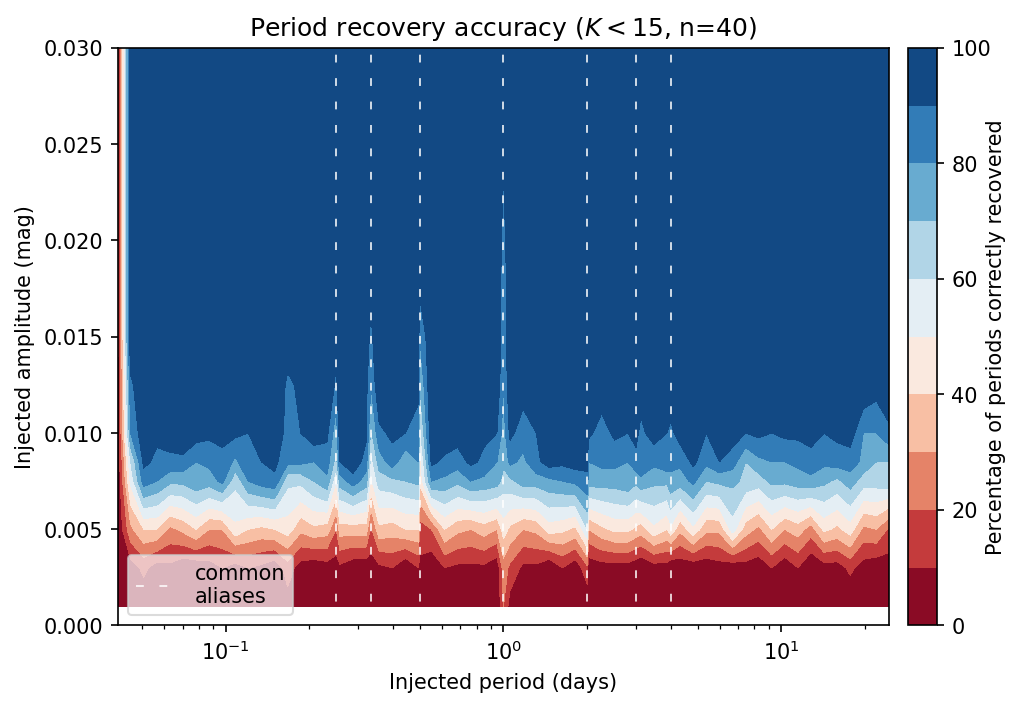

In [17]:
plt.style.use('default')

mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'
mpl.rcParams['xtick.top'] = False
mpl.rcParams['ytick.right'] = False


fig, ax = plt.subplots(1, figsize=(8,5), dpi=150)
plt.contourf(periods_denser, amplitudes_denser, 100*np.array(output_denser[0]).T, levels=100*np.linspace(0,1,11), cmap='RdBu')
plt.ylim(0,0.03)
plt.xlabel("Injected period (days)")
plt.ylabel("Injected amplitude (mag)")
plt.title(r"Period recovery accuracy ($K < 15$, n=40)")
plt.semilogx()
# plt.xlim(None,2.6)
cbar = plt.colorbar(pad=0.02)
cbar.set_label("Percentage of periods correctly recovered", labelpad=-2.5)

for per in extra_periods:
    plt.axvline(per, lw=0.75, ls='--', color='w', dashes=(5, 10))
    
plt.plot([0, 0], [0, 0], lw=0.75, ls='--', color='w', dashes=(5, 10), label='common\naliases')
plt.legend(loc='lower left', framealpha=0.7)
    
fig.savefig("period_recovery_grid_WSERV7.png")
fig.savefig("period_recovery_grid_WSERV7.pdf")

In [18]:
alias_scores = output_denser[3]
alias_scores = np.array(alias_scores)

np.max(alias_scores[2:,:])

0.525

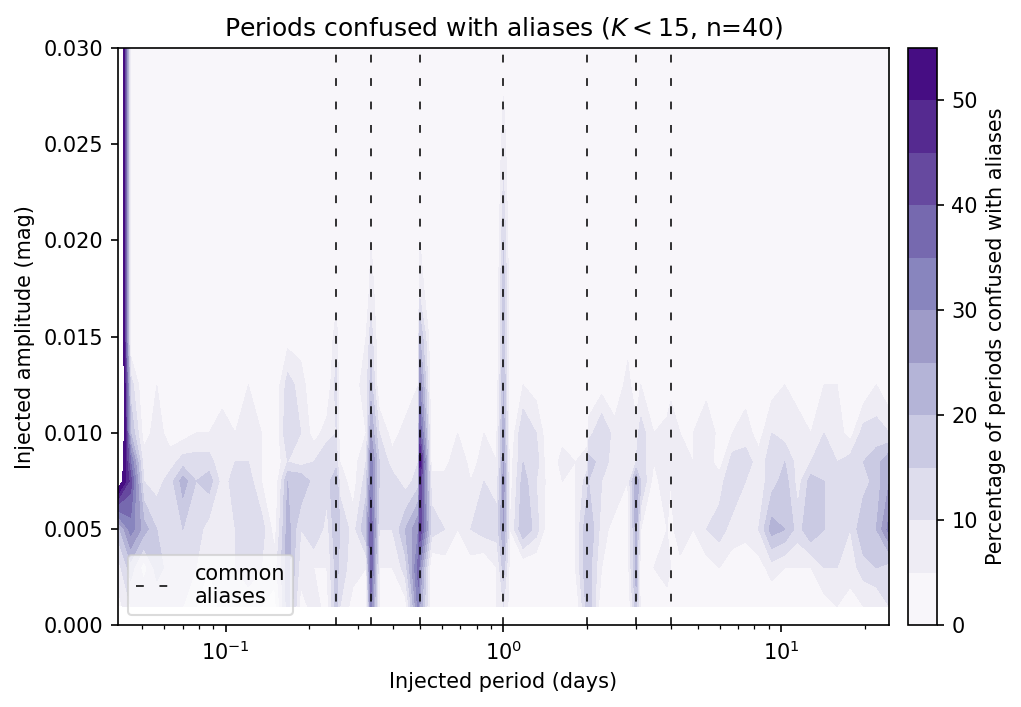

In [23]:
plt.style.use('default')

mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'
mpl.rcParams['xtick.top'] = False
mpl.rcParams['ytick.right'] = False

# this one is for aliases:
alias_scores = np.array(output_denser[3])
max_alias_score = np.max(alias_scores[2:,:])

fig, ax = plt.subplots(1, figsize=(8,5), dpi=150)
plt.contourf(periods_denser, amplitudes_denser, 100*np.array(output_denser[3]).T, levels=100*np.linspace(0,0.55,12), cmap='Purples')
plt.ylim(0,None)
plt.xlabel("Injected period (days)")
plt.ylabel("Injected amplitude (mag)")
plt.title(r"Periods confused with aliases ($K < 15$, n=40)")
plt.semilogx()
# plt.xlim(None,2.6)
cbar = plt.colorbar(pad=0.02)
cbar.set_label("Percentage of periods confused with aliases")

for per in extra_periods:
    plt.axvline(per, lw=0.75, ls='--', color='k', dashes=(5, 10))
    
plt.plot([0, 0], [0, 0], lw=0.75, ls='--', color='k', dashes=(5, 10), label='common\naliases')
plt.legend(loc='lower left', framealpha=0.7)

fig.savefig("period_alias_grid_WSERV7.png")
fig.savefig("period_alias_grid_WSERV7.pdf")

In [24]:
for i, output_item in enumerate(output_denser):
    np.save(f"output_denser_W7_{i}_20211010.npy", np.array(output_item))

In [25]:
output_reconstructed = []

for i, output_item in enumerate(output_denser):
    a = np.load(f"output_denser_W7_{i}_20211010.npy")
    output_reconstructed.append(a)

In [26]:
output_reconstructed[1] == np.array(output_denser[1])

array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  Tr

In [1]:
periods_denser

NameError: name 'periods_denser' is not defined